In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [59]:
data=1000
batch=100
set=10
layer=10
n_ini=1.0
n_fin=0.05
dn=-0.1
m2=-1
lam=1
c_reg1=0.03
c_reg2=0

In [60]:
dn=[]
for i in range (layer):
    if i<5: dn_in=-0.15
    else: dn_in=-0.05
    dn.append(dn_in)
print(dn)

[-0.15, -0.15, -0.15, -0.15, -0.15, -0.05, -0.05, -0.05, -0.05, -0.05]


# Generate metric

<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([ 0.56178843,  0.4817243 ,  2.39353804,  2.48560854,  1.79217935,
        4.73308471,  5.32310769,  6.78267982, 10.42830322, 19.21121249])>
tf.Tensor(
[ 3.01490951  3.03680456  3.09134316  3.22977376  3.59861219  4.72330177
  5.58607614  7.11070704 10.29821491 20.14977407], shape=(10,), dtype=float64)


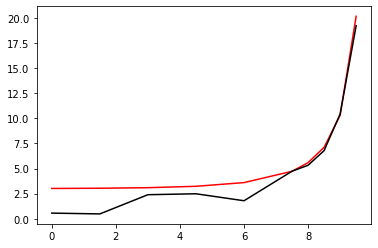

In [61]:
h=tf.zeros(layer)
h_in=[]
mu_in=1.0
for i in range (layer):
    mu=1/(mu_in)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
    mu_in=mu_in+dn[i]
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
mid_in=1.0
for i in range (layer):
    midd=3*coth(3*(mid_in)).numpy()
    middd.append(midd)
    mid_in=mid_in+dn[i]
h_real=tf.constant(middd)
print(h_real)
x=[0, 1.5, 3, 4.5, 6, 7.5, 8, 8.5, 9, 9.5]
plt.plot(x, h_real, 'r-')
plt.plot(x, h.numpy(), 'k-')
plt.show()

In [62]:
def F_func(a,b):
    return 2*b/n_fin-m2*a-lam*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

# Neural Network

In [63]:
def LP2(hh, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn[j]*pi
        pi1 =phi*m2*dn[j]+(1-dn[j]*hh[j])*pi+dn[j]*lam*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh):
    Positive=[]
    while len(Positive)<batch:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, phi1, pi1)
        F=np.array(tf.math.abs(F_func(phi_1, pi_1)))
        for i in range (len(phi1[F<n_fin])):
            Positive.append([phi1[F<n_fin][i], pi1[F<n_fin][i]])
            if len(Positive)>=batch: break
    return Positive
def NN_func_n(hh):
    Negative=[]
    while len(Negative)<batch:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, phi1, pi1)
        F=np.array(tf.math.abs(F_func(phi_1, pi_1)))
        for i in range (len(phi1[F>=n_fin])):
            Negative.append([phi1[F>=n_fin][i], pi1[F>=n_fin][i]])
            if len(Negative)>=batch: break
    return Negative
def NN_func_01(hh, list1):
    PP=[]
    NN=[]
    phi=np.array(list1)[:, 0]
    pi=np.array(list1)[:, 1]
    F=np.array(tf.math.abs(LP2(hh, phi, pi)[1]))
    for i in range (len(phi[F<n_fin])):
        PP.append([phi[F<n_fin][i], pi[F<n_fin][i]])
    for i in range (len(phi[F>=0.1])):
        NN.append([phi[F>=n_fin][i], pi[F>=n_fin][i]])
    return PP, NN

# Training data generation

In [64]:
Positive=[]
Negative=[]
for i in range (set):
    Positive.insert(i, NN_func_p(h_real))
    Negative.insert(i, NN_func_n(h_real))

In [65]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, Negative[i])[1])

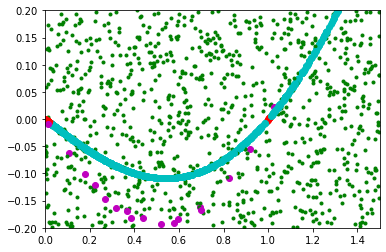

In [66]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [47]:
def Error_func(hh, list1, list2):
    phi0=np.array([v[0] for v in list1])
    pi0=np.array([v[1] for v in list1])
    phi1=np.array([v[0] for v in list2])
    pi1=np.array([v[1] for v in list2])
    phi_0, pi_0=LP2(hh, phi0, pi0)
    phi_1, pi_1=LP2(hh, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)/batch
    sum_n=(batch-sum(NNlist))/batch

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn[k])**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return sum_p+sum_n+E_reg1+E_reg2

In [48]:
for i in range (set):
    print(Error_func(h_real, Positive[i], Negative[i]))
for i in range (set):
    print(Error_func(h, Positive[i], Negative[i]))

tf.Tensor(0.9542630580206879, shape=(), dtype=float64)
tf.Tensor(0.9331327400728759, shape=(), dtype=float64)
tf.Tensor(0.9241237134193565, shape=(), dtype=float64)
tf.Tensor(0.9236649836094882, shape=(), dtype=float64)
tf.Tensor(0.9283055198257643, shape=(), dtype=float64)
tf.Tensor(0.924276390059259, shape=(), dtype=float64)
tf.Tensor(0.9246205107096187, shape=(), dtype=float64)
tf.Tensor(0.9446762289807628, shape=(), dtype=float64)
tf.Tensor(0.9356376629337851, shape=(), dtype=float64)
tf.Tensor(0.9442115900368031, shape=(), dtype=float64)
tf.Tensor(2.4149377210739824, shape=(), dtype=float64)
tf.Tensor(2.4792385185638617, shape=(), dtype=float64)
tf.Tensor(2.480508362675882, shape=(), dtype=float64)
tf.Tensor(2.486990342023926, shape=(), dtype=float64)
tf.Tensor(2.509833274587656, shape=(), dtype=float64)
tf.Tensor(2.4217496969072183, shape=(), dtype=float64)
tf.Tensor(2.4768223927921036, shape=(), dtype=float64)
tf.Tensor(2.4930865966425815, shape=(), dtype=float64)
tf.Tensor(2.52

# Optimizer

c_reg1=0.06

0 2.273761139682854
[-0.06573491  1.59858229  2.18821741  1.62223182  1.20485573  5.47107191
  4.73967606  6.59363615 10.08672244 21.19950487]


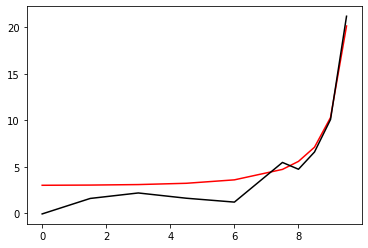

1100 1.7989564432295955
[ 0.67581714  0.99901703  1.37779853  1.53841075  1.88136481  5.09619588
  5.60628402  7.62313664 11.08707909 20.15392586]


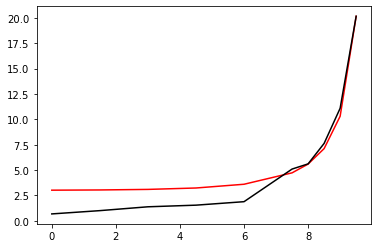

2200 1.5977523518240178
[ 0.86940685  0.90048055  0.9788046   1.13890348  1.75621379  5.7731239
  6.43537681  8.51397316 11.90970147 19.1849916 ]


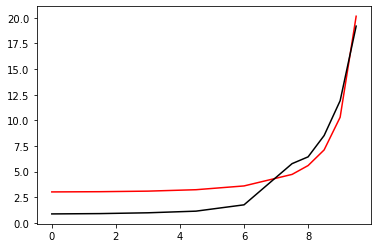

3300 1.4865783821603493
[ 0.94204183  0.94874957  0.98301192  1.147704    1.92254694  6.70929714
  7.39247625  9.4127127  12.56488755 18.27320762]


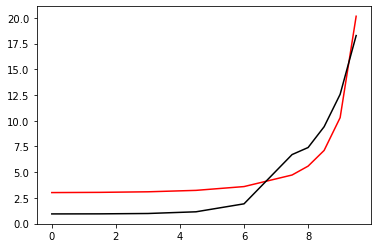

4400 1.3317193980986683
[ 1.41210608  1.41788655  1.45762992  1.64188228  2.50931328  7.66665925
  8.3579257  10.19724169 13.00818693 17.40757463]


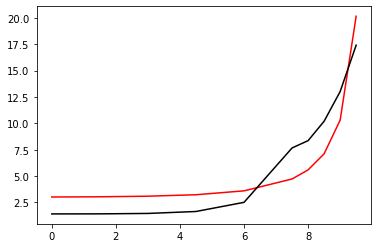

5500 1.0381034025144609
[ 3.31610057  3.25351067  3.20920946  3.26739614  3.87533022  8.52305132
  9.160898   10.57463988 12.98914709 16.5674988 ]


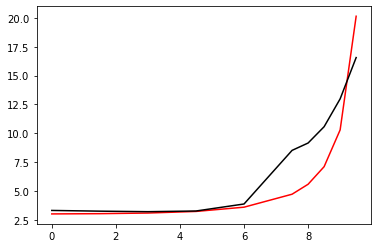

6600 0.4262924254260171
[ 3.15750418  3.09405876  3.02397049  3.02488031  3.51157823  8.38938937
  9.00247964 10.19050981 12.28983807 15.66046537]


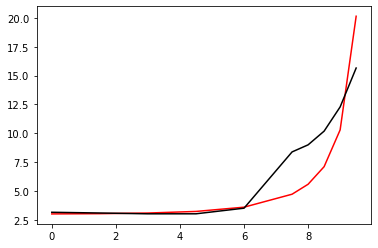

7700 0.1702512104942395
[ 3.07719326  3.02142411  2.94995326  2.93989207  3.40865886  8.34582612
  9.02728542 10.22793439 12.1048113  14.70195065]


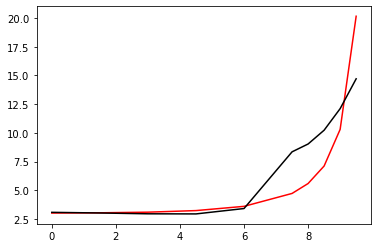

8800 0.14011881102027943
[ 3.05674733  3.00788401  2.94243105  2.94439923  3.47123256  8.83541693
  9.49793199 10.54304325 12.00606537 13.88038647]


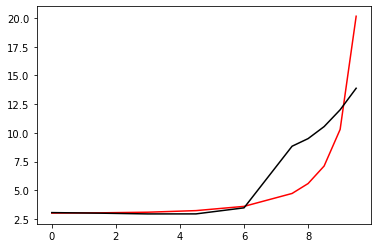

9900 0.1244767539544914
[ 3.03032413  2.99136353  2.93720901  2.96218558  3.59146112  9.31185855
  9.8733793  10.67146248 11.74034237 13.10355281]


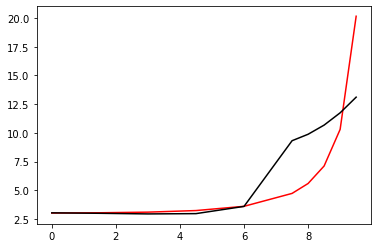

11000 0.1021640126081807
[ 2.99729115  2.97141109  2.93885903  3.01063495  3.80000921  9.57981314
 10.05891744 10.67846599 11.45050804 12.36270636]


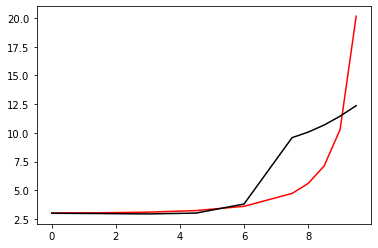

12100 0.07443712185063724
[ 2.95682441  2.94704164  2.95106415  3.10300182  4.07043225  9.48692463
  9.92436034 10.34017213 10.96210974 11.64520082]


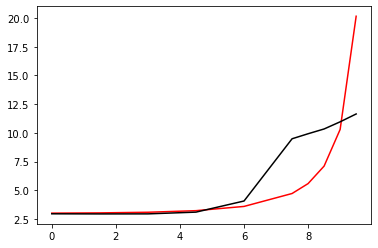

13200 0.5967009446764462
[ 2.77916619  2.7620485   2.76328696  2.91720137  3.85920994  8.8430064
  9.12149941  9.52347987  9.9498146  10.75697564]


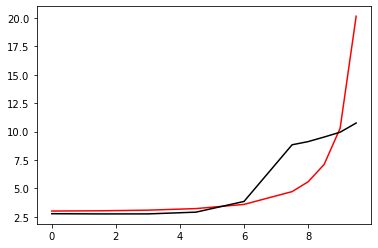

14300 0.04302246823198005
[ 2.99763231  2.98441437  2.99046199  3.15386375  4.08900423  8.64560984
  8.9552513   9.31282715  9.66132545 10.00906115]


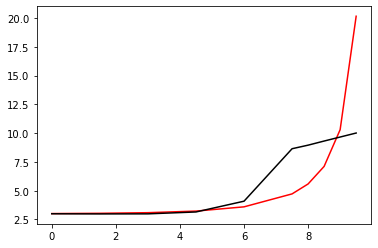

15400 0.04606705894954276
[2.97441159 2.97080681 2.99805135 3.20073559 4.16829    8.35541969
 8.63128185 8.91411043 9.18406903 9.43006098]


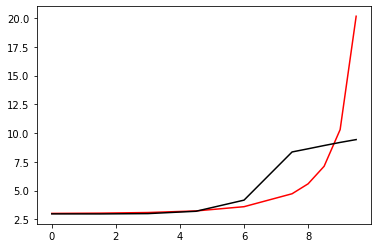

16500 0.040070652393566206
[2.99334612 3.0044255  3.06405735 3.31773846 4.29178753 8.00404974
 8.14725313 8.48736422 8.5670051  8.81340001]


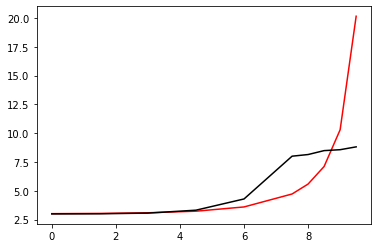

17600 0.03208561212347932
[2.9409897  2.93984681 2.98798397 3.21526739 4.08503535 7.30636673
 7.46832091 7.61052272 7.77001883 7.88072091]


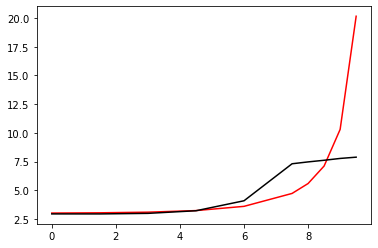

18700 0.04290584899683923
[2.92678127 2.93094812 2.98636667 3.22517003 4.09034451 7.14541494
 7.33142514 7.49687562 7.62217713 7.64261982]


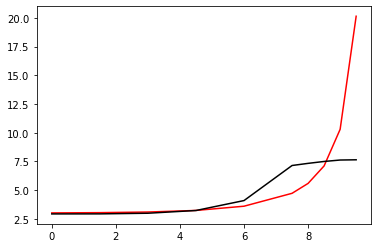

19800 0.037962035947163957
[3.00669102 2.99986265 3.04928073 3.28757167 4.1214924  6.9250854
 7.09494854 7.24266958 7.34612661 7.38699402]


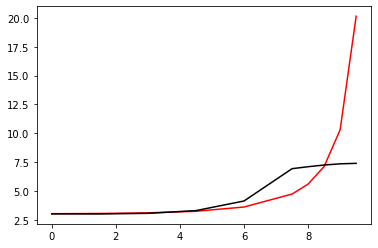

20900 0.045019599477409494
[2.98124993 2.99820661 3.07347749 3.33077517 4.12900422 6.63255274
 6.77043037 6.90428876 7.01194621 7.03005075]


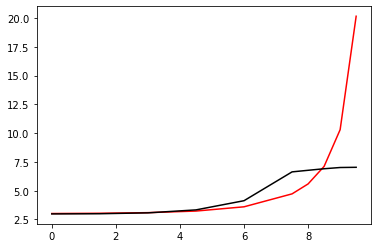

22000 0.1791004591583698
[3.07826161 3.11496529 3.21444585 3.47683999 4.18639302 6.31419511
 6.43569574 6.52884424 6.60591835 6.68238025]


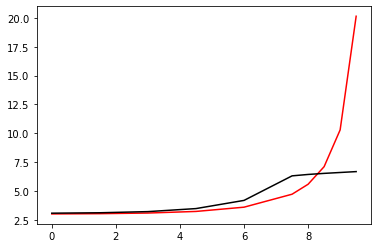

23100 0.028328019250000912
[2.9712724  2.99623017 3.07755634 3.30124388 3.91861154 5.77025384
 5.86116142 5.92135563 5.95393987 5.95890988]


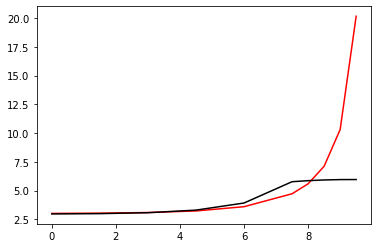

24200 0.01870656877614037
[2.96342333 2.99276214 3.08114247 3.31228343 3.92798473 5.70039094
 5.80521715 5.89377726 5.95504788 5.96256273]


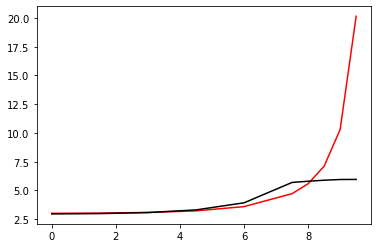

25300 0.01804648733728005
[2.94835227 2.98234754 3.08009073 3.32086887 3.93038214 5.63160354
 5.73026547 5.82409532 5.87276268 5.93250515]


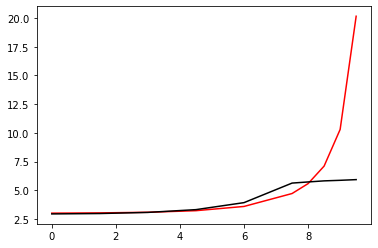

26400 0.03580599247266991
[2.92491835 2.96615705 3.07693904 3.33322623 3.9441364  5.5425353
 5.73688053 5.72560003 5.89581437 5.77508639]


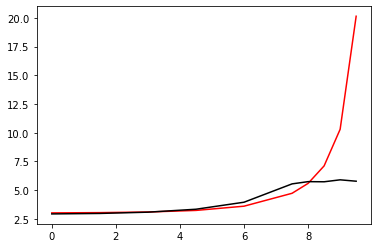

27500 0.10861904015230785
[3.10106057 3.16597202 3.28860862 3.54295491 4.10396958 5.37650853
 5.21341194 5.20358934 5.21059341 5.59461965]


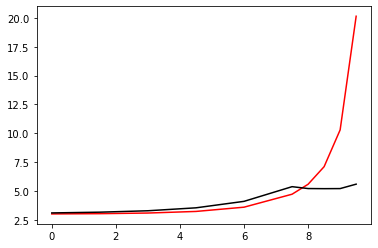

28600 0.01642558488022218
[2.92736402 2.98638842 3.10793854 3.34781786 3.8502971  4.93387216
 5.00792429 5.07618531 5.10851984 5.09731574]


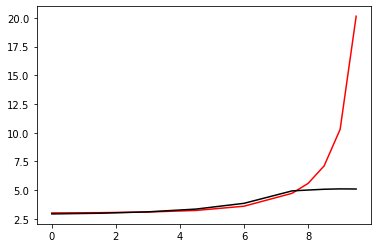

29700 0.05429033922025956
[2.92357404 2.97798848 3.1033692  3.35173061 3.86326347 5.01071564
 5.08758843 5.14632415 5.19955906 5.19450175]


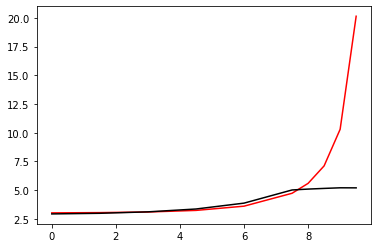

30800 0.03655414826554741
[2.8883175  2.93050677 3.04662573 3.29124077 3.8040779  4.99074448
 5.22118908 5.1226373  5.29135442 5.21908999]


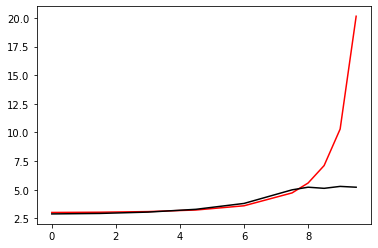

31900 0.034540090943318835
[3.02845581 3.04604937 3.1297177  3.34054668 3.8219185  5.03208431
 5.08677981 5.14988497 5.18225253 5.22590345]


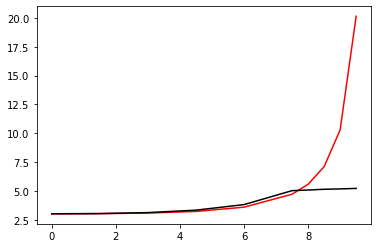

33000 0.11861263649557667
[3.1282866  3.16513305 3.26111085 3.46858205 3.92163206 5.04398319
 5.09629073 5.10670462 5.20675025 5.1811864 ]


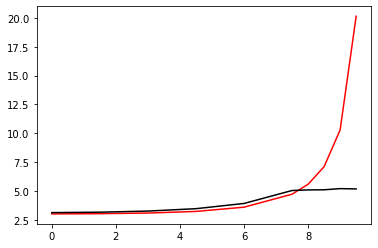

34100 0.023456629888250164
[2.96782481 2.99209696 3.06446342 3.23561214 3.63665629 4.72007382
 4.79687529 4.84466568 4.88090509 4.90719061]


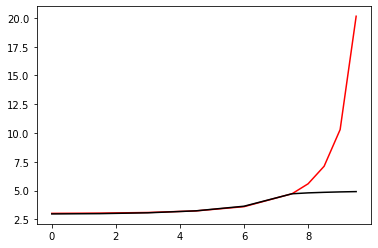

35200 0.018232762990061487
[2.98076843 3.00720613 3.08377907 3.26659197 3.69246673 4.82470728
 4.82118101 4.96473804 4.94437244 4.97168452]


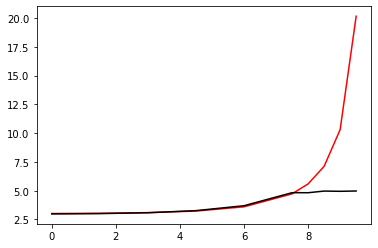

36300 0.013954135205772872
[3.01132276 3.07002218 3.19475823 3.42370209 3.87002836 4.84277367
 4.93898668 4.95927132 4.99403953 5.01536755]


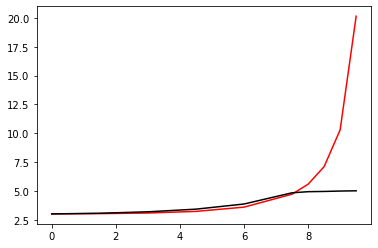

37400 0.043400010629444125
[2.96365589 3.01633929 3.13369451 3.35280821 3.77500701 4.68574655
 4.89572694 4.78445377 4.98244433 4.86533955]


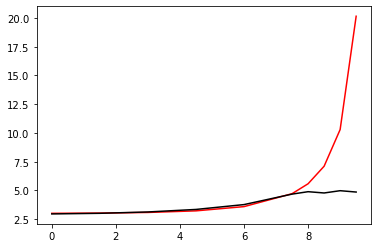

38500 0.03240476328450497
[3.02640059 3.06361277 3.1578008  3.3570465  3.78313757 4.82040642
 4.85533878 4.95296378 4.94857267 4.9878385 ]


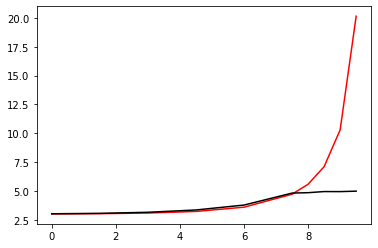

39600 0.032110707696364045
[3.05617138 3.08045952 3.146786   3.29718434 3.646104   4.59169502
 4.66241012 4.71137908 4.72524706 4.76472401]


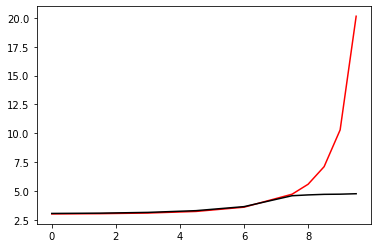

40700 0.04328791727806538
[3.10236119 3.13579655 3.21600394 3.38591182 3.75729921 4.62262873
 4.75808981 4.6729844  4.85544118 4.67208683]


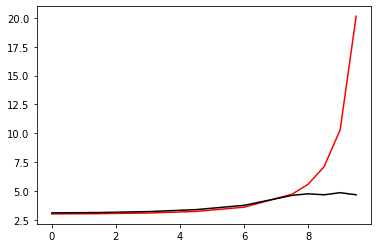

41800 0.03961458110661069
[3.02255209 3.06284334 3.16524397 3.38284034 3.83363932 4.77654388
 4.82673204 4.88364824 4.91711642 4.91163586]


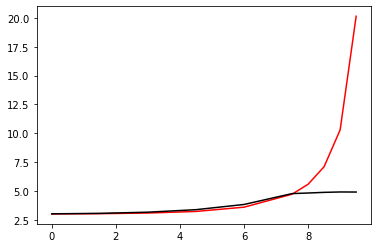

42900 0.0323675156410754
[2.98246341 2.97971681 3.01948963 3.15561644 3.49707036 4.39389725
 4.45489667 4.51417807 4.56356315 4.58170251]


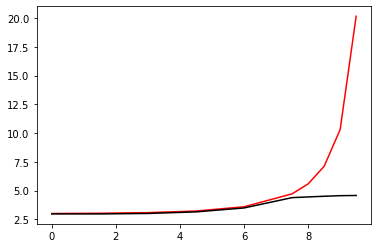

44000 0.04628403178580679
[2.97572307 2.98164571 3.02868141 3.17395051 3.54384811 4.51165695
 4.57697194 4.64995285 4.68688263 4.64842725]


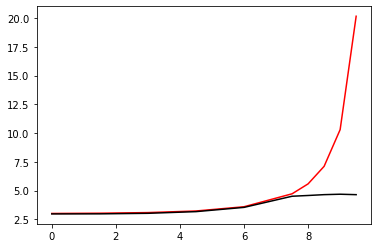

45100 0.023649520426746652
[3.03847126 3.05540447 3.10253518 3.22627147 3.54128145 4.43145979
 4.40154882 4.56950049 4.45772537 4.59341063]


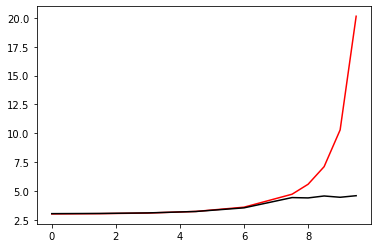

46200 0.02248709260100624
[2.9551371  2.9674977  3.01674098 3.14981786 3.48267893 4.38642799
 4.46574028 4.48285117 4.5581644  4.54808044]


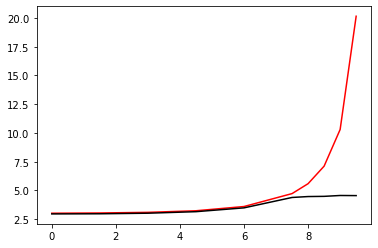

47300 0.011835833217031902
[3.06293657 3.08775159 3.14758507 3.28087179 3.58804784 4.33322834
 4.37814748 4.42148332 4.42972351 4.4627839 ]


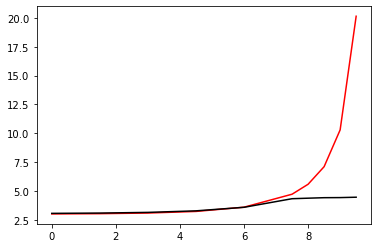

48400 0.08379256751521126
[3.19001595 3.20691962 3.25716741 3.37887056 3.66519273 4.37284301
 4.38335952 4.42390171 4.45840652 4.3675607 ]


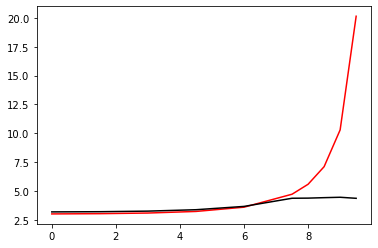

49500 0.05287785932805499
[3.13137902 3.15402874 3.20806036 3.32860585 3.60314706 4.22490804
 4.36196567 4.22176416 4.40154565 4.22548183]


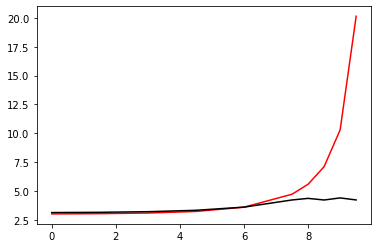

50600 0.03167442305741472
[3.0719409  3.10355362 3.1777502  3.32519751 3.62484586 4.2738933
 4.31346604 4.3544638  4.35020722 4.39695253]


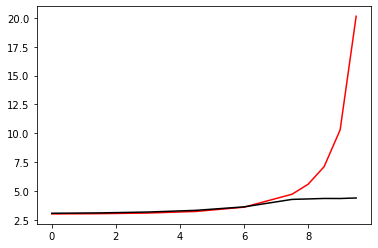

51700 0.08231501237849354
[3.12678078 3.18024666 3.28622449 3.46957144 3.79371387 4.43738967
 4.41638603 4.47699886 4.50697342 4.39860543]


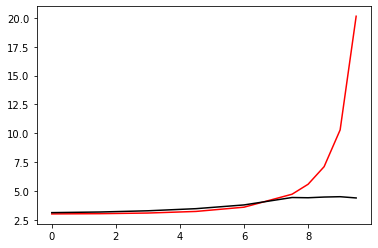

52800 0.03345372043639214
[2.92141898 2.95929737 3.05903437 3.2553137  3.62717702 4.36069609
 4.49658172 4.41840032 4.5603046  4.50503139]


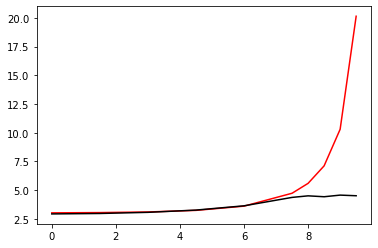

53900 0.14368167654148625
[2.76980317 2.82670123 2.9459894  3.16668565 3.57933632 4.37669468
 4.51638903 4.52291131 4.53448206 4.77988262]


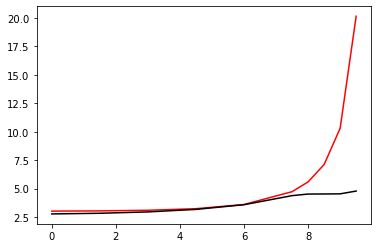

55000 0.05328255610875566
[3.01399701 3.07344919 3.19465686 3.40061192 3.7533041  4.40690087
 4.41656661 4.47768377 4.49889731 4.47581793]


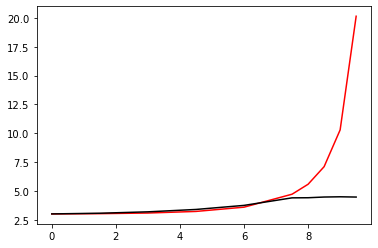

56100 0.02293157040293101
[2.94974975 2.98387246 3.0744759  3.25164234 3.58649088 4.268375
 4.38846908 4.37374205 4.42515452 4.41547632]


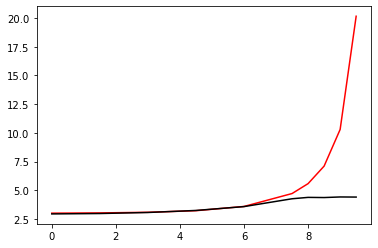

57200 0.02231214805271982
[3.02980278 3.06523337 3.14737453 3.31323657 3.64634522 4.37855091
 4.3695028  4.42445508 4.49293279 4.32918523]


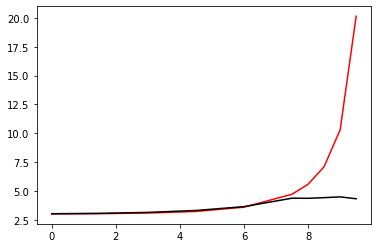

58300 0.012395580862469856
[3.010983   3.04157326 3.12107728 3.29360638 3.65902438 4.41159254
 4.48064695 4.50594767 4.52983142 4.55589661]


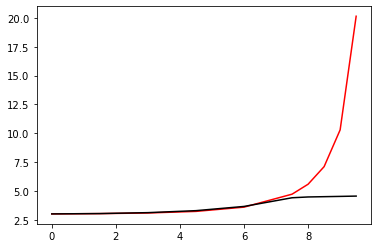

59400 0.031497756150989924
[3.10172378 3.12150653 3.17942774 3.31510876 3.61934575 4.4040204
 4.40100582 4.49064734 4.48234472 4.48968453]


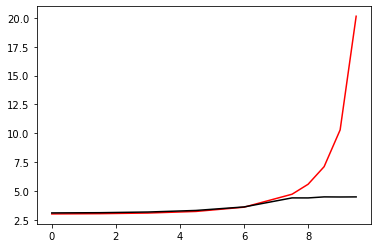

60500 0.05738303469135233
[3.13629354 3.15275421 3.21008764 3.34518951 3.64725778 4.36084493
 4.44048357 4.41014953 4.44636905 4.49100994]


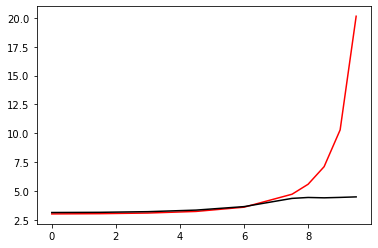

61600 0.014916812581653168
[2.97030859 2.99302316 3.05279405 3.1804381  3.4597637  4.15847526
 4.23784667 4.25185567 4.27770533 4.43862854]


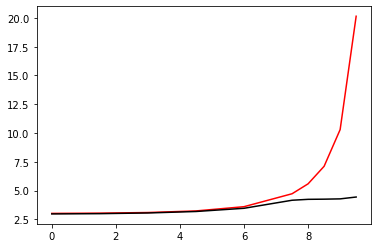

62700 0.0483290347215028
[2.94044373 2.94789839 3.00006701 3.1373297  3.45334204 4.22437463
 4.35435695 4.35347639 4.41437468 4.43991231]


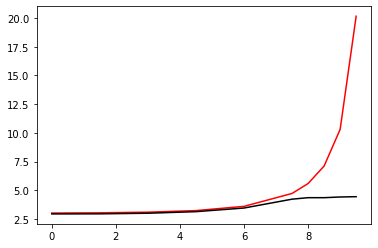

63800 0.0324304348160546
[2.97908308 2.97973594 3.01017194 3.11108642 3.37673559 4.14809646
 4.18024587 4.28029857 4.24952743 4.29216159]


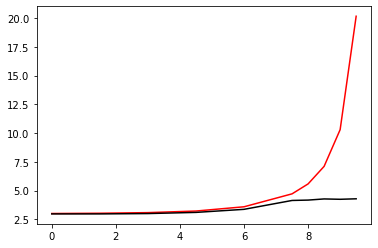

64900 0.03207412256280649
[3.10670191 3.12971253 3.18745688 3.3157447  3.60366958 4.32614192
 4.34368026 4.3420507  4.39874785 4.31304557]


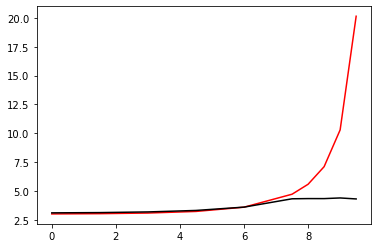

66000 0.048814259596384725
[2.97200843 2.99578041 3.06002129 3.19985399 3.50441494 4.26432844
 4.26220292 4.38444557 4.35357181 4.31247816]


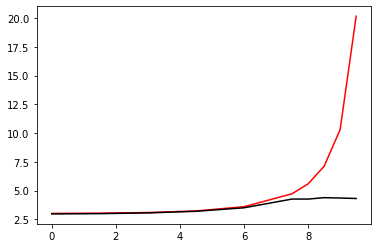

67100 0.02317479250623467
[3.02423439 3.04862739 3.10895974 3.24190296 3.53632325 4.21337611
 4.3174989  4.30316889 4.32107067 4.3537405 ]


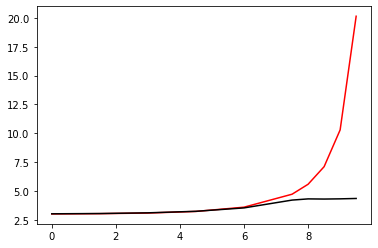

68200 0.022436676794925076
[2.96413694 2.9829755  3.04234676 3.18105506 3.49306787 4.29182425
 4.26869551 4.38381364 4.36148866 4.38879252]


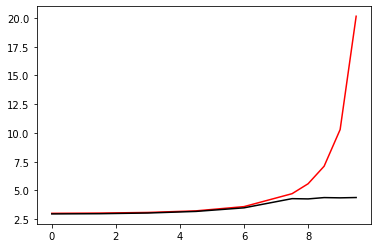

69300 0.012016814549127355
[3.0587145  3.08992639 3.16098594 3.30750317 3.61915377 4.29404611
 4.40118856 4.38399843 4.37997351 4.4648264 ]


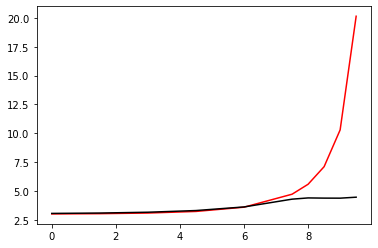

70400 0.0705412226644416
[3.15924758 3.17930814 3.23537719 3.36335048 3.64879299 4.3559817
 4.29526252 4.42842188 4.35388893 4.43546585]


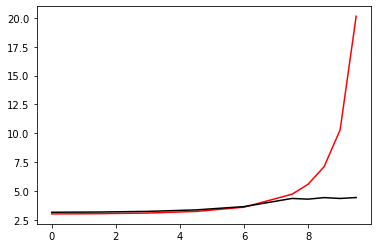

71500 0.05805998455634874
[3.15312637 3.16086442 3.2002355  3.30704872 3.56751182 4.25373901
 4.20052829 4.29586441 4.21593111 4.36401882]


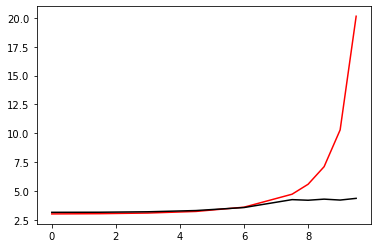

72600 0.01364815074517509
[2.97163374 2.98260702 3.02922817 3.15390929 3.45698986 4.20155408
 4.29399361 4.29442689 4.34326232 4.35586768]


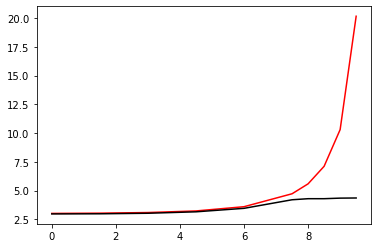

73700 0.047168390909809045
[2.93962758 2.94229441 2.97582708 3.07732482 3.32869561 4.12366977
 4.13783678 4.22727324 4.27387044 4.26251627]


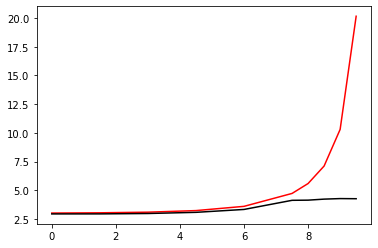

74800 0.035579877791715335
[2.98910697 3.01208672 3.07087627 3.19626056 3.47252682 4.18148801
 4.20821178 4.30088707 4.27803716 4.33580449]


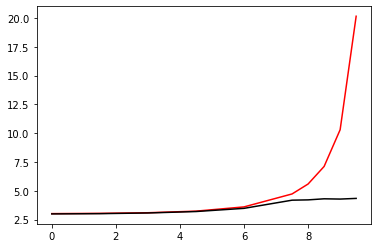

75900 0.03195473830210671
[2.99305482 3.00207251 3.04264474 3.15554964 3.43716456 4.19549397
 4.29626351 4.28086866 4.38720358 4.3108693 ]


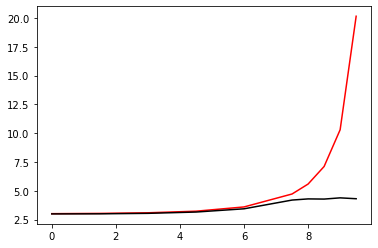

77000 0.11296490469849484
[2.8466685  2.88528674 2.97436756 3.16368747 3.55513119 4.36210088
 4.45755002 4.52082627 4.47466007 4.68955337]


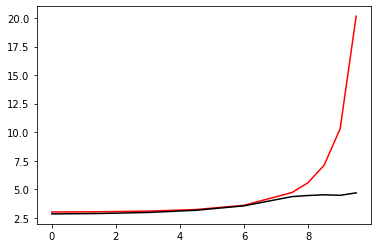

78100 0.024451719853511043
[3.03835663 3.07541661 3.16117943 3.33690183 3.7029447  4.42213369
 4.66028715 4.50977396 4.63684607 4.58673659]


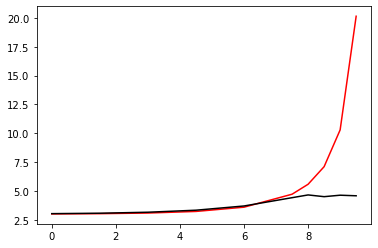

79200 0.025249971004104706
[3.00104534 3.01955924 3.07845189 3.20977226 3.48866852 4.08083435
 4.10111096 4.09917667 4.08845397 4.06203121]


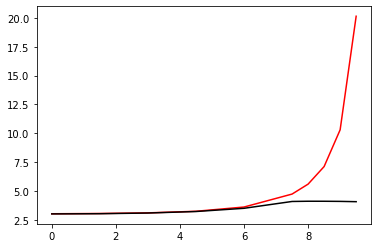

80300 0.011536526260305907
[2.97302496 2.99456435 3.05592078 3.19243816 3.48291731 4.11094399
 4.14948998 4.18488802 4.20540006 4.21308581]


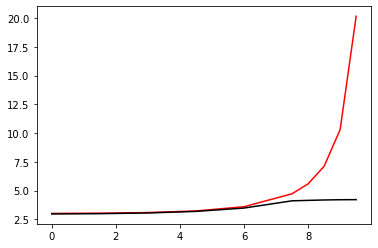

81400 0.036031139435117196
[2.94595127 2.9684175  3.03126561 3.17410089 3.48451276 4.20619352
 4.26223747 4.29876446 4.35365092 4.29042285]


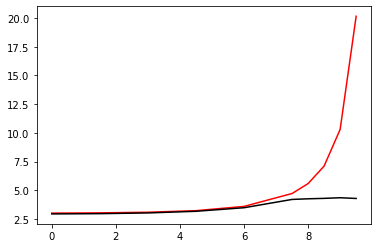

82500 0.04243468436300202
[3.12409941 3.12942636 3.17851975 3.31526443 3.63575116 4.41125733
 4.42035187 4.52997448 4.47179159 4.54196981]


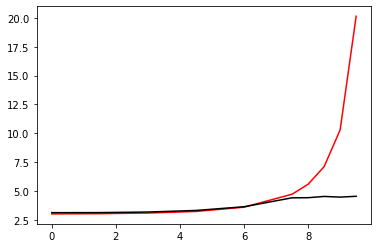

83600 0.031083124159493797
[3.04444619 3.07200326 3.1358644  3.27243682 3.57325515 4.26024384
 4.42107215 4.35141013 4.44549708 4.43029655]


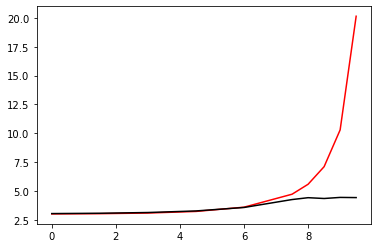

84700 0.050626926624135586
[3.04306277 3.10693298 3.19667483 3.33554214 3.57920825 4.01450372
 4.0401334  3.93465312 3.97417469 4.04215682]


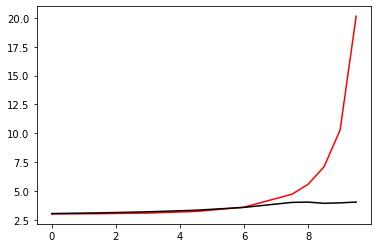

85800 0.03223501261888047
[2.92853094 2.97615269 3.06695122 3.21107771 3.45492682 3.9419838
 4.00537002 4.01626142 4.07344882 4.05405952]


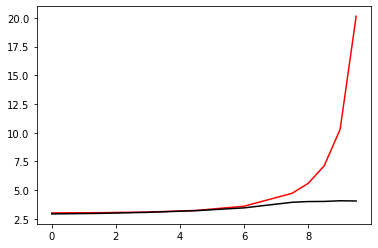

86900 0.032042693252092025
[2.94931408 2.97962553 3.05720773 3.20700293 3.49317869 4.16032833
 4.14806523 4.24156963 4.20237874 4.28167123]


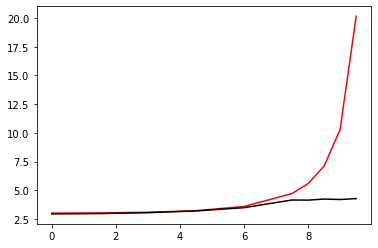

88000 0.05321208801454802
[3.0261415  3.05220456 3.12136703 3.27727826 3.60513209 4.32468274
 4.31982956 4.41856166 4.40912079 4.32445317]


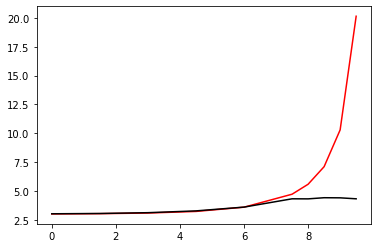

89100 0.023117902524995952
[3.03035294 3.06234589 3.13995907 3.29593018 3.61613827 4.31976637
 4.41519083 4.4053436  4.47928735 4.43217105]


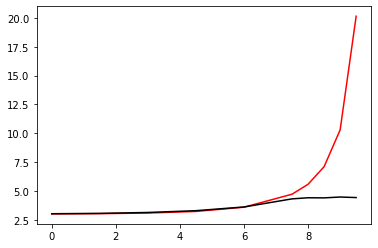

90200 0.02217227511973051
[3.02626765 3.06619695 3.15312692 3.31587364 3.63646551 4.37352469
 4.34652035 4.43271629 4.43748526 4.4085371 ]


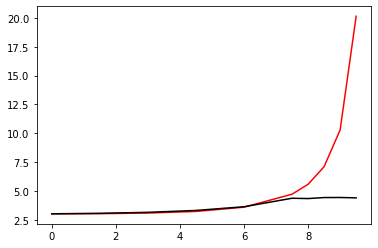

91300 0.011694091691737645
[3.06003671 3.09144606 3.16504735 3.30874245 3.59477725 4.20161492
 4.28367941 4.26733869 4.32038156 4.30005714]


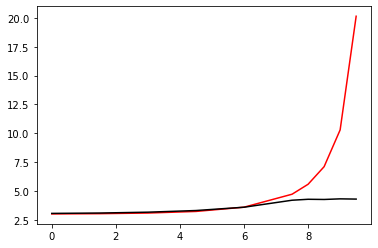

92400 0.088193709218483
[3.19145022 3.21871254 3.28599223 3.42323783 3.70257041 4.2825917
 4.28130875 4.29780574 4.38518036 4.20069573]


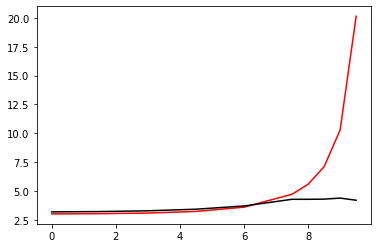

93500 0.04842177315698701
[3.04780717 3.06873494 3.12652167 3.24693447 3.49833788 4.06600683
 4.15517057 4.09542959 4.14897475 4.15757703]


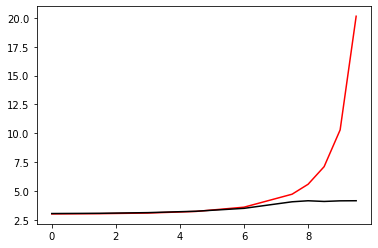

94600 0.02370559393650911
[2.90562815 2.94098497 3.01578446 3.16123333 3.45226544 4.08315404
 4.15249578 4.23459295 4.16168773 4.3956589 ]


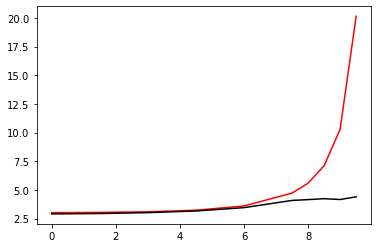

95700 0.09234538955042867
[3.18298213 3.19385823 3.25272284 3.39960325 3.71373553 4.35855992
 4.42084873 4.33420808 4.39903984 4.46005468]


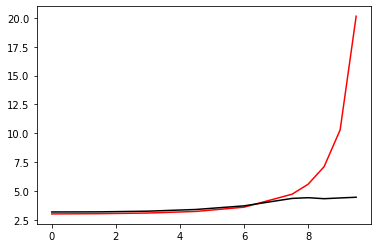

96800 0.0415114261489936
[3.08801168 3.09105336 3.13215761 3.26204759 3.58305221 4.39829844
 4.36414641 4.45378341 4.41692537 4.5501694 ]


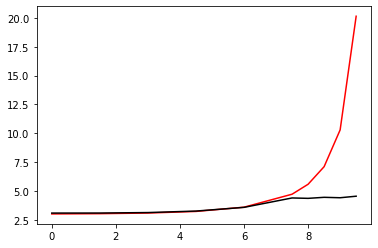

97900 0.032066907831689716
[2.98588063 3.00702431 3.06341805 3.19204428 3.49220159 4.2770304
 4.35728692 4.33816736 4.43812733 4.38956927]


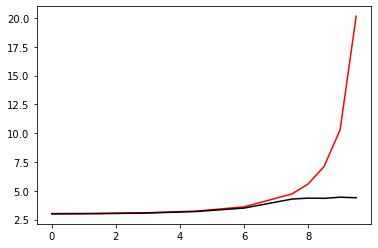

99000 0.04889491636816451
[2.98075514 2.99585661 3.04509909 3.1687583  3.47056752 4.27179998
 4.32222154 4.38187184 4.41306373 4.35429213]


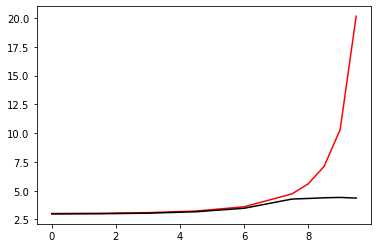

100100 0.024065223133870203
[3.06198399 3.07651805 3.12292566 3.24111573 3.52927736 4.33144991
 4.2371237  4.41542051 4.3227977  4.42003512]


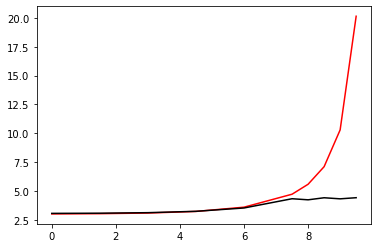

101200 0.02138801992688637
[3.08670296 3.11487943 3.17868272 3.30211411 3.55771533 4.16542399
 4.20307627 4.23621617 4.24539911 4.27318938]


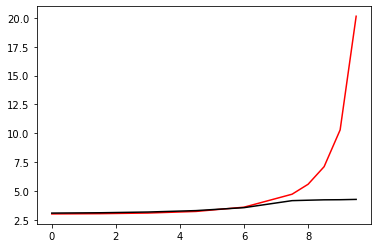

102300 0.012355387129802036
[3.0458987  3.08338522 3.1668767  3.32727829 3.64362935 4.30380059
 4.28461344 4.42217656 4.30733724 4.39243669]


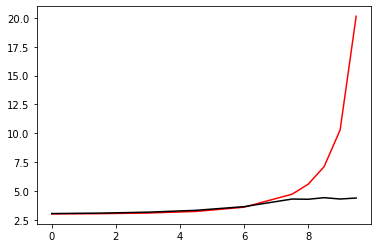

103400 0.03772962468268569
[2.92583153 2.94736909 3.00709597 3.14158567 3.43056062 4.0946988
 4.15019289 4.18386517 4.23692333 4.18674666]


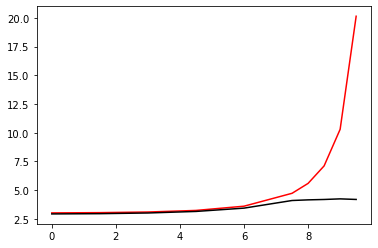

104500 0.044246721958214844
[3.04532583 3.0682248  3.12960252 3.27142591 3.58737828 4.33490982
 4.23766793 4.39420821 4.36645421 4.31968197]


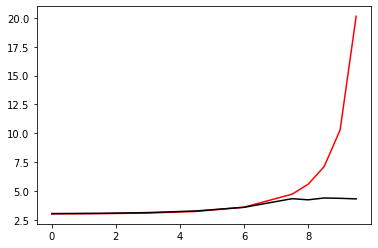

105600 0.03257839726512918
[3.12088872 3.12775157 3.16944989 3.28678779 3.57037439 4.25616136
 4.38502702 4.31861536 4.43055852 4.35813685]


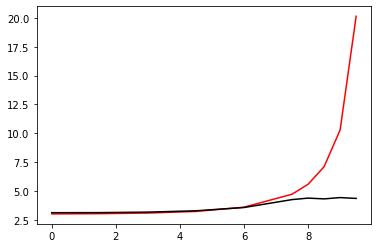

106700 0.05404082339640117
[3.1446691  3.16559615 3.22091356 3.3468074  3.62826149 4.30257088
 4.28694214 4.37866548 4.34905385 4.36897579]


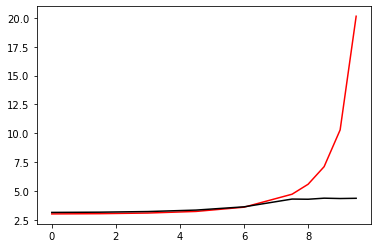

107800 0.04145377412058445
[3.07633783 3.09509322 3.14276155 3.24402094 3.46889184 4.09823342
 4.14979437 4.18359506 4.2076755  4.19324884]


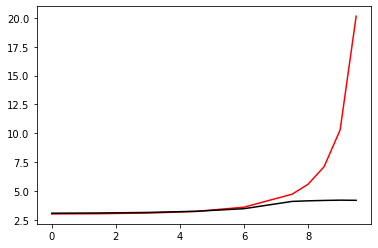

108900 0.03291192613856806
[2.93661254 2.97516693 3.0502637  3.18514543 3.44828445 4.11881585
 4.02830005 4.15918761 4.25157827 4.11129145]


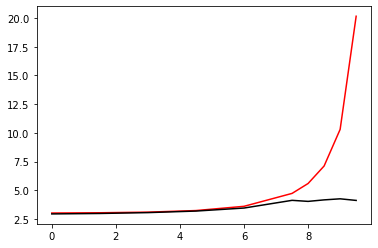

110000 0.053977887885566754
[3.02349976 3.04439966 3.10656349 3.23650032 3.49531159 4.09850251
 4.172954   4.18396273 4.26022375 4.18994667]


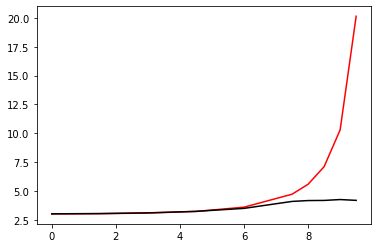

111100 0.023081495376621002
[2.99650033 3.02370626 3.0966498  3.25812969 3.60266467 4.34887769
 4.36978199 4.46258484 4.4052886  4.49663052]


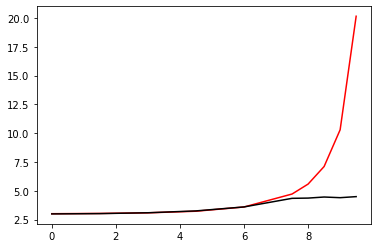

112200 0.023008072157118257
[2.94382427 2.97353735 3.05800093 3.24510684 3.63745264 4.51605935
 4.59088932 4.60596804 4.68057554 4.63733772]


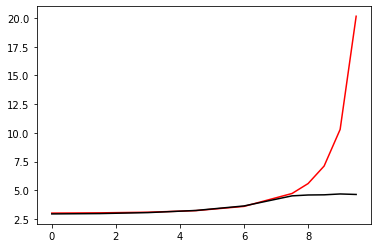

113300 0.012752738249356757
[2.95943451 2.97997602 3.04121308 3.18240904 3.50016383 4.39632533
 4.34165161 4.50503384 4.44944867 4.52880032]


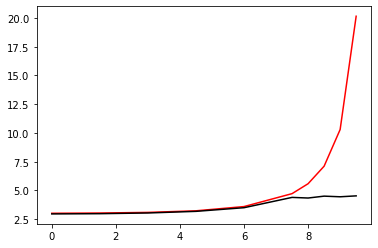

114400 0.03140851966452907
[3.07957371 3.10160744 3.16470031 3.3101554  3.63759268 4.42330189
 4.45846594 4.50117512 4.5345649  4.52197295]


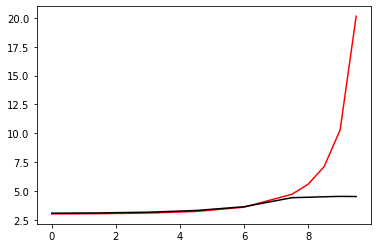

115500 0.04416115946047356
[2.9682615  2.95803851 2.99473347 3.11553921 3.40317867 4.05882899
 4.06192855 4.05825691 4.03685938 4.00355269]


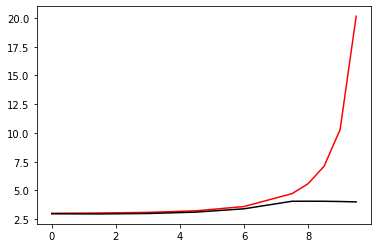

116600 0.012468102280989107
[2.96065519 2.96368867 3.00354081 3.12725903 3.42160839 4.07209366
 4.11130057 4.14366214 4.16479833 4.16203165]


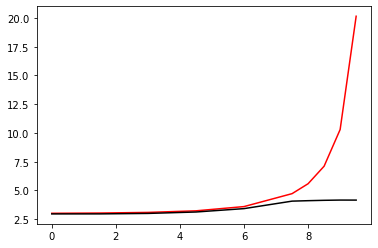

117700 0.047555921289504116
[2.9313372  2.94447805 2.99374871 3.12664354 3.43930604 4.16503551
 4.21943763 4.27158025 4.31860966 4.29556141]


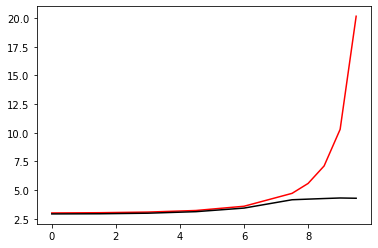

118800 0.032093001804650884
[2.92722271 2.93858196 2.98585252 3.11370198 3.42070876 4.17251017
 4.25716365 4.26136025 4.3332109  4.32431273]


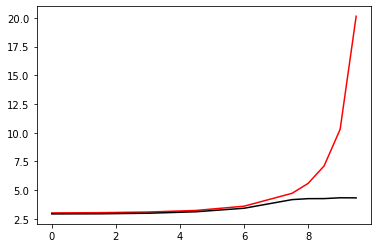

119900 0.03219836085429061
[3.08260228 3.1111435  3.1763127  3.31296885 3.61269342 4.36521585
 4.29922345 4.43111368 4.4655835  4.40833683]


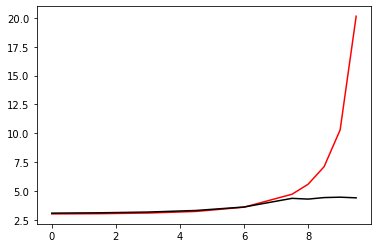

121000 0.053667542049344284
[2.92195764 2.95930914 3.04801878 3.21690943 3.55503123 4.32714552
 4.38976564 4.43551231 4.50836659 4.42204699]


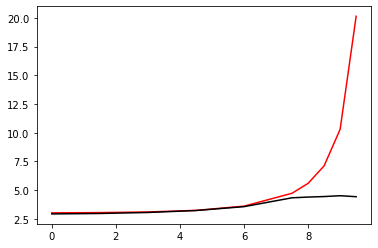

122100 0.023548566262181755
[3.07085906 3.08395987 3.12861981 3.24157509 3.51073556 4.21970785
 4.22744013 4.31523811 4.27961505 4.33932749]


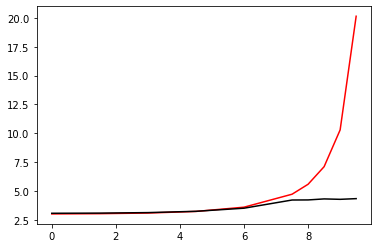

123200 0.02266151094126998
[2.98779156 2.99705791 3.03779584 3.14476746 3.41136137 4.08028649
 4.22321419 4.17165225 4.29214464 4.19133973]


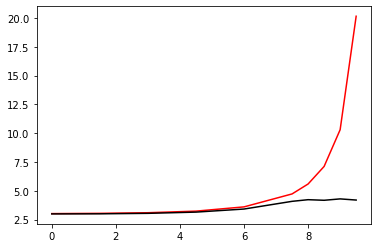

124300 0.0116727316882019
[3.06786288 3.09168369 3.15319045 3.28966507 3.58908845 4.25443508
 4.27697333 4.33527907 4.31532449 4.37745219]


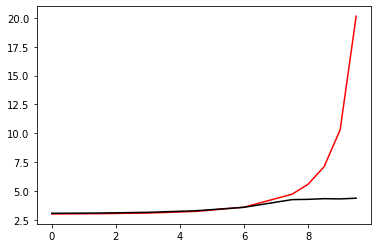

125400 0.03717193714327018
[2.96814819 2.97474632 3.01197733 3.11927445 3.38820231 4.10665886
 4.21009519 4.19351523 4.29393549 4.23889057]


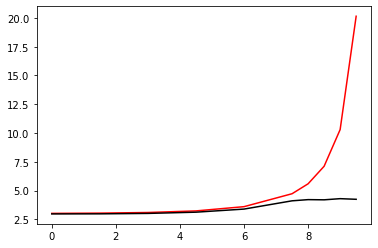

126500 0.04255595604491452
[3.11682795 3.13405618 3.19374372 3.33607547 3.65227441 4.33940326
 4.35559476 4.46102316 4.40006651 4.46413139]


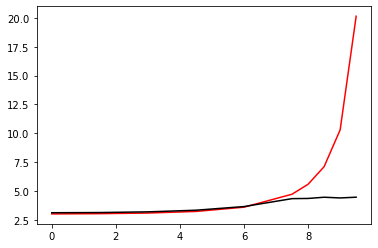

127600 0.048572173559011694
[2.87971923 2.90432512 2.96278401 3.08765162 3.36337275 4.07032011
 4.22275344 4.20015418 4.23241649 4.35189   ]


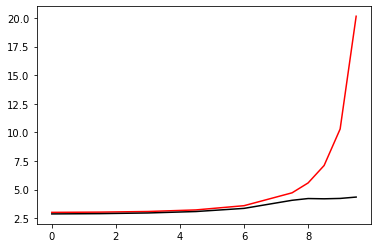

128700 0.05163296888859591
[2.92640705 2.93030577 2.96440287 3.06391986 3.32202316 4.11561708
 4.08162474 4.22594971 4.19984661 4.23911742]


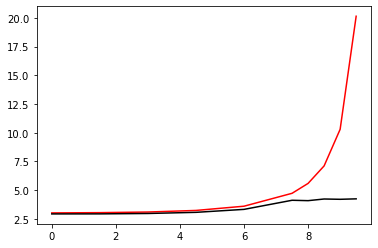

129800 0.03280577435207031
[2.92873672 2.95281418 3.01818419 3.15570311 3.44845581 4.12961482
 4.27634511 4.21437257 4.38644365 4.21320745]


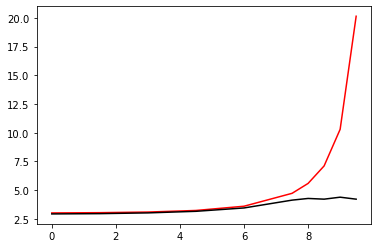

130900 0.03194528231727618
[3.04887902 3.07969047 3.15542702 3.30520993 3.6017178  4.3059048
 4.28853339 4.38053201 4.36361796 4.39932432]


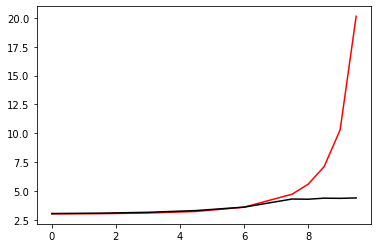

132000 0.052857476343975515
[3.09497129 3.11774828 3.17437744 3.30258499 3.6008988  4.27212424
 4.35799713 4.35957766 4.40628645 4.38326601]


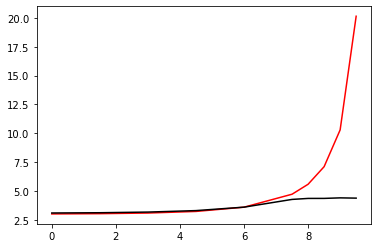

133100 0.025841901153019847
[3.07050808 3.1232221  3.20713984 3.34321889 3.58247539 3.85975827
 3.86240897 3.84701512 3.83161107 3.81184466]


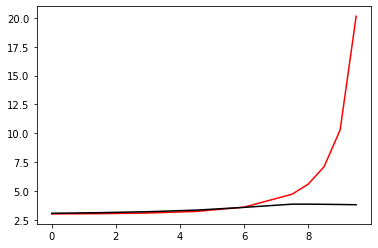

134200 0.021248334400946915
[3.07825225 3.12569861 3.21519108 3.36156681 3.6087454  3.94839596
 3.96778643 3.98256525 3.98566928 3.99357889]


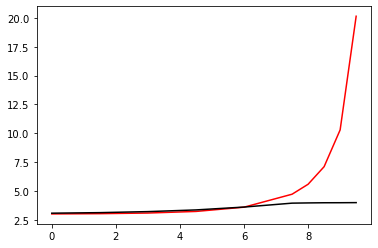

135300 0.012298058432890828
[3.06356595 3.10724897 3.19922841 3.35304232 3.60836706 4.00029538
 4.15623559 4.01787044 4.14885142 4.05088325]


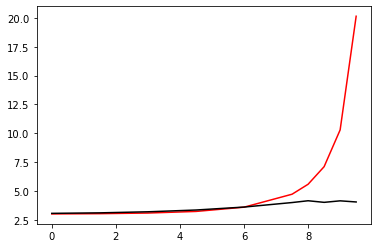

136400 0.03112492912162743
[3.08540292 3.11868671 3.20042582 3.35258938 3.62149625 4.1447053
 4.15162676 4.2064259  4.19965225 4.22212796]


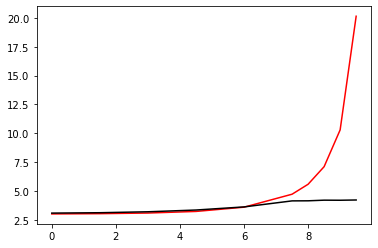

137500 0.046863362891205504
[3.03294204 3.0621301  3.13878323 3.28524899 3.55841637 4.12548802
 4.16323134 4.14351935 4.18398855 4.18885981]


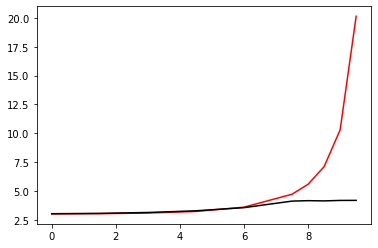

138600 0.030521608860620057
[3.06581168 3.07577227 3.12078799 3.23731675 3.50226342 4.12957861
 4.17389599 4.19452269 4.23580796 4.20140498]


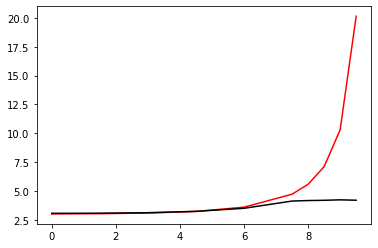

139700 0.04272326131061066
[3.11766585 3.15402553 3.22812066 3.36835323 3.6435705  4.24702467
 4.16881853 4.30288111 4.23764488 4.29931531]


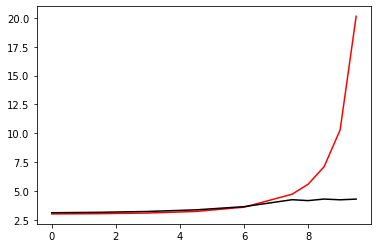

140800 0.04478310606646277
[3.14630934 3.19208034 3.270546   3.40461014 3.64463166 3.92685014
 3.86428344 3.73218178 3.76825872 3.87311502]


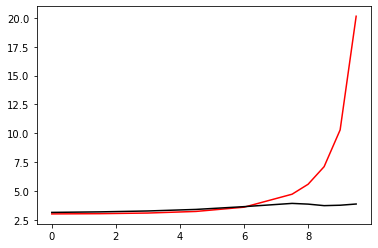

141900 0.031309256871684406
[3.07714677 3.13027796 3.22515761 3.37550673 3.62200546 3.92513206
 3.93118762 3.94274555 3.93713846 3.95929632]


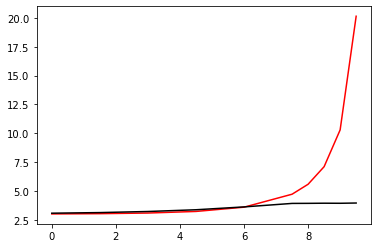

143000 0.0543699982419227
[3.02979735 3.08481462 3.18731773 3.35035496 3.61117755 4.02031884
 4.07900837 4.08828701 4.11522313 4.06830032]


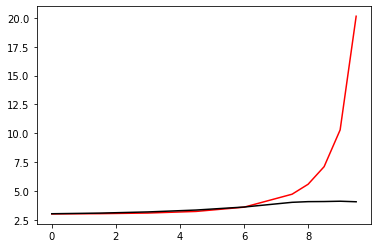

144100 0.023484952585833357
[3.02242185 3.062567   3.15332321 3.3140571  3.5942415  4.11625945
 4.1485319  4.17874888 4.19472588 4.18420053]


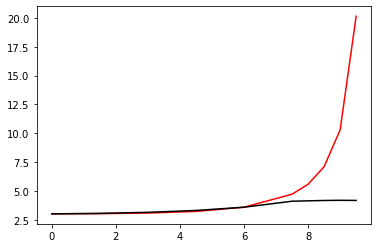

145200 0.022135536112968875
[2.94914484 2.9771476  3.05208653 3.20034519 3.48498479 4.08444767
 4.15781477 4.13240303 4.2416144  4.1536545 ]


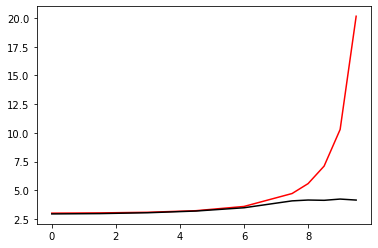

146300 0.011426820882143255
[2.96661303 2.98017808 3.02797708 3.14509173 3.41048283 4.0723328
 4.10378894 4.15451772 4.16762246 4.19653419]


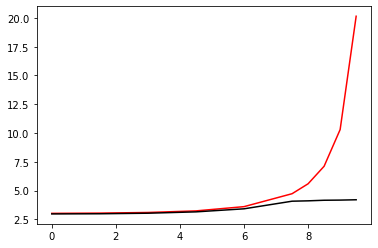

147400 0.03781936753373286
[2.9516225  2.97558554 3.0400054  3.17778791 3.46808707 4.08942021
 4.2089906  4.1454178  4.28703558 4.17970238]


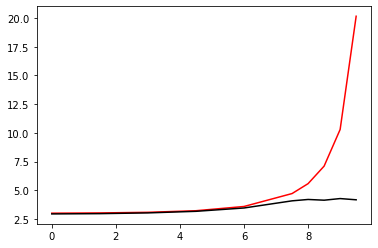

148500 0.03922802838244676
[3.08693561 3.12639055 3.21486014 3.38120238 3.69504049 4.30445883
 4.29045352 4.37718509 4.35309444 4.34991937]


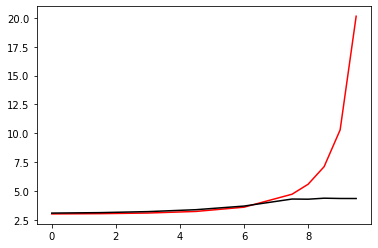

149600 0.023033687248922786
[2.99216555 3.0279402  3.10976368 3.26964017 3.58412026 4.26313338
 4.36573813 4.35937108 4.39787561 4.41809619]


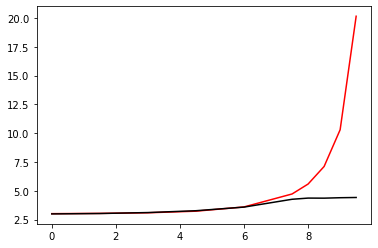

150700 0.05026350030946503
[2.91365885 2.9273625  2.98513589 3.12903573 3.44613904 4.15349673
 4.19561696 4.27513949 4.30235929 4.30010616]


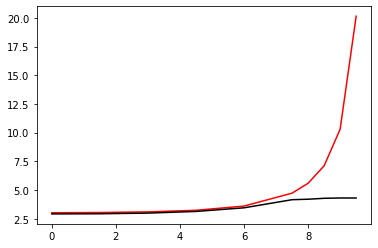

151800 0.04193018519909561
[3.05823879 3.09358871 3.16906097 3.31903821 3.62519475 4.3216667
 4.28829104 4.45062548 4.33846297 4.49053188]


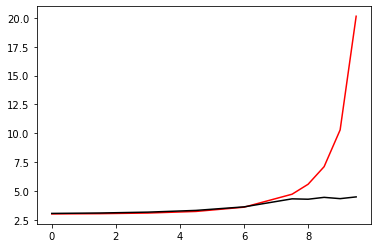

152900 0.031952726113804
[2.99179609 3.0080426  3.06267582 3.19249895 3.48146179 4.19170957
 4.28363615 4.32506655 4.30446444 4.45048791]


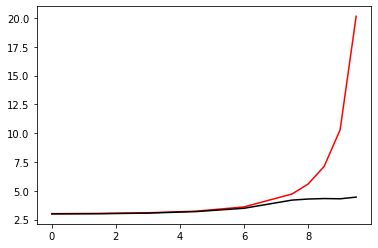

154000 0.05011465735039064
[2.99776663 3.01545476 3.07074654 3.21281615 3.55691398 4.29116449
 4.52218028 4.35363711 4.54116667 4.36219203]


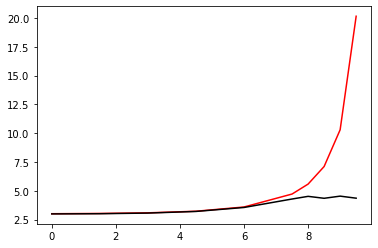

155100 0.02380577702436847
[3.1098649  3.10928674 3.13749313 3.23814915 3.50226788 4.21082075
 4.25438144 4.26909952 4.31732147 4.26291961]


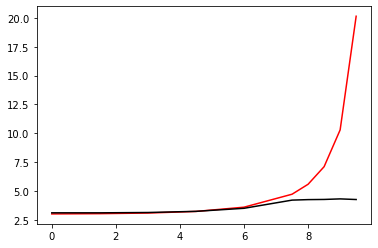

156200 0.022115153712519053
[2.97544544 2.98704696 3.03076208 3.14745857 3.43826692 4.22462144
 4.25104634 4.31064212 4.36641144 4.32632549]


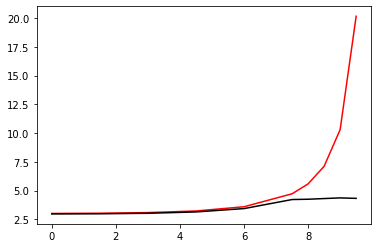

157300 0.013807104484560243
[3.01795853 3.03057657 3.07594991 3.19870821 3.50280216 4.42875653
 4.23948286 4.46614399 4.33630611 4.44388852]


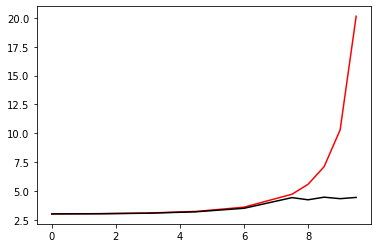

158400 0.041180184298105806
[2.93295357 2.93802407 2.9748926  3.09282744 3.40692412 4.26960011
 4.33067229 4.38065858 4.44287129 4.39287482]


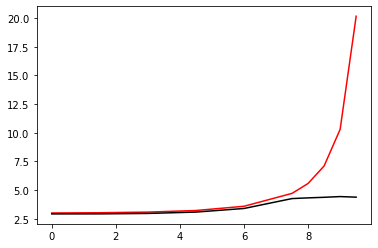

159500 0.058100336167614154
[2.91092508 2.93559649 2.99536421 3.12839848 3.43328849 4.19624017
 4.26072487 4.34594959 4.34228625 4.43385099]


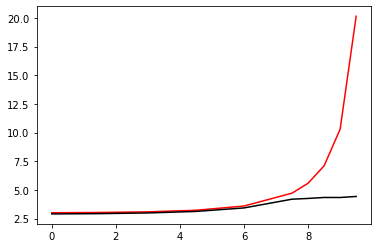

160600 0.012895211251969794
[2.93861836 2.96551095 3.0278288  3.15583019 3.42983317 4.1321763
 4.25082333 4.24067526 4.28598123 4.31463979]


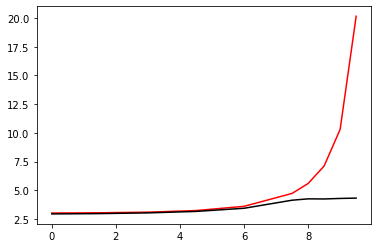

161700 0.051963093277841196
[3.03639447 3.04278271 3.07867021 3.18272695 3.44536272 4.20303912
 4.16608426 4.31647265 4.22973608 4.35240789]


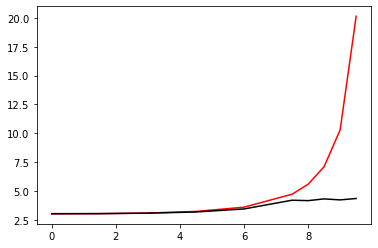

162800 0.04064860416618919
[3.01059135 3.04913581 3.12595562 3.26708436 3.53435647 4.07575158
 4.19537891 4.19217541 4.19639718 4.29853369]


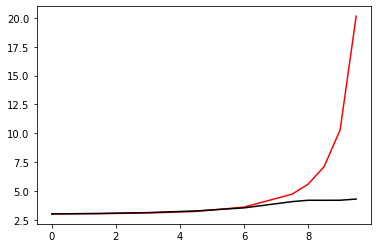

163900 0.03202357984013537
[2.98240502 3.00416023 3.06126239 3.18306064 3.43979004 4.09337653
 4.03455706 4.19181923 4.10600235 4.21148054]


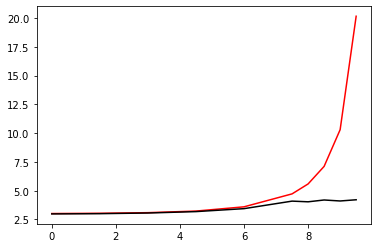

165000 0.04911475715039751
[2.98759917 2.99565506 3.04147572 3.17167027 3.4882582  4.21941677
 4.30896403 4.32984328 4.39375768 4.29692818]


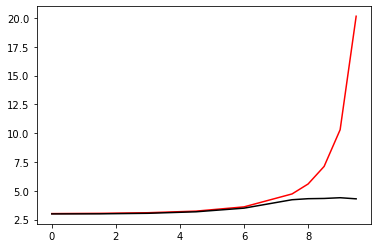

166100 0.023427437278110363
[3.08905656 3.11404038 3.17251267 3.29930077 3.58723564 4.25735289
 4.29702461 4.33112543 4.35802696 4.33246985]


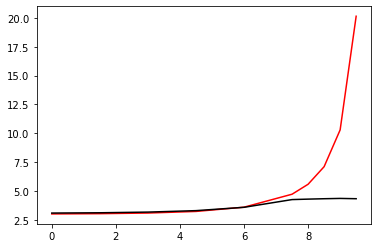

167200 0.022265207839149807
[3.07710745 3.09865013 3.15530165 3.27825125 3.54701052 4.25842727
 4.16510057 4.33517579 4.25526716 4.32652478]


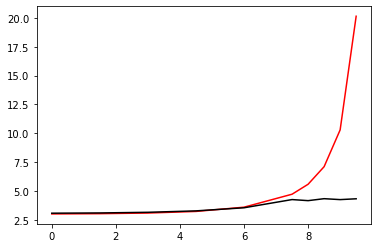

168300 0.011366188907849288
[3.07840321 3.11137    3.18202664 3.31368039 3.57662498 4.14181071
 4.1798895  4.20376053 4.20343214 4.24026337]


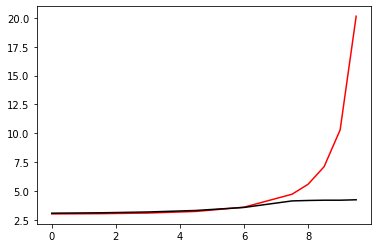

169400 0.06302105039829446
[2.87974055 2.90750776 2.98352834 3.14362142 3.47299671 4.28047483
 4.20070372 4.38485891 4.28736943 4.40518113]


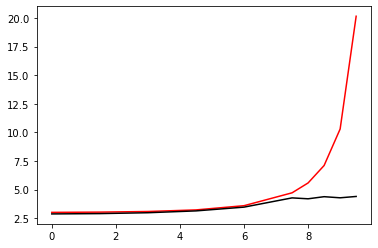

170500 0.04387045302581898
[2.93299729 2.95163055 3.01313951 3.15836017 3.482972   4.23879178
 4.27984456 4.3439521  4.35825239 4.35776129]


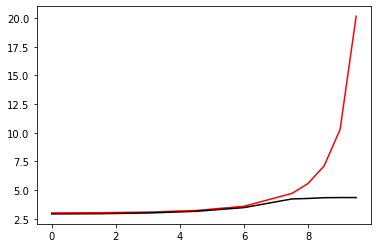

171600 0.031393508752543584
[3.10158101 3.10442577 3.13729272 3.24203698 3.51191052 4.2320583
 4.296918   4.30998292 4.36335052 4.35215855]


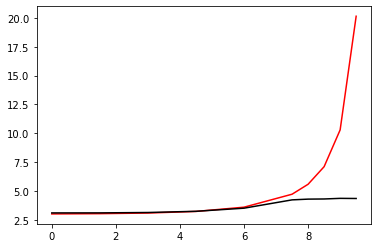

172700 0.05127874535206795
[3.0228652  3.04546998 3.10165394 3.21599538 3.4567247  4.08380004
 4.13891304 4.14457623 4.1819047  4.17686396]


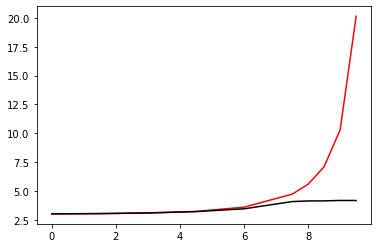

173800 0.03179659790459905
[2.96786166 2.97326987 3.00589356 3.09688014 3.32212415 3.95804129
 4.00736367 4.07764606 4.08544012 4.09662358]


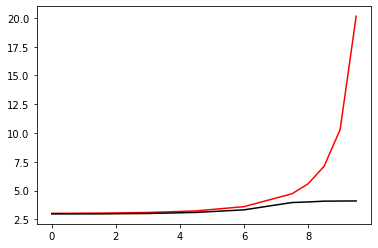

174900 0.03138981096946219
[2.99795204 3.01382783 3.05820874 3.16475275 3.41544077 4.10257642
 4.11823918 4.15136088 4.1823023  4.15797147]


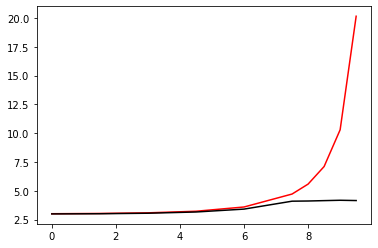

176000 0.05021068183930275
[2.99359902 3.01300394 3.06627223 3.1921552  3.482849   4.13965663
 4.23140872 4.22384056 4.326138   4.1893607 ]


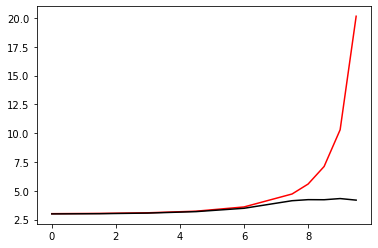

177100 0.023050708127384616
[3.00416279 3.02639582 3.08422971 3.21614383 3.51571176 4.19771664
 4.23745161 4.29764563 4.27941867 4.33539664]


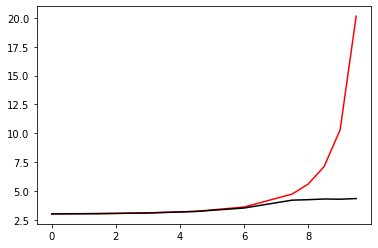

178200 0.023222038308717458
[2.96181978 2.97582777 3.03122614 3.17487899 3.51671041 4.26178582
 4.41552477 4.33799867 4.5189684  4.33792451]


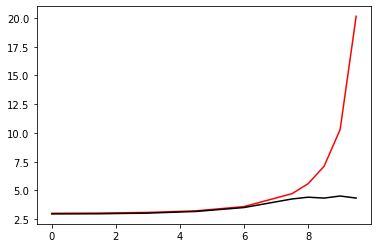

179300 0.011361896839595343
[3.09617285 3.10791989 3.14679159 3.24919962 3.50524424 4.19975666
 4.24769176 4.27436012 4.30942146 4.3087822 ]


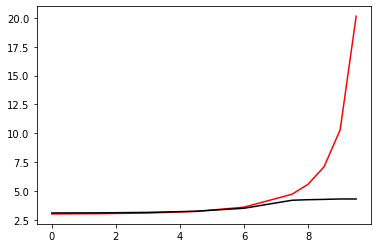

180400 0.03932028220916153
[2.92249118 2.94672123 3.00912443 3.1420094  3.43572519 4.13486697
 4.29334739 4.19344185 4.37065362 4.2419487 ]


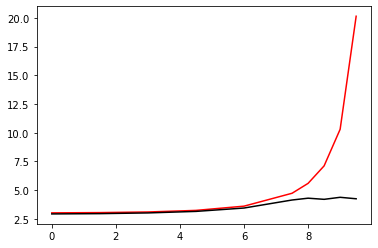

181500 0.04646782641647154
[3.11985356 3.14762652 3.21166205 3.34361234 3.62324983 4.26005352
 4.25046224 4.32874995 4.32944779 4.29833692]


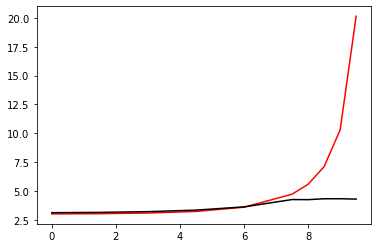

182600 0.014319108747406894
[2.98252634 2.98882143 3.02758511 3.12969945 3.37837528 4.02407454
 4.1331623  4.10904475 4.22349957 4.10411756]


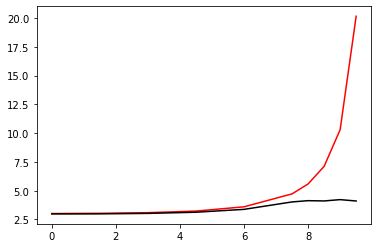

183700 0.06090510555423718
[3.14881799 3.1718499  3.22923761 3.3615423  3.65621185 4.29160259
 4.21182031 4.34410261 4.28549628 4.29875582]


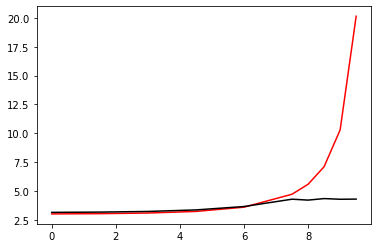

184800 0.03202971030326995
[2.96978919 2.97209354 3.00054567 3.08966187 3.31939645 4.00371607
 4.12354477 4.10667198 4.19813426 4.15906941]


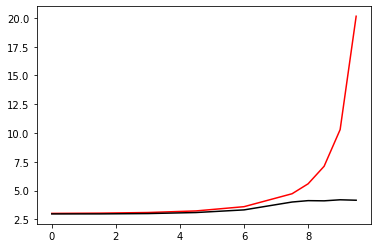

185900 0.03146673749265527
[3.00796356 3.02538696 3.07059653 3.177912   3.42988203 4.10154139
 4.08418576 4.18715034 4.17248111 4.17174969]


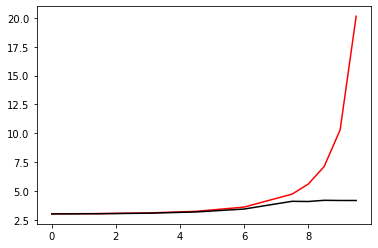

187000 0.05201969754870826
[3.01008801 3.02883879 3.07950728 3.20024221 3.48231284 4.12893958
 4.22051408 4.20897575 4.30983557 4.15447   ]


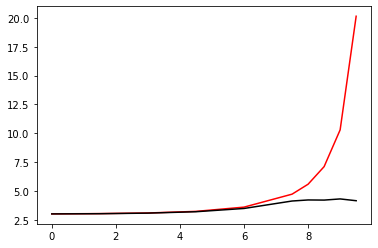

188100 0.023505566958999934
[3.03440731 3.0554674  3.11413099 3.25229661 3.56850851 4.31456309
 4.27390262 4.41203268 4.3334171  4.43735678]


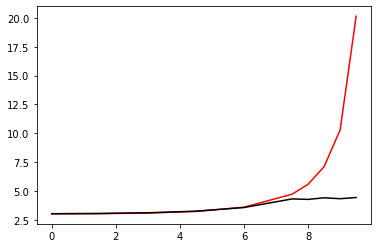

189200 0.022172393515917613
[3.06216221 3.08779056 3.15505191 3.29739284 3.59824135 4.27619017
 4.40075921 4.3506243  4.4615826  4.38627066]


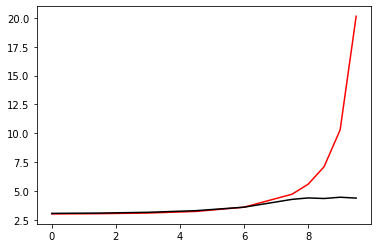

190300 0.01186196462212307
[3.08162774 3.10332003 3.16180619 3.29073686 3.57278143 4.35287998
 4.33676174 4.43188027 4.41242992 4.45922594]


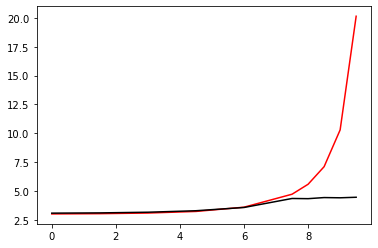

191400 0.030995928012564344
[3.09961494 3.12339749 3.17917167 3.2886877  3.52163011 4.14583995
 4.16875268 4.22630592 4.21802616 4.24706255]


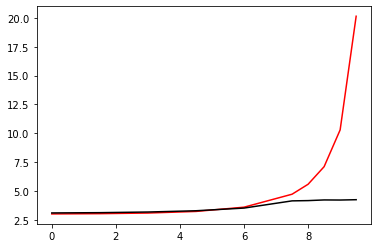

192500 0.049062301019586474
[3.00170126 3.02374839 3.08578586 3.22365058 3.52710263 4.31576794
 4.12521373 4.40336476 4.27184648 4.30258027]


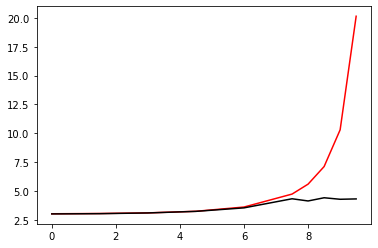

193600 0.035544258736816846
[2.89074183 2.9251544  2.99592151 3.13796594 3.43708427 4.17569468
 4.27457401 4.31191214 4.27900156 4.45666448]


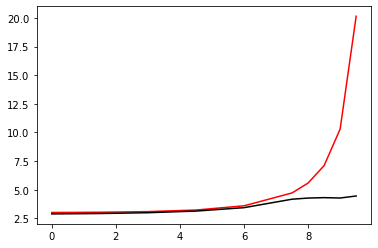

194700 0.051296567242367995
[2.97043177 2.96813535 2.99962291 3.10794766 3.39797413 4.25869587
 4.15747555 4.38696109 4.26940229 4.40811316]


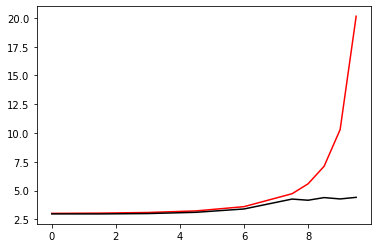

195800 0.03868135646153484
[2.9751142  3.02026055 3.12212235 3.32027456 3.70333626 4.40492317
 4.49290596 4.49934412 4.5295017  4.5430268 ]


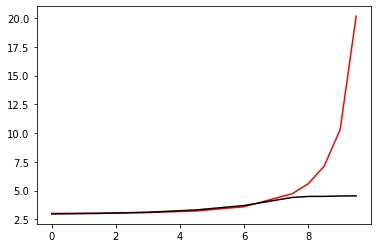

196900 0.0321240421874967
[3.06140833 3.06701583 3.1048584  3.22075707 3.51203723 4.34961461
 4.31457163 4.43628894 4.38097725 4.47632634]


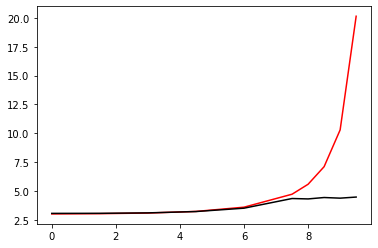

198000 0.05375617350129287
[3.06253379 3.08757306 3.1455415  3.26435505 3.52435514 4.21059999
 4.20473574 4.28429151 4.28786241 4.26568475]


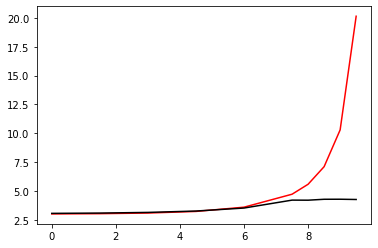

199100 0.023720134901588658
[3.0428329  3.06025052 3.10917445 3.21830178 3.46535243 4.07701648
 4.14608486 4.14755465 4.22479098 4.14209778]


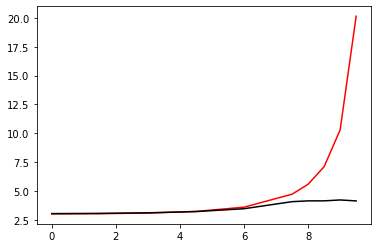

200200 0.0224070176399207
[2.95127497 2.97535889 3.04407923 3.19410944 3.51305168 4.25893315
 4.21869511 4.33786796 4.30398722 4.3457734 ]


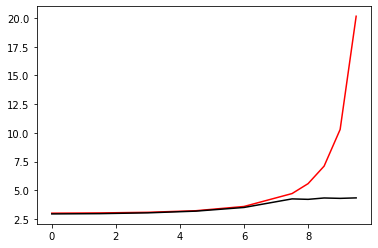

201300 0.011466200725849897
[2.96015977 2.98903824 3.05336477 3.17985564 3.44171164 4.07027261
 4.11926028 4.13611191 4.17115263 4.18217573]


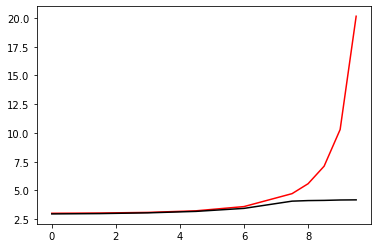

202400 0.04005860629485558
[2.91846856 2.94548377 3.01130175 3.14553914 3.42583677 4.0859562
 4.09997596 4.227505   4.19059454 4.17594239]


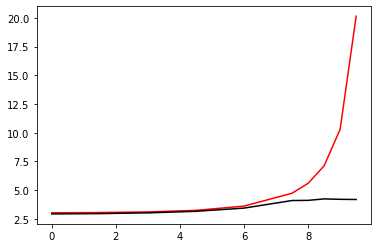

203500 0.04436891420122956
[3.11692568 3.14710187 3.21518219 3.34918456 3.61811059 4.16706816
 4.22469654 4.21067681 4.28306222 4.19042183]


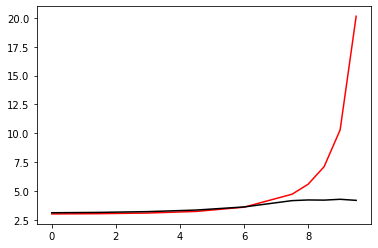

204600 0.03240114090519626
[3.05084703 3.08980386 3.18201553 3.36175266 3.70688873 4.37360441
 4.374356   4.48592145 4.38949899 4.51400658]


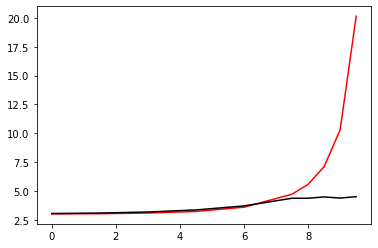

205700 0.051460662466952196
[3.03956365 3.06534944 3.13835716 3.29349628 3.60750982 4.2905223
 4.36708434 4.32861592 4.42032103 4.40274796]


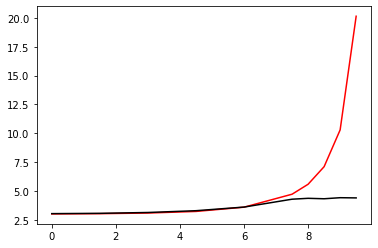

206800 0.03154139533495762
[2.94802265 2.95281625 2.99977308 3.12077221 3.38904637 3.93384647
 3.95044023 3.96092256 3.98779416 3.99636168]


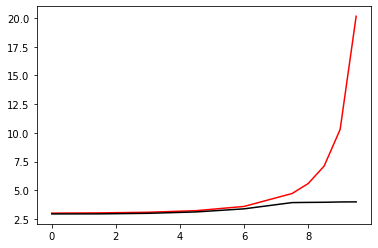

207900 0.03149267454740722
[2.97996778 2.99216754 3.04164344 3.16630646 3.44021363 4.00248942
 4.03824797 4.06995311 4.09162732 4.06363444]


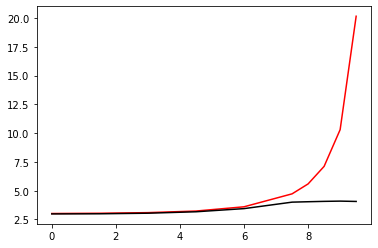

209000 0.05397827070319712
[3.03513144 3.04625615 3.09640954 3.22507816 3.51201996 4.14211311
 4.18562215 4.22522769 4.2447245  4.24521618]


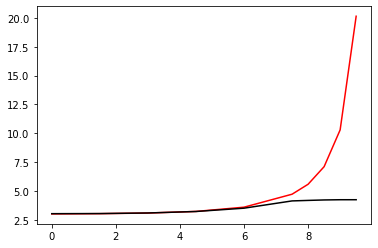

210100 0.023280414506263794
[3.06712523 3.08706194 3.14428907 3.27732167 3.57264905 4.25796748
 4.31076419 4.33666732 4.39390696 4.30632978]


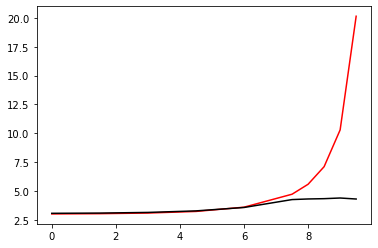

211200 0.02513106792959049
[3.01275166 3.02798921 3.08108396 3.2151281  3.52622631 4.29123688
 4.28534711 4.38773784 4.43445297 4.3363804 ]


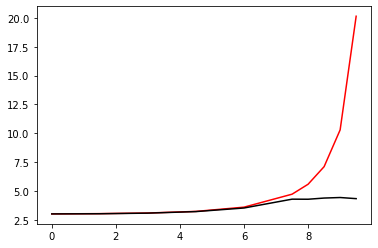

212300 0.011490864106415366
[3.10317269 3.11550354 3.15635313 3.26596    3.53431989 4.21231932
 4.30440501 4.29579311 4.33773808 4.33252022]


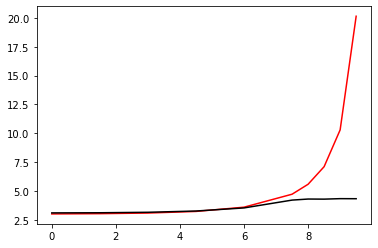

213400 0.05210505405616467
[2.91157956 2.92658525 2.97858602 3.10949489 3.42460891 4.29077015
 4.27344814 4.38838884 4.42506048 4.35416624]


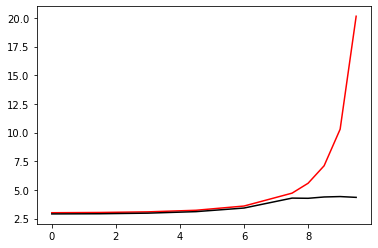

214500 0.04178210093175106
[3.10934315 3.13734158 3.20447155 3.34784685 3.65811432 4.30968463
 4.34060794 4.3778963  4.42215629 4.37052876]


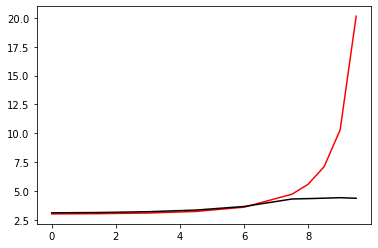

215600 0.03026339389689702
[3.03310574 3.06588797 3.13692391 3.27170693 3.54171629 4.11305131
 4.27950948 4.20084228 4.27920652 4.27567971]


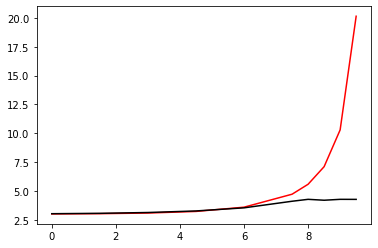

216700 0.055289595407213454
[3.15235899 3.15670823 3.20520744 3.3425565  3.66072817 4.35541628
 4.29755769 4.38827964 4.3431433  4.43812471]


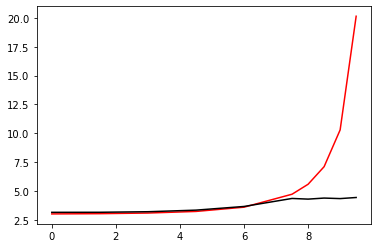

217800 0.04177412349481936
[3.07774283 3.10101991 3.15429734 3.26534268 3.50756344 4.13294443
 4.21273786 4.1725576  4.25085547 4.17372089]


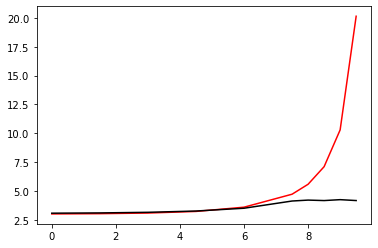

218900 0.03167234420389448
[2.97971408 2.99936186 3.05226203 3.16881612 3.42941598 4.12361987
 4.10990909 4.21106577 4.19673838 4.22328839]


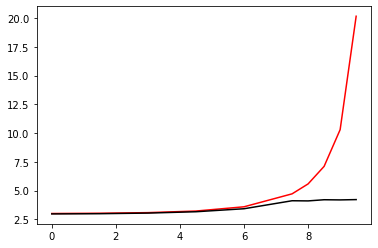

220000 0.05338863145090221
[3.03902816 3.07764903 3.16924718 3.34541237 3.68155864 4.32686682
 4.42671658 4.37886374 4.49341956 4.40347778]


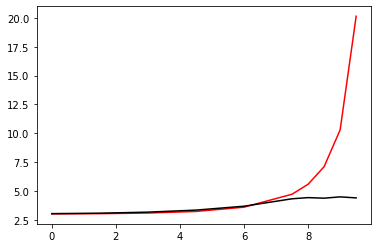

221100 0.0234750357254884
[2.99652984 2.99753235 3.04035532 3.16201111 3.43234516 3.99703013
 4.03425521 4.07893579 4.10833717 4.09541821]


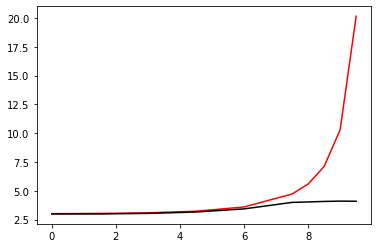

222200 0.02290496690005043
[2.99337793 3.00271727 3.04898512 3.17628107 3.46475407 4.1038519
 4.15231373 4.19977219 4.23098328 4.2116596 ]


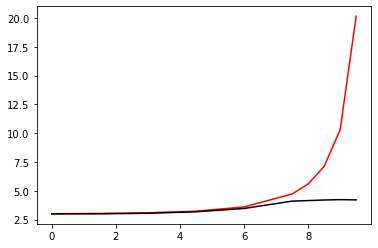

223300 0.011412422316927628
[3.09649163 3.10671974 3.14879327 3.26521912 3.54312097 4.20699135
 4.24839481 4.26912771 4.31327485 4.27070586]


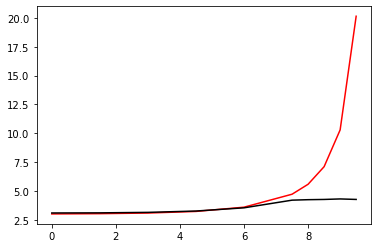

224400 0.09572051576517407
[3.21285243 3.22720235 3.28340726 3.4135812  3.70395592 4.43155449
 4.36688467 4.50210665 4.47316871 4.41464905]


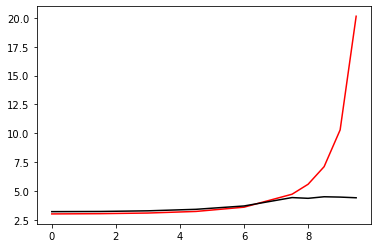

225500 0.04542219618275849
[2.97234885 3.00025357 3.06335859 3.20358885 3.52060834 4.34711711
 4.31280594 4.48094546 4.3954922  4.51842011]


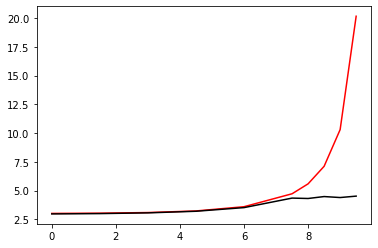

226600 0.027536036586583986
[2.91974749 2.93316545 2.97966515 3.09732902 3.3816724  4.13321462
 4.26194093 4.25875986 4.34519168 4.43731258]


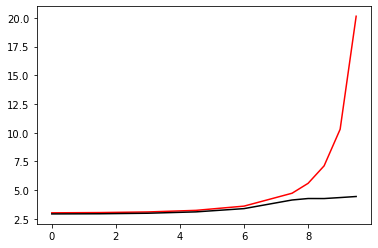

227700 0.05135505501462717
[3.0244511  3.02414209 3.04448898 3.12102994 3.34016651 4.09150953
 4.07911672 4.18807635 4.1952607  4.20718734]


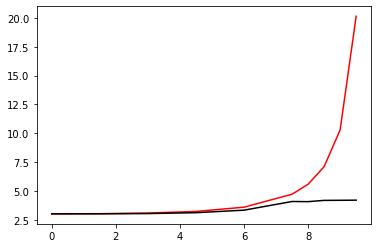

228800 0.038457297381310804
[3.01361989 3.0315495  3.08244217 3.19828366 3.46531685 4.1603852
 4.20129662 4.25051365 4.28247367 4.26642844]


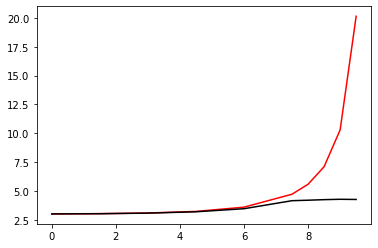

229900 0.03190617055381801
[3.01309561 3.01965544 3.05369773 3.15429782 3.41640062 4.16744166
 4.24518288 4.23780505 4.36906895 4.22386807]


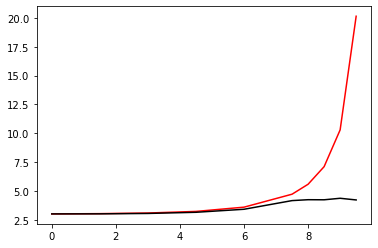

231000 0.0507670937791952
[3.00786007 3.02323984 3.0678051  3.18044527 3.4586992  4.15614645
 4.24802063 4.25845018 4.33054409 4.26255503]


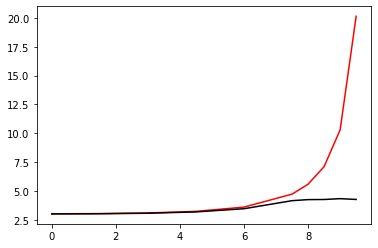

232100 0.02304253931726028
[3.01360988 3.02083843 3.0572175  3.16680394 3.45702645 4.22395934
 4.25105972 4.32940691 4.3227733  4.35293921]


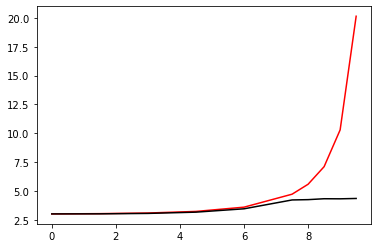

233200 0.022184854749666028
[2.9789353  2.98386164 3.01829635 3.12804064 3.42680648 4.18968245
 4.27685586 4.2739032  4.37662472 4.28322533]


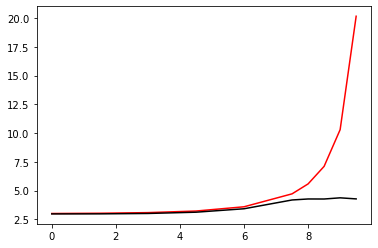

234300 0.011549681249281364
[3.09293302 3.10720559 3.15039938 3.25845875 3.51877724 4.23871428
 4.22583915 4.31802298 4.29155526 4.34880843]


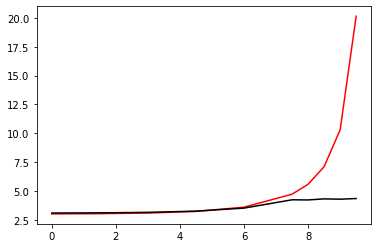

235400 0.04114395407705734
[3.01523339 3.03110248 3.07568263 3.17662652 3.41269147 4.05099319
 4.14049123 4.11203273 4.20660461 4.15495534]


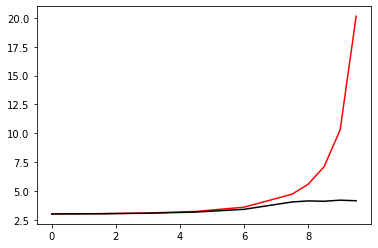

236500 0.05932950589477079
[3.14394556 3.15880701 3.21178692 3.34174431 3.63767559 4.30183485
 4.30045099 4.41209358 4.32877709 4.43795286]


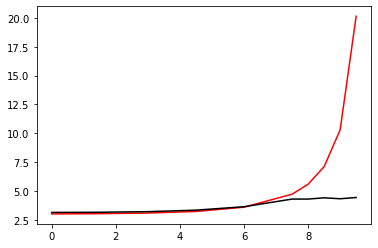

KeyboardInterrupt: 

In [53]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for j in range (5000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, Positive[j%10], Negative[j%10])
        gradients=g.gradient(loss, [h])
    for i in range (100):
        optimizer.apply_gradients(zip(gradients, [h]))
    if j%11==0: 
        print(j*100, Error_func(h, Positive[j%10], Negative[j%10]).numpy()), print(h.numpy())
        plt.plot(x, h_real, 'r-'), plt.plot(x, h.numpy(), 'k-'), plt.show()

c_reg1=0.03

0 1.3813970565091869
[ 0.66178663  0.58172367  2.29353945  2.58559867  1.89217563  4.83307731
  5.42310219  6.88267665 10.52830123 19.11121335]


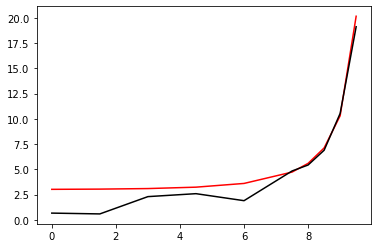

1100 1.301973744408787
[ 0.53342444  0.82425165  1.35453377  1.59448669  2.01668293  5.79102938
  6.44579157  7.93723834 11.4413542  18.0798819 ]


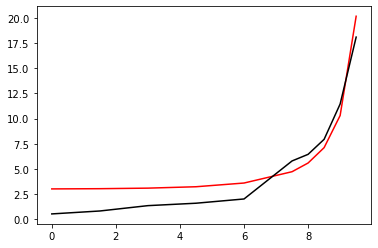

2200 1.1402875787021862
[ 0.35475484  0.48992413  0.78570035  1.10499559  1.90118905  6.81193054
  7.48895089  8.93663157 12.07807216 17.14323849]


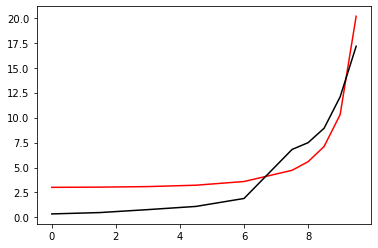

3300 1.1300066029816696
[ 0.4140839   0.44984174  0.56850545  0.83251822  1.78389079  7.64724311
  8.35859602  9.73779518 12.36139129 16.26666197]


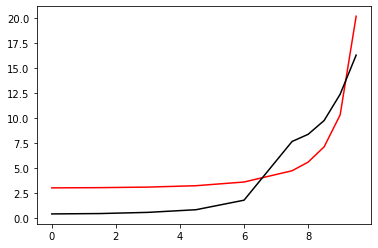

4400 1.0545462382363495
[ 0.45931829  0.44287242  0.45615228  0.63656022  1.67133511  8.36672839
  9.09179374 10.33904632 12.4013069  15.42248234]


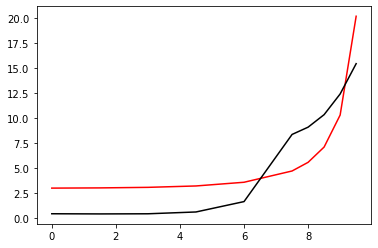

5500 1.0206259629633136
[ 0.47898415  0.46543134  0.47626017  0.67226925  1.84620594  8.96795057
  9.65507387 10.71854513 12.3236621  14.60512661]


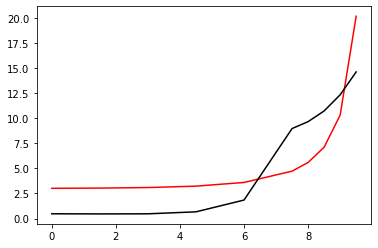

6600 1.0365559613952895
[ 0.48369635  0.48428363  0.52970997  0.78709653  2.10573351  9.38157415
  9.98501855 10.86797632 12.17516515 13.80107091]


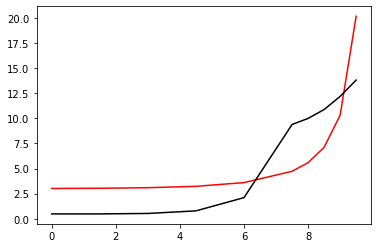

7700 1.0342353547234013
[ 0.36523679  0.35500302  0.37966156  0.62157775  1.9263373   8.97122487
  9.57321545 10.41469165 11.4982638  12.96582952]


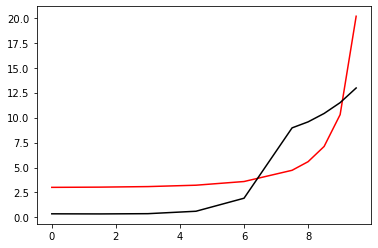

8800 1.0226385724312523
[ 0.44269707  0.45302389  0.5129652   0.80664217  2.15633851  8.75074215
  9.28169028  9.99040562 10.89244851 12.13342577]


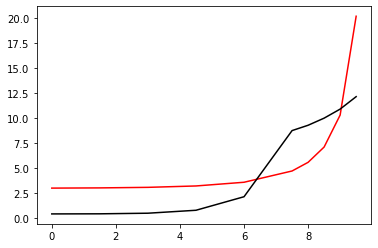

9900 1.040879248371583
[ 0.55926445  0.59115441  0.67738572  0.97091949  2.17360943  8.07765907
  8.52908635  9.18094103 10.02592853 11.20241596]


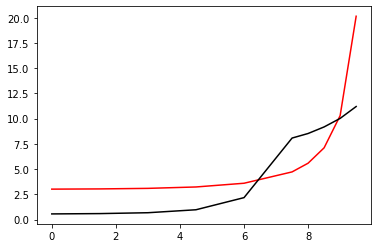

11000 1.0106903208079454
[ 0.31477356  0.33338178  0.40902944  0.69875263  1.86191143  7.54063151
  8.0617408   8.59010424  9.35943529 10.28567401]


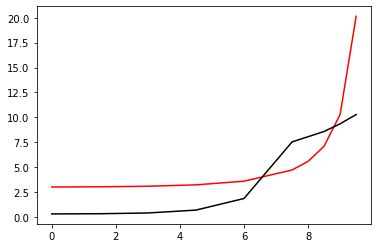

12100 1.0187251009783713
[0.14743469 0.19045366 0.28359628 0.60818272 1.8207955  7.15097894
 7.52108877 8.06739646 8.70348456 9.38712062]


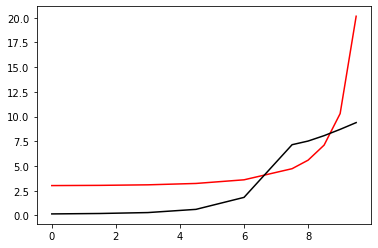

13200 0.9702245303448039
[0.26448577 0.26457234 0.32390521 0.5984021  1.64963102 6.37059547
 6.81198709 7.17197001 7.75622571 8.4775167 ]


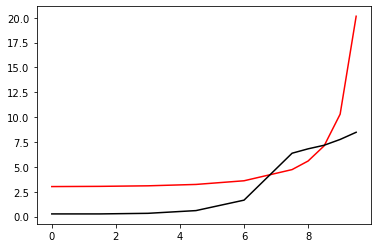

14300 1.0092741136160581
[0.39206825 0.41289445 0.51067256 0.81751646 1.86970717 6.14113538
 6.46820389 6.8518093  7.26432777 7.61987274]


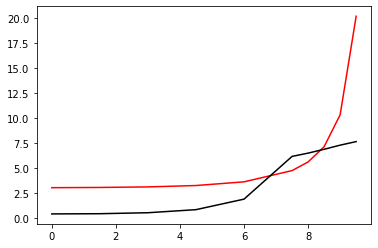

15400 0.9261053593227955
[0.65034446 0.64734039 0.69714635 0.95028243 1.92582898 5.86665245
 6.14224642 6.40368345 6.6565122  6.86684769]


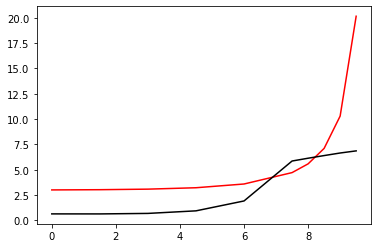

16500 0.9074409625419205
[0.30391269 0.32854899 0.40597865 0.65568821 1.54082613 5.14706342
 5.38320877 5.63253501 5.88620041 6.22043307]


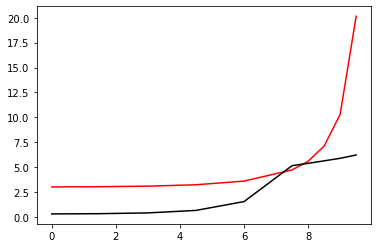

17600 0.9332204411527724
[0.54563822 0.51815693 0.50886349 0.60686158 1.21173373 4.33796461
 4.55385332 4.78428177 5.02913243 5.34159355]


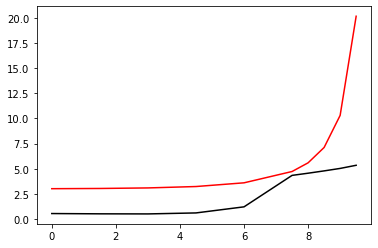

18700 0.9277498121880267
[0.47314644 0.45570801 0.40814607 0.38783595 0.75547255 3.552842
 3.75508106 3.97762967 4.20716287 4.37080613]


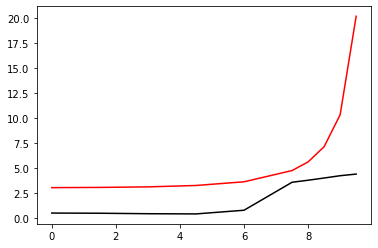

19800 0.8517856335565559
[0.80673083 0.75692236 0.6640883  0.54042655 0.63690755 2.78955703
 2.9368891  3.09826449 3.27433969 3.61149811]


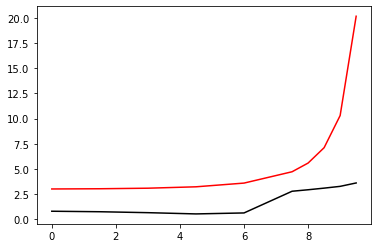

20900 0.9541827356345077
[0.90569026 0.86127696 0.75575774 0.59182818 0.55634684 2.18767336
 2.30060052 2.42574577 2.57424878 2.74704024]


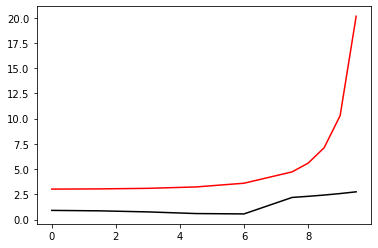

22000 0.9077200343014901
[0.81480612 0.76912437 0.67205555 0.51090346 0.41393272 1.61730592
 1.71345158 1.82827992 1.95202157 2.08924503]


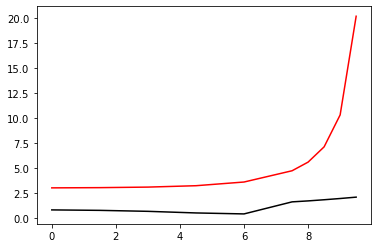

23100 1.0019078008532494
[0.578952   0.58304115 0.55869994 0.48110862 0.41638281 1.23989796
 1.32284299 1.41388885 1.50707391 1.45232772]


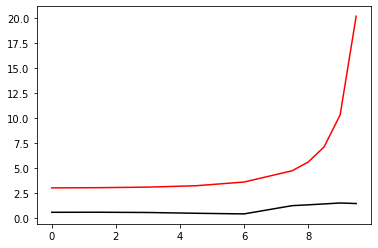

24200 0.906492744575274
[0.72791667 0.7219628  0.66785075 0.48547144 0.09633474 0.32739125
 0.3628662  0.4152338  0.5129129  0.63712472]


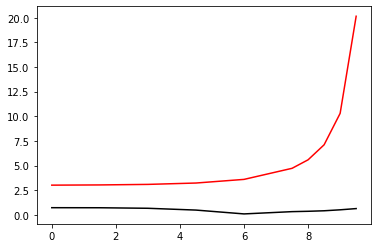

25300 1.015357778623636
[ 0.83593205  0.77916833  0.61380487  0.2289448  -0.50175757 -0.60238913
 -0.60018905 -0.56057886 -0.46597222 -0.49795756]


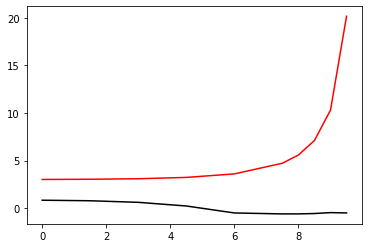

26400 0.46772459128438043
[ 2.3552684   2.2413021   1.90903667  1.07033112 -0.74884485 -1.92656495
 -2.01002974 -2.06183231 -2.03790711 -1.65109326]


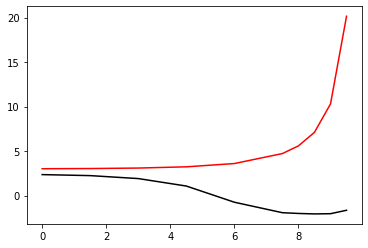

27500 0.098939157718288
[ 3.25786259  3.19373714  2.98052109  2.393095    0.77477794 -1.65937353
 -1.86569088 -2.06209144 -2.17668246 -2.25926786]


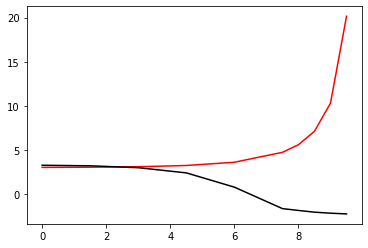

28600 0.1331615552831609
[ 3.16066955  3.15153958  3.05156486  2.65790637  1.36588655 -1.17758587
 -1.36545983 -1.57050696 -1.73803153 -1.79163727]


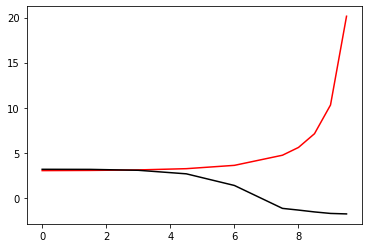

29700 0.048517680414972404
[ 3.16350015  3.17326516  3.14293818  2.90892462  1.9205901  -0.6383955
 -0.83099219 -1.03692872 -1.21092404 -1.22913807]


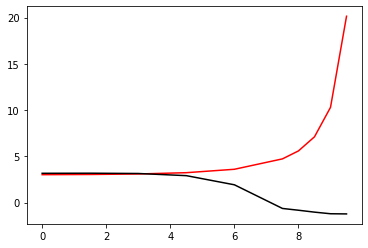

30800 0.06797504357025444
[ 3.40781447  3.40535174  3.36666727  3.17122123  2.38886089 -0.12395406
 -0.30407719 -0.49135376 -0.64454527 -0.6736155 ]


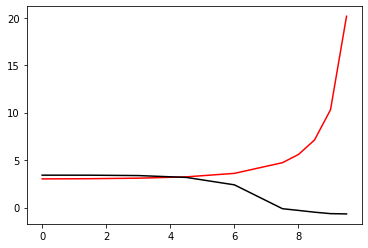

31900 0.07565306108924284
[3.11785875 3.16429536 3.22865141 3.20858758 2.73917114 0.52350028
 0.37471485 0.22158515 0.09016098 0.06578642]


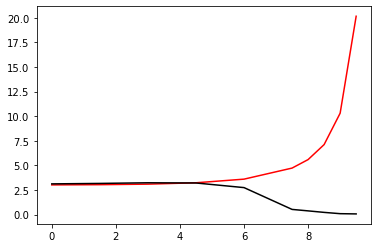

33000 0.03353481554686841
[3.16709681 3.24270012 3.37081084 3.472485   3.22962364 1.28650559
 1.15141438 1.00855156 0.88238183 0.86540834]


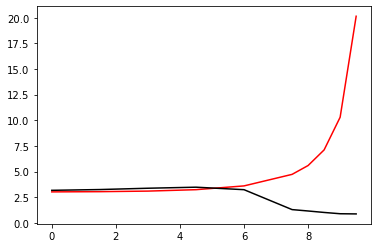

34100 0.05171571404247959
[2.94228215 3.02920564 3.15987632 3.2875087  3.19658249 1.66462504
 1.56915216 1.46774156 1.3830369  1.42708908]


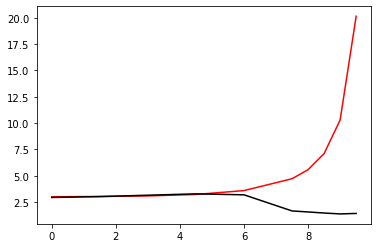

35200 0.014097277444807179
[3.03444216 3.07942012 3.18261714 3.31825776 3.32537991 2.23081143
 2.16869437 2.09677614 2.05308781 1.93619026]


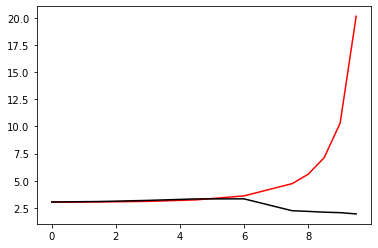

36300 0.1531166677412139
[2.7370059  2.83141978 2.97965171 3.15400611 3.24555098 2.56711097
 2.53493053 2.48778391 2.45262679 2.70841717]


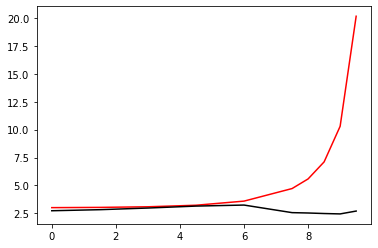

37400 0.01113323355787782
[3.07233237 3.15573013 3.30883506 3.50380774 3.64165122 3.15076718
 3.11232964 3.06376975 3.0164991  3.00501114]


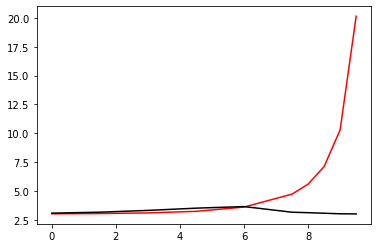

38500 0.002915676292773362
[3.05333569 3.11968344 3.2632789  3.48811103 3.75478803 3.70071933
 3.70086206 3.68784251 3.67496803 3.58871654]


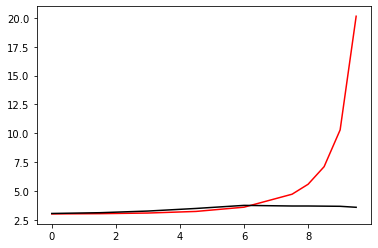

39600 0.030070757269122197
[2.93056813 3.00317696 3.15518037 3.39429709 3.68441561 3.64221796
 3.60528571 3.54621253 3.50458702 3.46792733]


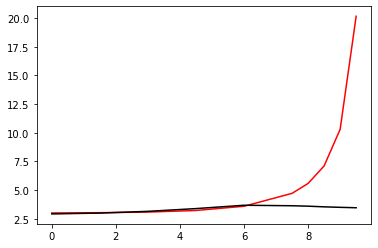

40700 0.011205184476039767
[2.94274675 3.01295816 3.16508418 3.40976611 3.71797847 3.72461154
 3.71946551 3.70445958 3.68265333 3.68375064]


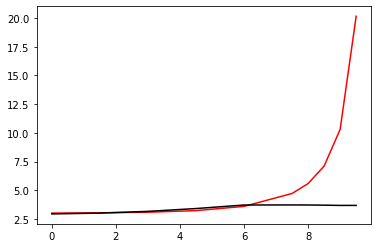

41800 0.04066856615816369
[2.94538345 3.01402085 3.16661239 3.41898046 3.75366738 3.87288232
 3.88755268 3.90229979 3.91192352 3.87714717]


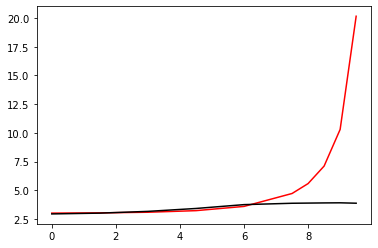

42900 0.047863195263748
[2.93081987 2.99697831 3.1482234  3.40772027 3.77789793 4.07966332
 4.10844124 4.14053363 4.15621938 4.22405001]


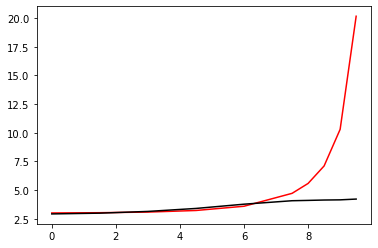

44000 0.001827392777085939
[2.97509407 3.04562572 3.20180776 3.47262914 3.88823057 4.40250307
 4.43844913 4.45946258 4.48749886 4.47487957]


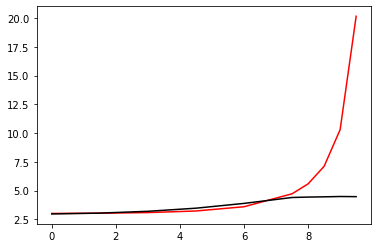

45100 0.04559004384479613
[2.90415059 2.92788068 3.04095956 3.27915544 3.6818243  4.27111009
 4.22531191 4.1956882  4.19119278 4.59983687]


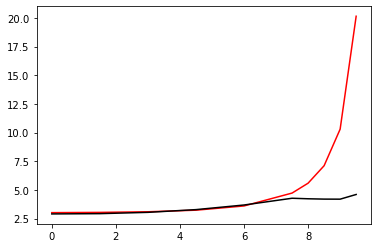

46200 0.0016060921194047126
[3.00969493 3.03350125 3.13302567 3.35619211 3.75128143 4.3103066
 4.33698622 4.35257924 4.35715265 4.35294977]


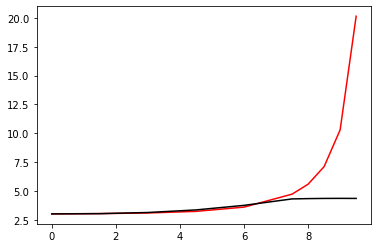

47300 0.03416711059283406
[3.00700103 3.04731256 3.15734857 3.38841734 3.80635679 4.46043562
 4.5093961  4.55305023 4.5875436  4.51506633]


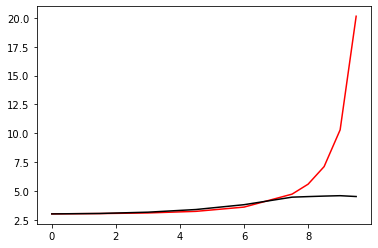

48400 0.011709719002031814
[3.0330804  3.08111318 3.1999975  3.43577462 3.87164598 4.65691284
 4.70670804 4.75173572 4.77188066 4.8110587 ]


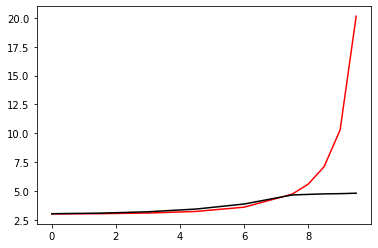

49500 0.0026802388704110103
[2.9630262  3.02887647 3.1822667  3.46867817 3.990249   4.99307781
 5.05776113 5.09098164 5.14850674 5.13244901]


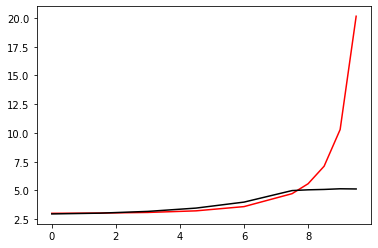

50600 0.013109507486656924
[2.95422702 3.01442158 3.1652079  3.46335694 4.03351308 5.26093353
 5.21346336 5.41221139 5.36677114 5.43596136]


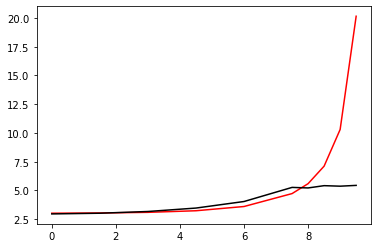

51700 0.06912315732462153
[3.05877103 3.13057647 3.290297   3.59940777 4.19738999 5.46979415
 5.52588279 5.5992578  5.6339724  5.61104121]


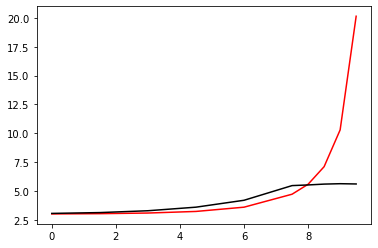

52800 0.029250698180771424
[2.97384715 3.02535229 3.1603083  3.43244916 3.95861257 5.00669192
 5.06811146 5.11240587 5.1388704  5.05219647]


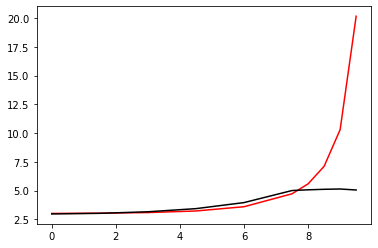

53900 0.06398611794635056
[2.81364455 2.89394579 3.05596627 3.36070803 3.94315604 5.12572793
 5.22186134 5.30593225 5.32913601 5.40230787]


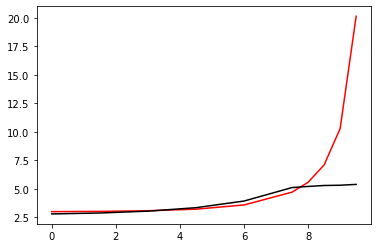

55000 0.0030743129379252132
[2.91931774 2.98098296 3.12632164 3.41057042 3.96082797 5.10160967
 5.17936287 5.24980554 5.27875274 5.29386569]


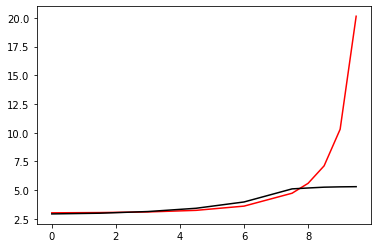

56100 0.04080265351152984
[2.99509547 3.0650616  3.22700607 3.54050499 4.14627016 5.4031257
 5.47610959 5.53872028 5.58768655 5.53908967]


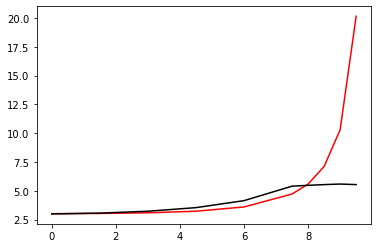

57200 0.003273411115877968
[2.86239585 2.92391771 3.0723782  3.35843083 3.90408507 5.05124281
 5.03939735 5.04143845 5.00831411 5.02348557]


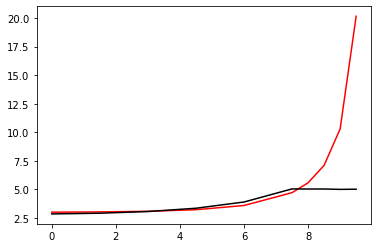

58300 0.02841219608241949
[2.91986112 2.97558256 3.11904605 3.40221255 3.94705548 5.05488078
 5.09334897 5.10243168 5.09768238 5.07041132]


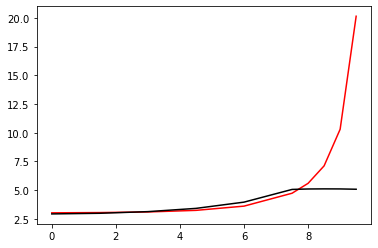

59400 0.012856481687133258
[2.92885579 2.98588958 3.13038752 3.41708006 3.96982293 5.07956939
 5.14028915 5.18469873 5.20625472 5.2372435 ]


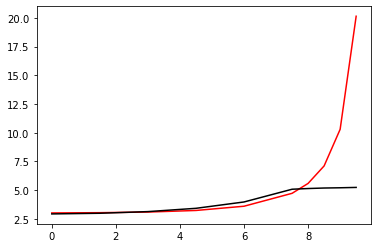

60500 0.0030745813183232634
[2.93281631 2.99114557 3.13754549 3.42972481 3.99539236 5.15188393
 5.2230897  5.28596462 5.33961777 5.26555339]


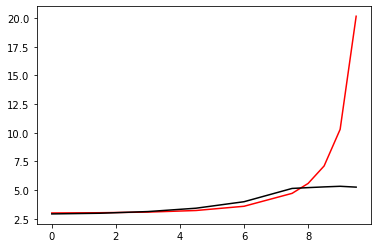

61600 0.013305093707794048
[2.93334121 2.99210909 3.14098366 3.44068766 4.02737031 5.27692977
 5.35097868 5.42051642 5.46394122 5.49501958]


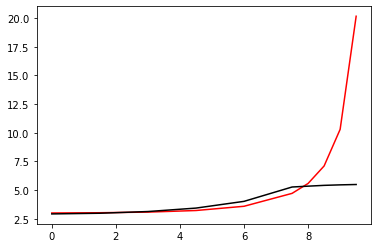

62700 0.5895096590172025
[2.63393964 2.69489771 2.84562272 3.15237673 3.76186187 5.0964583
 5.15999232 5.23602518 5.25908454 5.7395711 ]


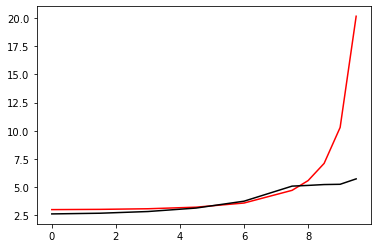

63800 0.0301653038665628
[2.92220262 2.96187897 3.08565154 3.35175149 3.88994721 5.06256917
 5.09334291 5.09423314 5.0827319  5.06388457]


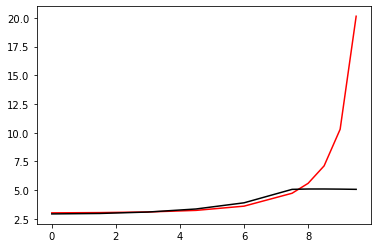

64900 0.041806819573159695
[2.93080114 2.97443028 3.10074863 3.37110022 3.91813905 5.08144048
 5.14120173 5.17871152 5.19551759 5.18202294]


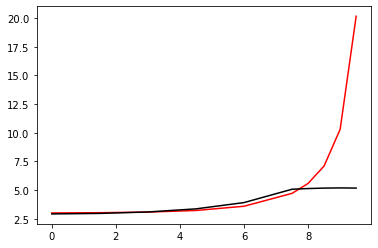

66000 0.003099371986382799
[2.92850942 2.97720099 3.10819731 3.38583394 3.94759094 5.13933939
 5.21709943 5.28587261 5.32861488 5.34324868]


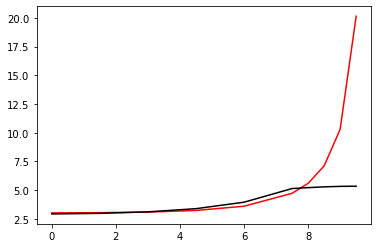

67100 0.03318851612807617
[2.91941252 2.97404904 3.11359868 3.40442332 3.99241253 5.26885912
 5.35417567 5.43343571 5.4967823  5.46215806]


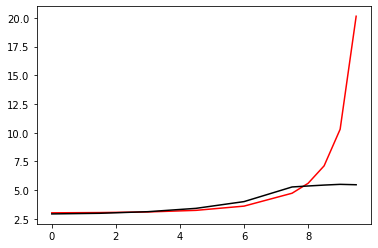

68200 0.003568743230653704
[3.0119548  3.06548325 3.2063374  3.5017892  4.10536397 5.45333808
 5.53347307 5.61047291 5.64331626 5.72259405]


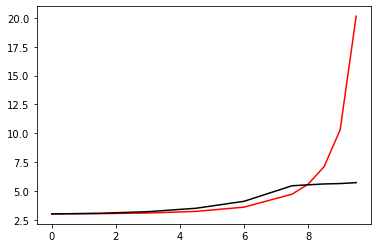

69300 0.023496886569950477
[2.93341235 3.00516424 3.16627313 3.4750528  4.08486332 5.42685754
 5.55921993 5.56581058 5.67604604 5.52741633]


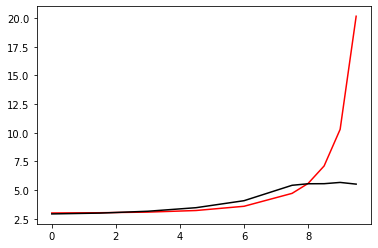

70400 0.014685297125010023
[2.87101503 2.95376841 3.13833336 3.48740344 4.16481856 5.62444364
 5.72479839 5.81102916 5.83940485 5.9082908 ]


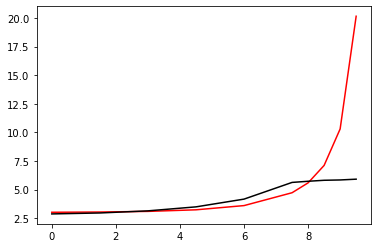

71500 0.0030576516427017805
[2.93909523 3.04668555 3.23447411 3.54732935 4.08460466 4.84533275
 4.88132448 4.90852348 5.04149764 5.19932386]


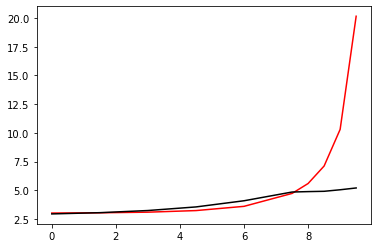

72600 0.006818827180050759
[2.97858301 3.07892626 3.27149776 3.59792922 4.16757176 5.08448075
 5.12917489 5.15065107 5.16361663 5.12118348]


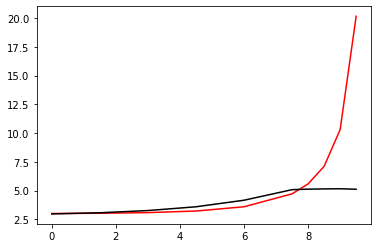

73700 0.004444635501542359
[2.97079482 3.06633985 3.2648082  3.6087752  4.21726711 5.31215617
 5.36274107 5.39847689 5.40889733 5.38913476]


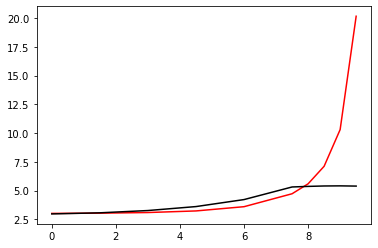

74800 0.027420189518044247
[2.90256448 3.03710168 3.26287613 3.6165747  4.18978391 4.96702117
 4.99017928 4.969805   5.00209202 5.00321633]


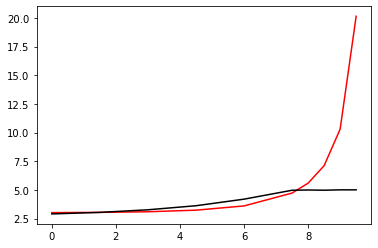

75900 0.03856312909317261
[2.93351371 3.05409532 3.28037148 3.64512042 4.24948692 5.1934591
 5.23113152 5.22907782 5.2061872  5.17540288]


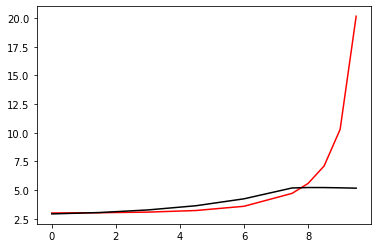

77000 0.004055105695848361
[2.93464461 3.04303852 3.26400586 3.6320402  4.24774786 5.30295163
 5.36554073 5.40543302 5.42968725 5.40998672]


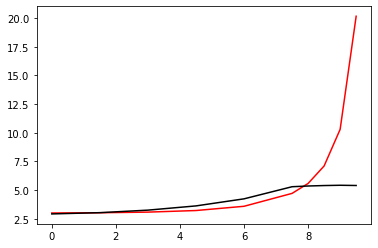

78100 0.040214552462072596
[2.96874082 3.05777999 3.26247149 3.62939508 4.27999252 5.47492568
 5.64979966 5.60299105 5.71705306 5.59451446]


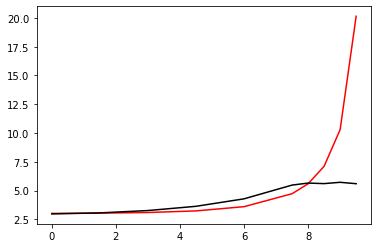

79200 0.003612193087221096
[2.88472944 2.96253839 3.14943854 3.49344967 4.11604354 5.22569557
 5.24691658 5.23994567 5.22290925 5.21855127]


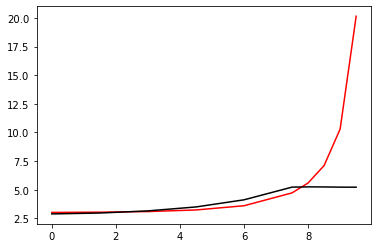

80300 0.023884319166995887
[2.89610877 2.97233162 3.15723759 3.5040669  4.13419712 5.24972651
 5.31157273 5.35330268 5.3787674  5.34639004]


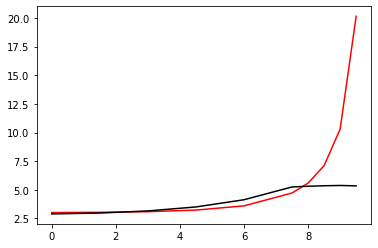

81400 0.013850438992473482
[2.89738541 2.97039444 3.15119305 3.49889608 4.13804446 5.32792763
 5.40147536 5.47011806 5.50881952 5.54817539]


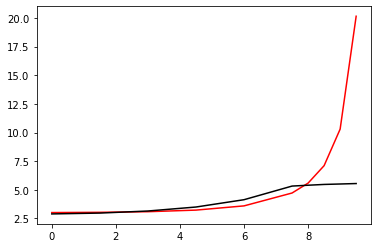

82500 0.004076409552956083
[2.89397308 2.96162615 3.13495293 3.47926386 4.13152277 5.44659536
 5.52866256 5.59394672 5.65788227 5.63934058]


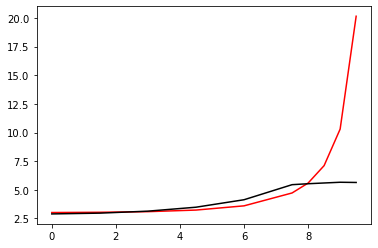

83600 0.009570861007719679
[2.96335244 3.01491286 3.16122015 3.48070783 4.13142412 5.5961422
 5.59681261 5.77560792 5.78429933 5.80509746]


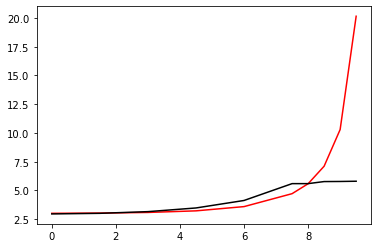

84700 0.012035124055576805
[2.9416085  3.0195659  3.18391254 3.4943368  4.0635947  4.9424068
 4.98558017 5.02524688 5.06950607 5.07169476]


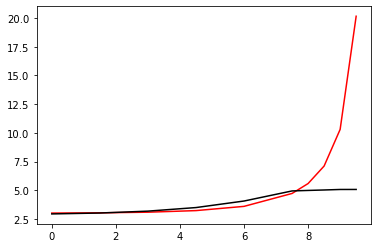

85800 0.024367098582943645
[2.95826643 3.03193205 3.19867954 3.51660195 4.10274621 5.08854929
 5.1627906  5.21385388 5.2522968  5.17879542]


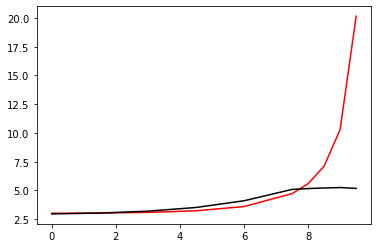

86900 0.034961801595591646
[2.87637812 2.9688269  3.1602327  3.51167423 4.15735741 5.34549734
 5.45371825 5.535595   5.5827677  5.48841395]


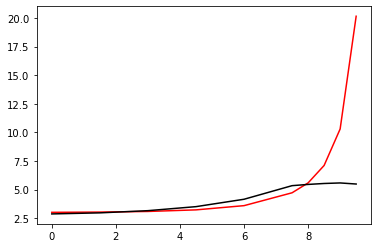

88000 0.004610652773318298
[2.86827787 2.94595953 3.13256553 3.49079773 4.16943248 5.55563772
 5.62648948 5.72390942 5.73171381 5.85226156]


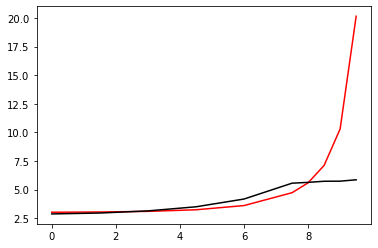

89100 0.04000942646215798
[2.96972726 3.0350978  3.20421958 3.54894004 4.23306909 5.63693051
 5.7860914  5.77842183 5.93032711 5.74634826]


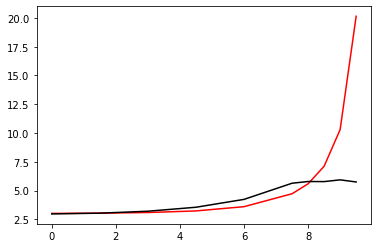

90200 0.003336498685742077
[2.93919285 3.03757279 3.21027388 3.50368639 4.0058952  4.7639929
 4.57872401 4.50239954 4.67218643 4.92459618]


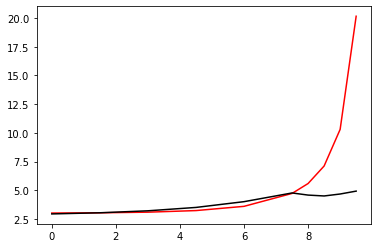

91300 0.02964416932346454
[2.94690288 3.03974228 3.21392199 3.51150698 4.02125737 4.70480602
 4.72339657 4.72503269 4.73505231 4.71020304]


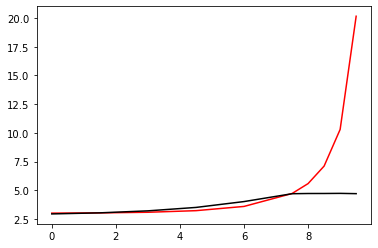

92400 0.012475297489992997
[2.96605762 3.05057681 3.22372122 3.52387885 4.0368093  4.76502966
 4.80682635 4.83801229 4.84977074 4.85291744]


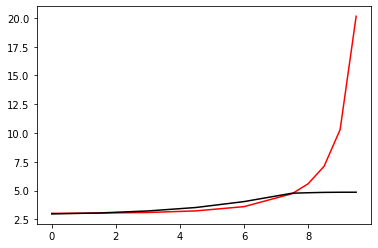

93500 0.002666774172837981
[2.98888311 3.06644125 3.23849785 3.54409937 4.06933771 4.90772904
 4.95715477 5.00060786 5.03300378 5.02287428]


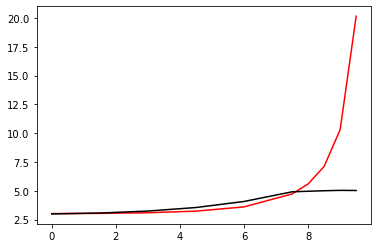

94600 0.01346169853285595
[2.90268954 2.99148391 3.18519621 3.52390209 4.10870899 5.171495
 5.22870007 5.28942523 5.3197021  5.35171028]


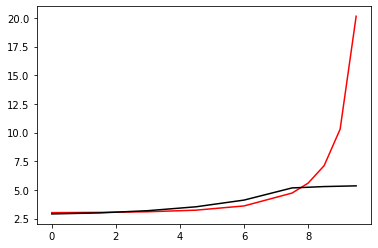

95700 0.012822173459839499
[2.9003272  2.98119905 3.16699645 3.50708534 4.12010409 5.32217734
 5.47137625 5.44991972 5.55104928 5.5094861 ]


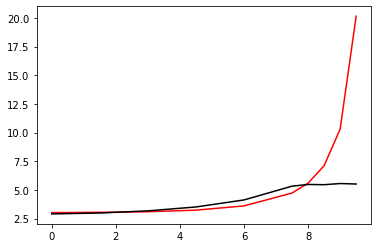

96800 0.022688998890017333
[2.99038156 3.05376325 3.22053053 3.54588075 4.1344872  5.14336248
 5.15767806 5.12477489 5.09188312 5.05396683]


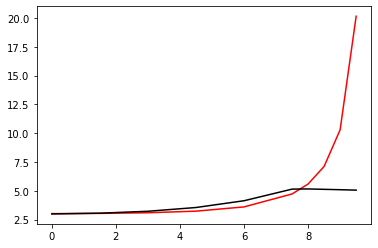

97900 0.038079519171862024
[2.9975597  3.065636   3.23596488 3.56790942 4.17380445 5.21151865
 5.27077224 5.29795183 5.30046487 5.26514009]


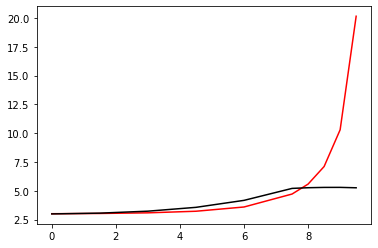

99000 0.003651066423249755
[2.9868061  3.05938755 3.23303606 3.56935712 4.18885392 5.32822095
 5.39395911 5.45500222 5.48365765 5.5056493 ]


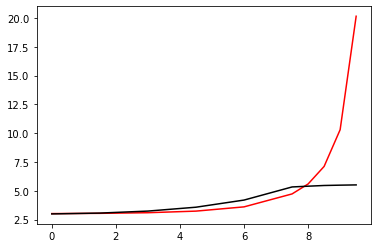

100100 0.03369081017608587
[2.8793762  2.96126454 3.1441136  3.48939699 4.13451105 5.45253243
 5.54635882 5.64037259 5.69210561 5.68080088]


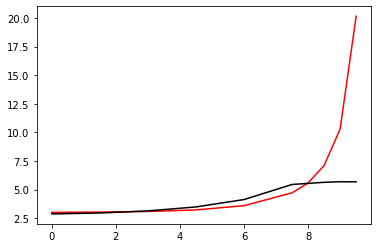

101200 0.004347086155807121
[2.92151907 2.98699783 3.15435152 3.48822647 4.13654783 5.59445294
 5.60005452 5.75004324 5.74717884 5.83096949]


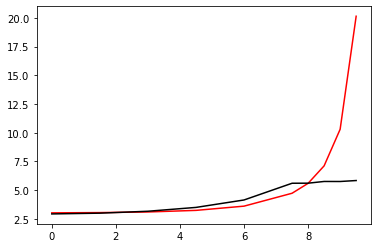

102300 0.020852392366278224
[2.89370173 2.96105218 3.13458812 3.48795705 4.20013633 5.77666604
 5.84515706 5.96325278 6.02548807 5.93119911]


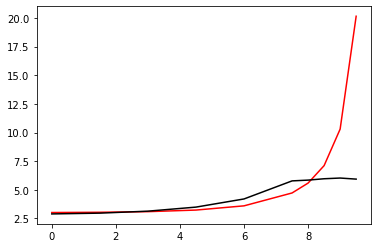

103400 0.02462768565969567
[2.82529134 2.89110129 3.05565405 3.38893209 4.05566182 5.35717026
 5.41867643 5.37266217 5.43202198 5.4931433 ]


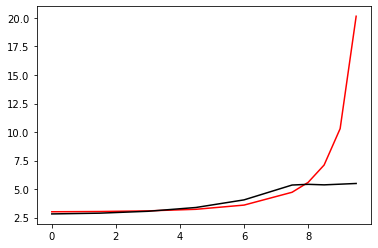

104500 0.003647241693218759
[2.90528189 2.96045533 3.11453121 3.43774699 4.08938472 5.3531714
 5.40892512 5.44033919 5.45344992 5.45650279]


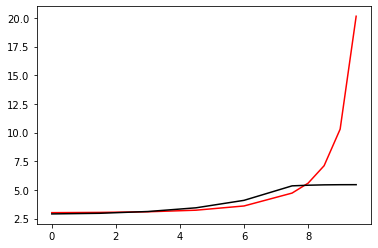

105600 0.013644372908421534
[2.91755772 2.97368603 3.12655577 3.44797723 4.09374828 5.35906805
 5.4297953  5.48489055 5.52017198 5.52241621]


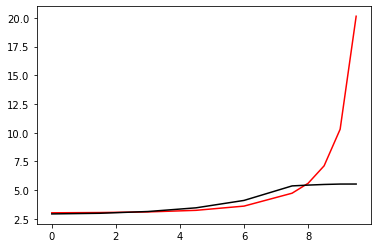

106700 0.012099790043390969
[2.92987708 2.98790197 3.14144473 3.46320904 4.10806747 5.42229814
 5.49965401 5.56815277 5.61731834 5.58815661]


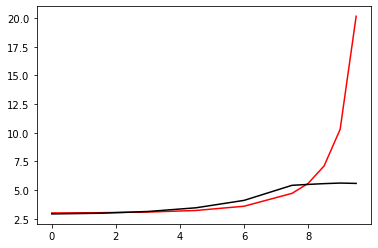

107800 0.01789237597989186
[2.99553656 3.05264948 3.20634524 3.53129118 4.1896929  5.60329033
 5.68741216 5.77259801 5.80684799 5.73564134]


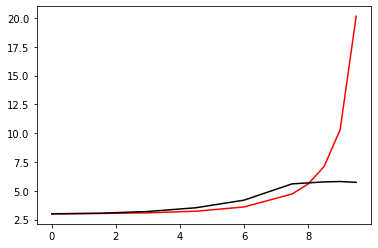

108900 0.043202159883059824
[2.90283259 2.92450452 3.04103681 3.32011673 3.91125346 5.23129627
 5.25406819 5.25384891 5.27841672 5.28671135]


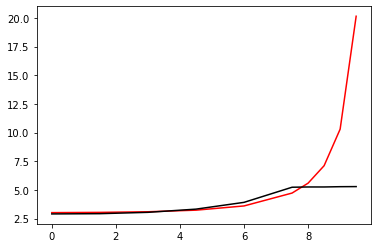

110000 0.00318053039511807
[2.9446852  2.97208456 3.087946   3.3671447  3.96144297 5.2488746
 5.31650642 5.36360854 5.3828067  5.38673526]


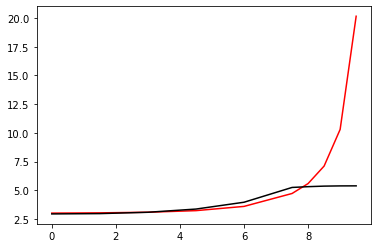

111100 0.03319782672484244
[2.93651479 2.97510167 3.09726181 3.38267291 3.98986588 5.31356469
 5.39823453 5.47310541 5.52482457 5.50483595]


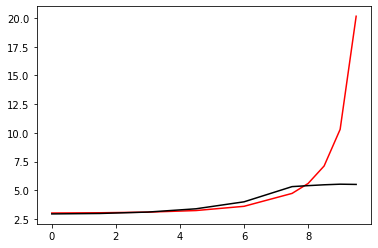

112200 0.0037382814895395963
[2.92850013 2.97717174 3.11013753 3.40589524 4.03290993 5.44331773
 5.5298068  5.61484898 5.66426385 5.72211052]


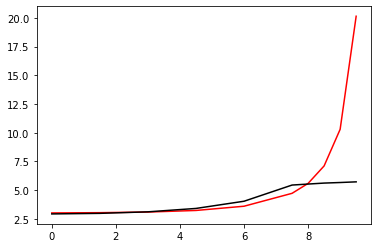

113300 0.08227533204290165
[2.82172447 2.90127588 3.06265805 3.38447089 4.04824254 5.55301725
 5.6698692  5.75714286 5.86136971 5.74092234]


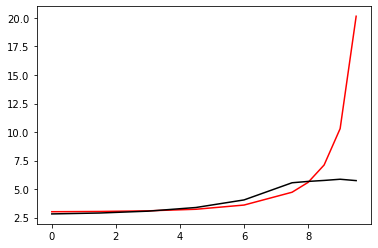

114400 0.012582874284342706
[2.98189159 3.07516723 3.24635923 3.54765373 4.10120401 4.9722832
 5.02396513 5.07327814 5.11089452 5.11011953]


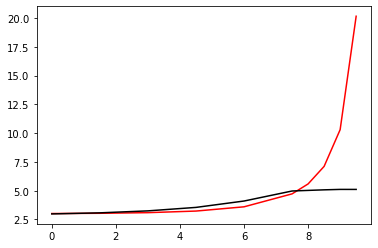

115500 0.003250296102405256
[2.98540527 3.07373238 3.25158142 3.56637953 4.1435808  5.1813707
 5.23898826 5.28042992 5.30093785 5.30713085]


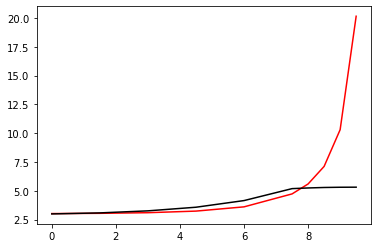

116600 0.006275579482525059
[2.95299007 3.03801627 3.22150856 3.55241916 4.16344907 5.42961189
 5.4028859  5.57099951 5.57100352 5.58350165]


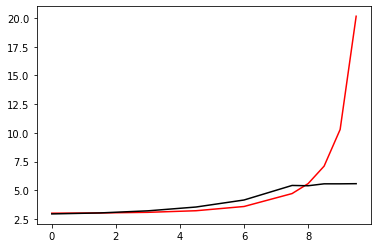

117700 0.01241846219175367
[2.8997405  2.9787921  3.16087481 3.49885698 4.13401312 5.48862527
 5.63324384 5.63542503 5.73474472 5.69315043]


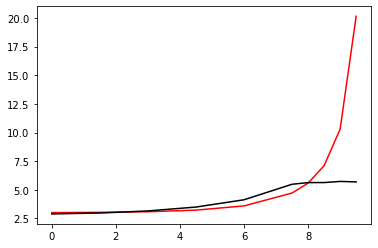

118800 0.019209539394804562
[2.98798008 3.07064351 3.25068981 3.58235612 4.19896124 5.44252739
 5.52306243 5.59921196 5.58993366 5.50944576]


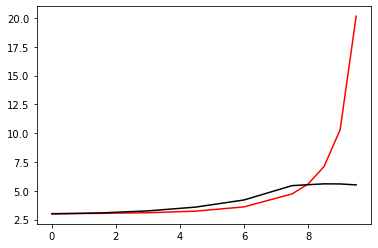

119900 0.0328980290557043
[2.91029349 2.99851661 3.19100192 3.54692582 4.21836325 5.60387702
 5.71121037 5.80200619 5.82134807 5.66003631]


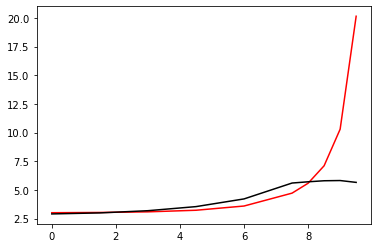

121000 0.08353112749266188
[3.02868664 3.131256   3.32953488 3.68588216 4.34057306 5.42970878
 5.24526059 5.3039683  5.3284029  5.74949013]


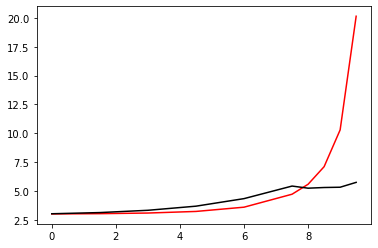

122100 0.033522087884590455
[2.88207768 2.97762111 3.17029434 3.50897864 4.10309187 5.07661398
 5.14282149 5.20895987 5.24806224 5.25342371]


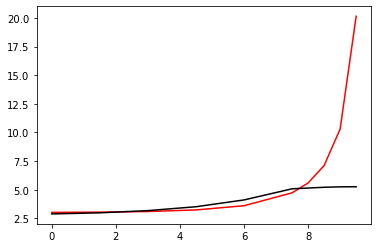

123200 0.0036871073755453533
[2.88664437 2.97294359 3.16340021 3.50625371 4.11606034 5.22683742
 5.29128242 5.34995778 5.38759097 5.39516007]


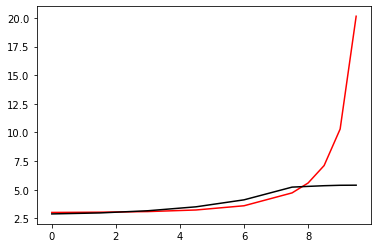

124300 0.02253126268468288
[2.88568872 2.96352913 3.15019461 3.50288002 4.15681827 5.44205278
 5.54062014 5.59009686 5.64624559 5.57491005]


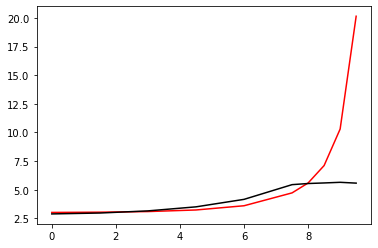

125400 0.014578422499008769
[2.89600093 2.9609951  3.12993961 3.46990823 4.1325607  5.60568451
 5.59606679 5.78316662 5.74481971 5.84552936]


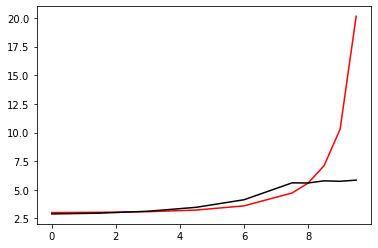

126500 0.0030937990126742084
[2.96744303 3.02468424 3.17419422 3.47736383 4.06341604 5.19474544
 5.14160038 5.1017303  5.04809002 5.05361009]


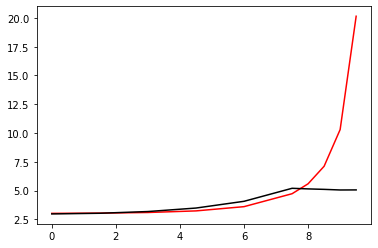

127600 0.008197742211409988
[2.989414   3.0474077  3.19790614 3.50361637 4.09533249 5.18130123
 5.20962078 5.19784137 5.17042413 5.15109905]


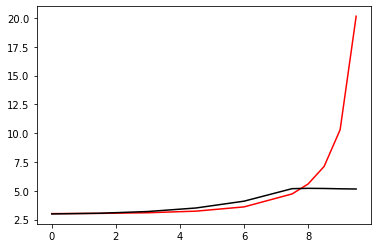

128700 0.004583775726145427
[3.01054266 3.07116893 3.2246918  3.5354778  4.13609752 5.23180418
 5.28866507 5.32041506 5.32954582 5.32487651]


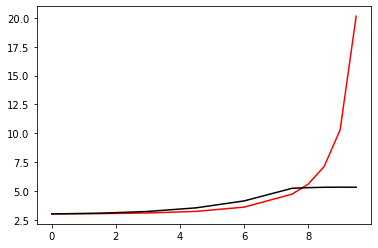

129800 0.02034924930289697
[2.99721331 3.06493923 3.2263402  3.54737757 4.16628063 5.34796962
 5.42855477 5.49046451 5.5262063  5.50727763]


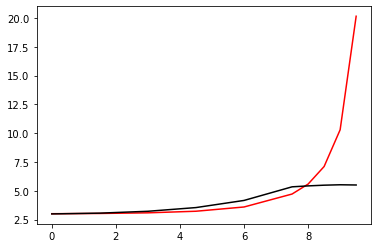

130900 0.03602142064872383
[2.98307184 3.05821336 3.22973734 3.56387652 4.20913064 5.53135197
 5.61477241 5.69426131 5.71790435 5.7446589 ]


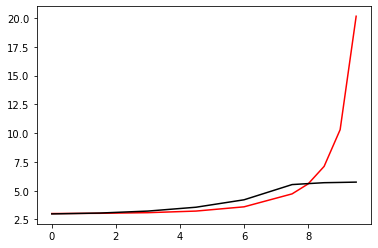

132000 0.08924083484298007
[3.03712936 3.11669873 3.29628529 3.63616084 4.28910753 5.70687513
 5.70482499 5.80242443 5.82848686 5.87499814]


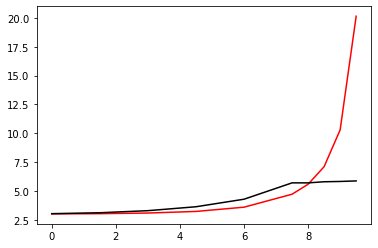

133100 0.04147462303723313
[3.00259659 3.06716913 3.22598969 3.53226551 4.11335534 5.23743331
 5.28615174 5.30615406 5.30123363 5.28631442]


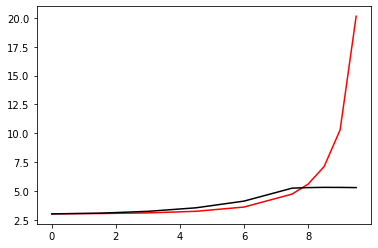

134200 0.0034411167649548006
[2.99851741 3.06700061 3.23003213 3.54505519 4.14466423 5.33545098
 5.40334589 5.46558823 5.49858832 5.52183738]


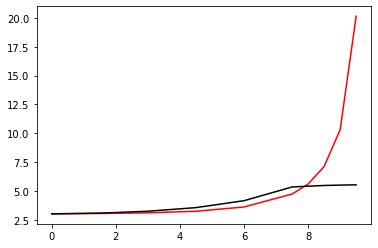

135300 0.02393300840738195
[2.94727521 3.02396892 3.19791375 3.53141407 4.17332574 5.52503868
 5.6336511  5.69911148 5.77977552 5.64850645]


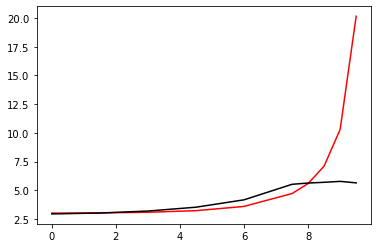

136400 0.013945577493869021
[2.88986475 2.97658667 3.16083587 3.4933866  4.11168115 5.38978662
 5.46014458 5.53017937 5.55921693 5.57683432]


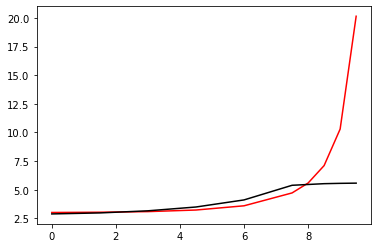

137500 0.004234367573287392
[2.88790877 2.96002308 3.13534082 3.47172748 4.11621446 5.50758115
 5.61403617 5.65906478 5.73595814 5.73002733]


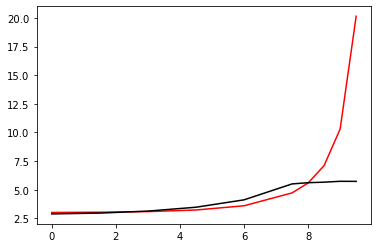

138600 0.014369264760291236
[2.9068762  2.96456902 3.11829095 3.43752947 4.08334907 5.62816148
 5.64366194 5.80768927 5.80504119 5.86688805]


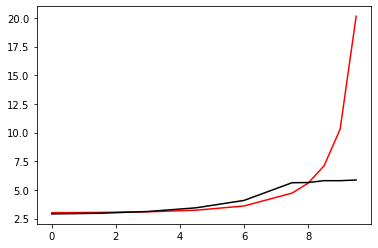

139700 0.012917628237931689
[2.92847528 2.98235258 3.12438742 3.41866478 4.00926833 5.25934224
 5.25872274 5.24456315 5.22088274 5.21665357]


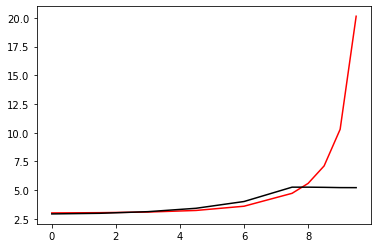

140800 0.026765485762901716
[2.92909686 2.98391541 3.12729857 3.42461027 4.02176792 5.24570343
 5.30067306 5.32687645 5.33547679 5.30760317]


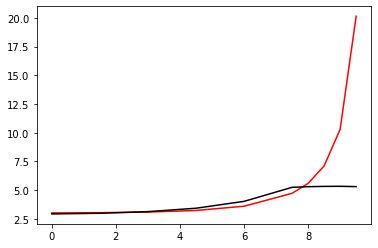

141900 0.03732736749289877
[2.92066594 2.97972374 3.12947328 3.43798937 4.05614812 5.32096232
 5.41007592 5.47578018 5.51993271 5.4686498 ]


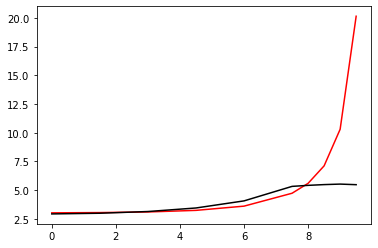

143000 0.003957248431476963
[2.91003708 2.97219838 3.12770539 3.44687259 4.08668847 5.44123778
 5.53170699 5.62148824 5.65769096 5.7665893 ]


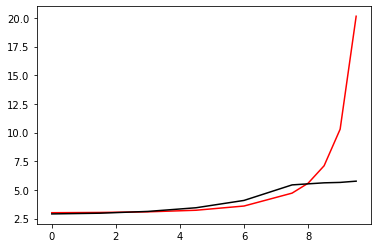

144100 0.033570807678960306
[2.9052346  2.9655406  3.12201981 3.44775523 4.11023992 5.57189899
 5.67373865 5.75009689 5.8350078  5.73064886]


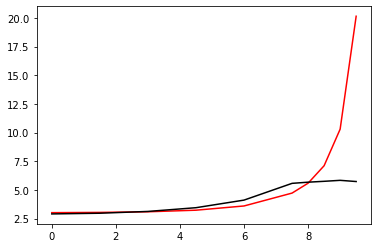

145200 0.004326772720951339
[2.92352339 2.98596552 3.13857192 3.44894811 4.08545809 5.58735388
 5.59780184 5.78052688 5.74016943 5.85901131]


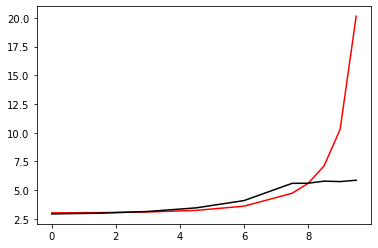

146300 0.027671595753800186
[3.00075514 3.04864288 3.17705198 3.44669258 3.9979933  5.22116397
 5.14483899 5.10791759 5.04867252 5.16443292]


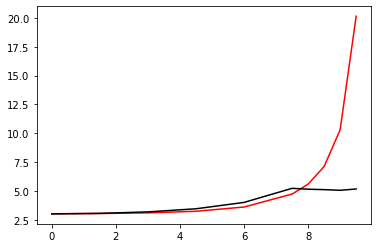

147400 0.012635128725841337
[3.0123741  3.06172969 3.19194464 3.4649717  4.0232163  5.1806613
 5.21144728 5.20303068 5.1770639  5.16972334]


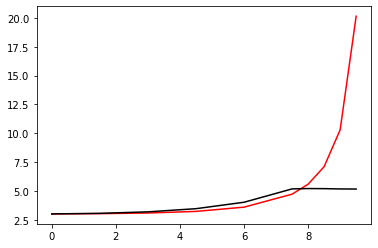

148500 0.0029219080321421964
[3.01095273 3.06536399 3.20114825 3.48142139 4.05047971 5.21064145
 5.2694701  5.31079259 5.32861155 5.33100552]


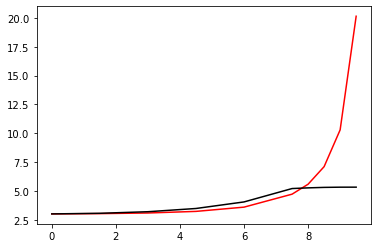

149600 0.005147821683161283
[3.00476187 3.06625566 3.21226429 3.50611527 4.09626205 5.32912076
 5.40682946 5.4702417  5.5098064  5.51378178]


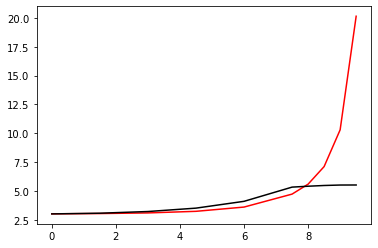

150700 0.05998497836203476
[2.7874919  2.88071092 3.05750929 3.37776625 3.9916835  5.32104819
 5.40047587 5.49765327 5.55166765 5.70124324]


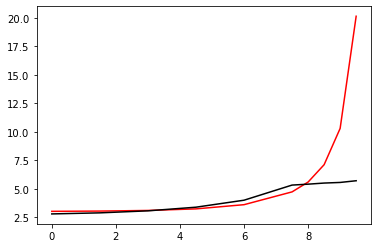

151800 0.03184111967605154
[2.9477242  2.99374945 3.12099958 3.37836616 3.8903071  4.97326163
 4.97969748 4.94597315 4.90843897 4.87756122]


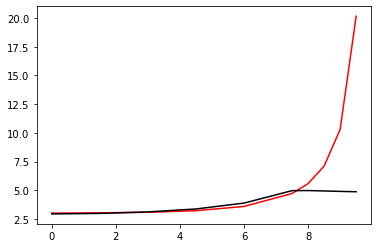

152900 0.04256776225648191
[2.93006126 2.97903304 3.10946653 3.37453276 3.90182419 4.97890717
 5.03247279 5.06124545 5.07059968 5.04616281]


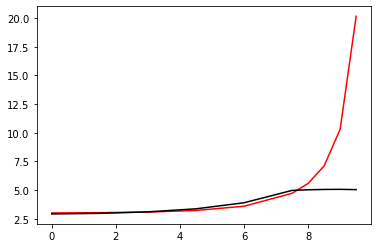

154000 0.003036117099924005
[2.92587003 2.97858827 3.11357062 3.38828325 3.93373789 5.05203578
 5.1269129  5.19409569 5.23525362 5.24350615]


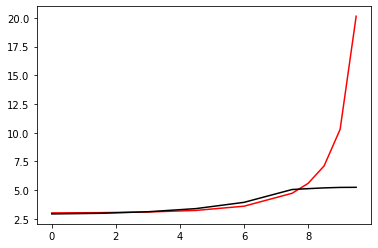

155100 0.03310554525992525
[2.91549908 2.97243845 3.11499485 3.40458349 3.97983803 5.2036394
 5.28542572 5.36176913 5.42551648 5.3884785 ]


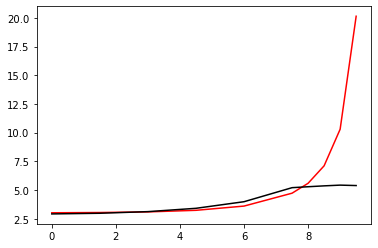

156200 0.0036308793368009904
[2.89525046 2.96540995 3.12232344 3.42687178 4.02593611 5.33456864
 5.41375825 5.48987317 5.53368125 5.57688183]


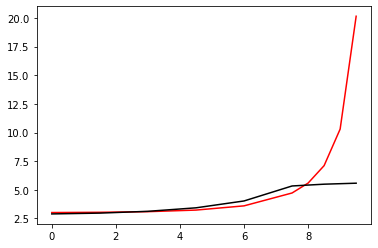

157300 0.10358184873724172
[2.73608496 2.82592266 3.01078323 3.35946056 4.03804204 5.49765236
 5.65473923 5.70075956 5.84021787 5.72254899]


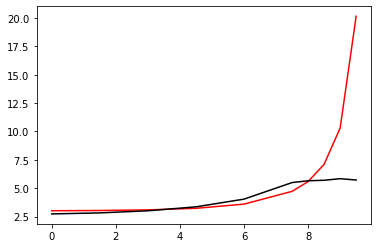

158400 0.014066988292251382
[2.89165893 2.96999205 3.14709246 3.47626168 4.10352961 5.44704113
 5.55575052 5.60810784 5.65132737 5.6797357 ]


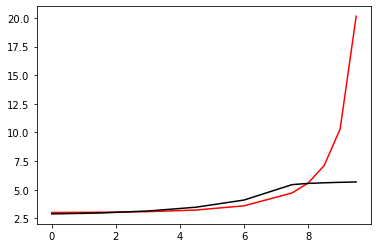

159500 0.004498627992787785
[2.89780215 2.95977683 3.11852129 3.43996252 4.08302382 5.62297622
 5.58987727 5.78375756 5.76901758 5.80424169]


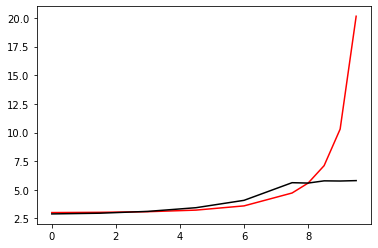

160600 0.01401549117637708
[2.89658294 2.95858805 3.1093197  3.40328174 3.97187051 5.16080288
 5.15009334 5.10174509 5.11591232 5.12409326]


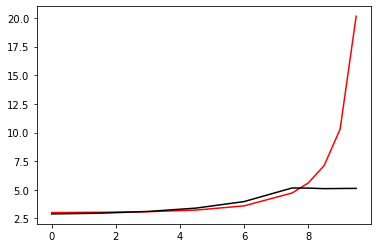

161700 0.012882102453371529
[2.91257344 2.97401805 3.12430832 3.41866576 3.98833138 5.13292255
 5.17219305 5.18347501 5.18158507 5.18013335]


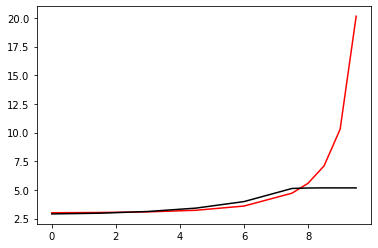

162800 0.027156236597293347
[2.92323772 2.98449497 3.1358139  3.43456216 4.01363298 5.16789945
 5.23453821 5.28601078 5.31563065 5.27380886]


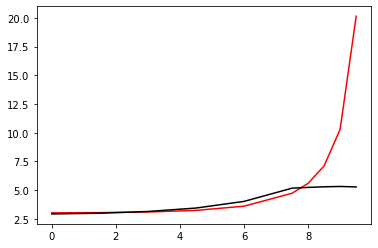

163900 0.03692499279049226
[2.90913461 2.97501389 3.13496308 3.45155327 4.06625492 5.31631986
 5.41209047 5.49926915 5.54897104 5.46873553]


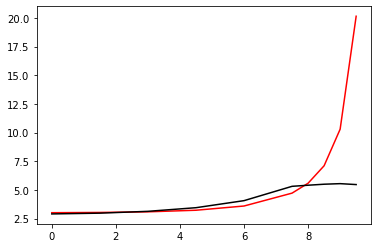

165000 0.0040688394731214295
[2.9111873  2.9769956  3.13989934 3.46716068 4.1106403  5.48201535
 5.57203843 5.65744733 5.69139353 5.78342348]


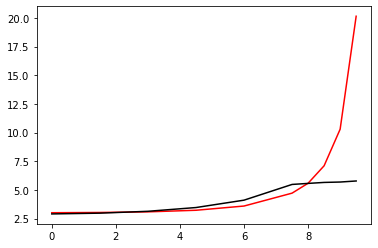

166100 0.03354373478459607
[2.88441665 2.96203626 3.12824642 3.44444128 4.06038309 5.41556447
 5.49142341 5.55444284 5.60046288 5.62553007]


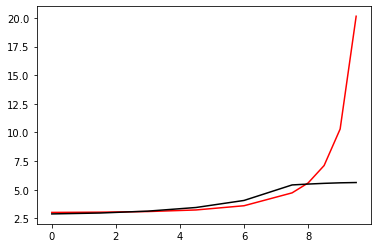

167200 0.0040637614642494695
[2.90173802 2.96539099 3.12268364 3.43481669 4.0553236  5.48318456
 5.47537626 5.64921833 5.64969821 5.69219092]


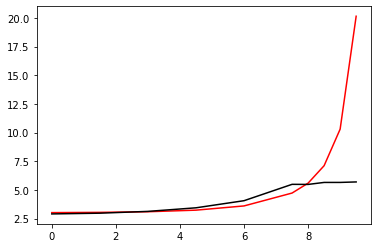

168300 0.028421028961282284
[2.97511231 3.0499061  3.20354186 3.49006719 4.0219638  5.00264735
 4.95286096 4.91571752 4.91693792 5.04015652]


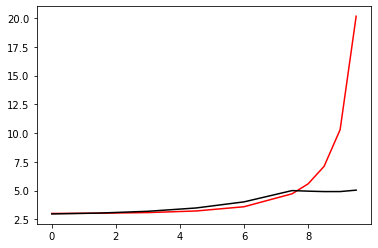

169400 0.012574468971240803
[2.99094622 3.06341683 3.2191907  3.51047372 4.05308687 5.00228004
 5.0446662  5.06339771 5.05593626 5.04693193]


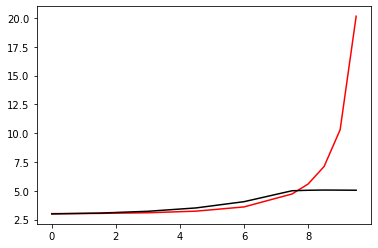

170500 0.003025590069938586
[2.97680166 3.05274097 3.21758507 3.5222069  4.08745324 5.12592457
 5.18226652 5.22976477 5.2548392  5.26009867]


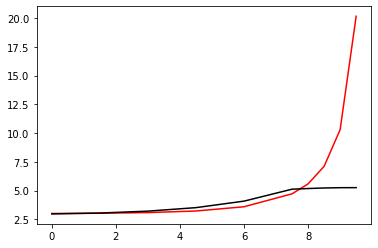

171600 0.005095083298598584
[2.98680878 3.06476205 3.23874408 3.56108877 4.16192552 5.34405562
 5.40932539 5.46840663 5.49844441 5.48471429]


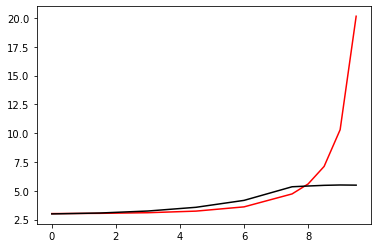

172700 0.008224070077145438
[2.94106383 3.01471367 3.18951433 3.52263323 4.1581177  5.44282295
 5.66187066 5.58834802 5.73895411 5.64971319]


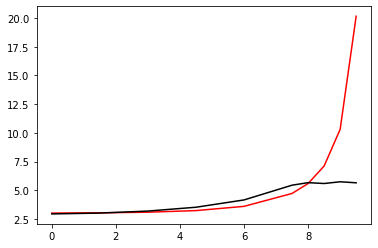

173800 0.018358603340672568
[2.95483472 3.03355589 3.2146011  3.5551405  4.20568784 5.55470282
 5.6088481  5.71995203 5.74114288 5.68170063]


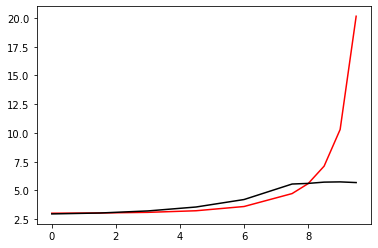

174900 0.04081127450779025
[3.00830871 3.08706787 3.25630797 3.57003553 4.13972526 5.1140201
 5.03608749 4.99780343 4.92903569 5.05448325]


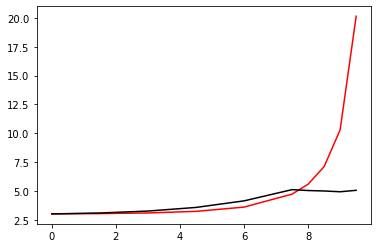

176000 0.0032260445886883055
[2.9921015  3.07260579 3.24565574 3.56459334 4.1434859  5.08923543
 5.12354597 5.1234648  5.09380115 5.07914375]


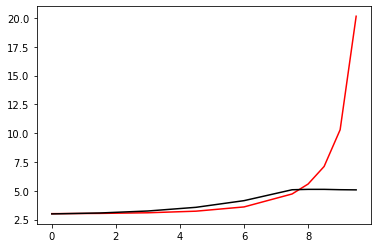

177100 0.04148097225901003
[2.98958697 3.07014982 3.24709457 3.5738421  4.16940812 5.20199309
 5.25776902 5.28669215 5.2952219  5.27873892]


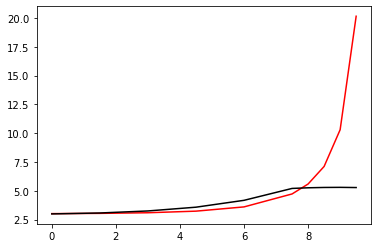

178200 0.0036878119006173537
[2.98753751 3.06635771 3.24565439 3.57984808 4.19537676 5.37181013
 5.41878488 5.49104397 5.50828108 5.55899141]


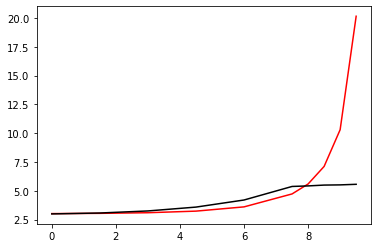

179300 0.023965443809363447
[2.9014148  2.99284005 3.17803085 3.50415684 4.08470144 5.21603977
 5.3382487  5.36871896 5.43700709 5.36769293]


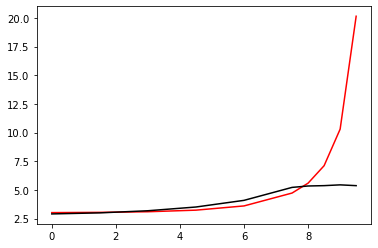

180400 0.01408385168952812
[2.89370504 2.9682172  3.14463046 3.47809112 4.11058309 5.46412326
 5.52863956 5.62616045 5.64261436 5.70365921]


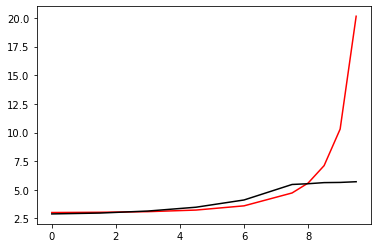

181500 0.0045148834190631955
[2.8965687  2.95828065 3.11740018 3.44072508 4.08708653 5.50855948
 5.71477127 5.66831458 5.8224     5.78645483]


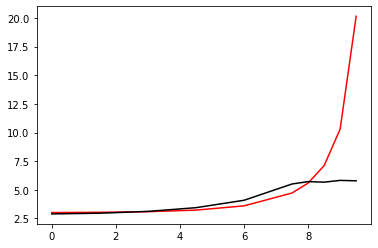

182600 0.014020065814511772
[2.91249494 2.97048169 3.11801064 3.41952499 4.03769249 5.53377635
 5.63664879 5.71727434 5.76606894 5.80005752]


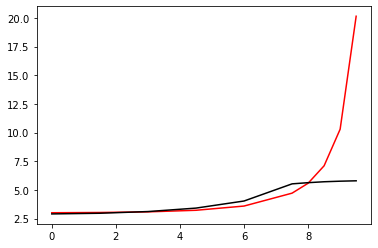

183700 0.004580767390872195
[3.0119676  3.07818976 3.23264772 3.53384471 4.10961545 5.23811089
 5.28396864 5.29845275 5.30649314 5.28058621]


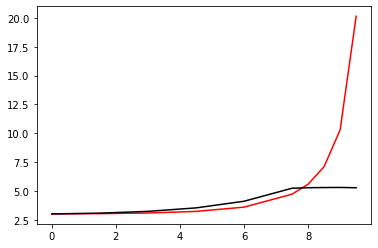

184800 0.020637702971520275
[2.99498079 3.06686935 3.22993517 3.54431332 4.14782711 5.33719957
 5.41045715 5.45731389 5.48191785 5.43961973]


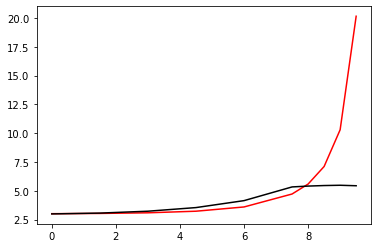

185900 0.03609637048012739
[2.98623129 3.06320103 3.23614333 3.56765787 4.20790689 5.51659824
 5.59241852 5.65825586 5.67894503 5.69486353]


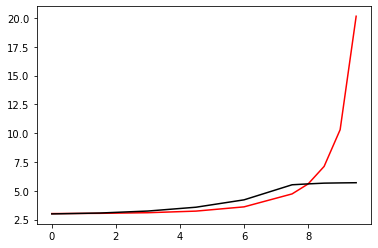

187000 0.005355795260394919
[2.86523017 2.97592842 3.16755186 3.48447607 4.03681029 4.95126187
 4.68254645 4.71403695 4.81911532 4.97734197]


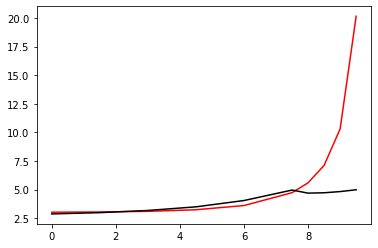

188100 0.033220568422672576
[2.87454004 2.97818698 3.17004386 3.49024742 4.04630729 4.85373618
 4.86625154 4.86107191 4.87041125 4.86938763]


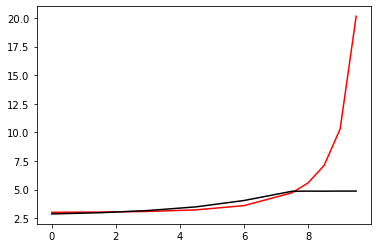

189200 0.0030952422207997108
[2.87972408 2.97409704 3.16487872 3.48975193 4.05102062 4.89397716
 4.94110518 4.97872637 4.99814374 4.99988828]


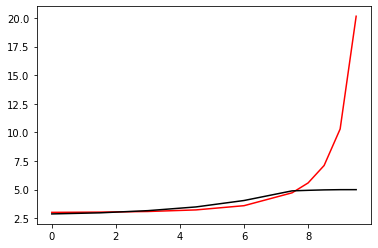

190300 0.025027746201826812
[2.89736844 2.98465627 3.1767003  3.51570319 4.10459755 5.07029977
 5.14433926 5.19519811 5.23901585 5.14174441]


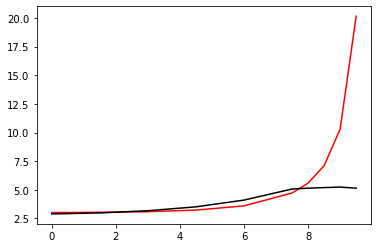

191400 0.013738989745566055
[2.89963554 2.97762625 3.16383924 3.51014532 4.12887708 5.26901196
 5.33433382 5.40632531 5.42859402 5.50097163]


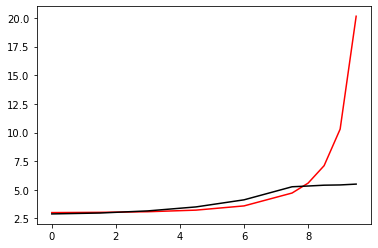

192500 0.28840402382917607
[2.69240742 2.76321532 2.9314636  3.25340623 3.83747647 4.95782717
 4.9177522  4.96836629 4.98142694 5.44044431]


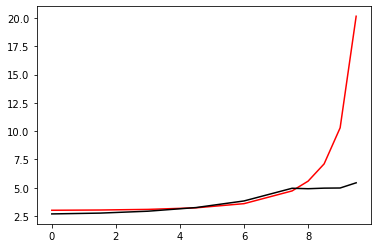

193600 0.01307172692724188
[2.92259602 2.98397523 3.13649042 3.42948264 3.95674951 4.8883395
 4.90460292 4.89172954 4.87614594 4.86902425]


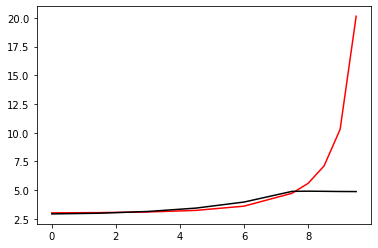

194700 0.012475073275097087
[2.92746694 2.98878248 3.14109147 3.4356083  3.97019145 4.91016674
 4.95635934 4.98699257 5.00015347 5.00092383]


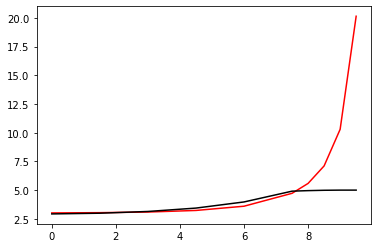

195800 0.028362332177796587
[2.92927649 2.99167281 3.14717931 3.45121276 4.01229112 5.04271235
 5.11480469 5.17188459 5.21480632 5.14004021]


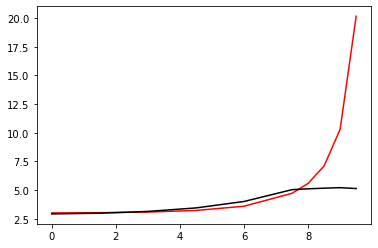

196900 0.03751702875984531
[2.98680362 3.05267132 3.21624016 3.53942628 4.14789992 5.32725597
 5.40767036 5.47641576 5.49886507 5.48181608]


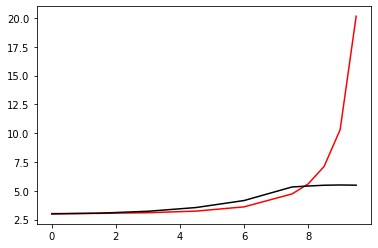

198000 0.0030870390536193444
[2.96868039 3.07133536 3.25845895 3.58024052 4.13219629 4.94102276
 4.95014145 4.91638    4.94328421 4.9372968 ]


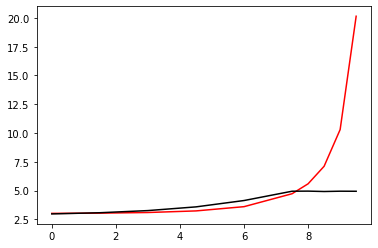

199100 0.04213900724832351
[2.94342053 3.04711555 3.24653925 3.58615623 4.17269083 5.08682891
 5.13101455 5.14767286 5.13998816 5.12949363]


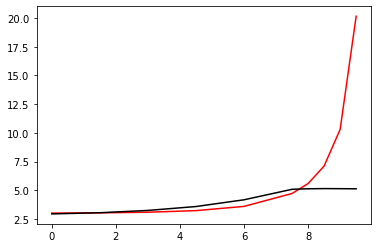

200200 0.004032562224307191
[2.87099987 2.97352096 3.18371758 3.54397928 4.17033467 5.28279385
 5.34302706 5.39543105 5.41483537 5.43260008]


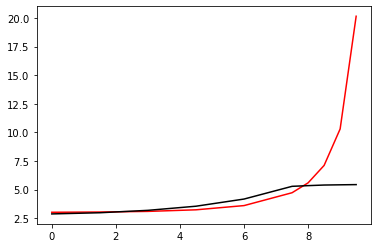

201300 0.02200451367198774
[2.87302492 2.95278866 3.1466652  3.51183472 4.18913488 5.51021131
 5.62195063 5.65111903 5.71219063 5.62655676]


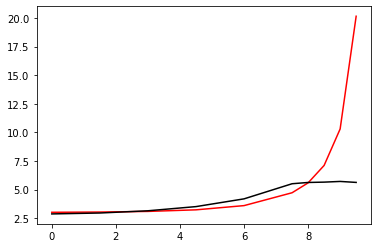

202400 0.2966198584192758
[3.14643482 3.17442013 3.30376014 3.60288791 4.21827855 5.47106187
 5.52018334 5.45800412 5.51608007 5.81634683]


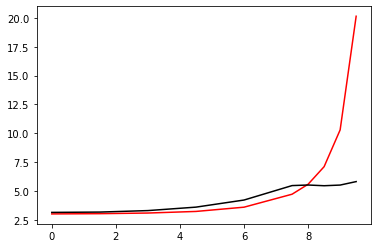

203500 0.00231545046794861
[3.02131752 3.03722077 3.14292873 3.40446299 3.94585352 4.97487454
 4.98955495 4.96480842 4.93860944 4.93295968]


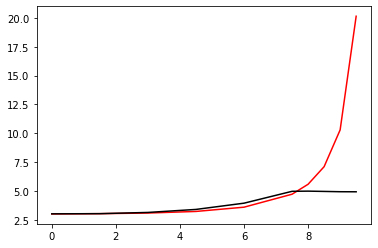

204600 0.00888965336342909
[3.04456276 3.07315145 3.18503035 3.45401942 4.00975297 5.04384843
 5.09464482 5.12378028 5.12825718 5.07846922]


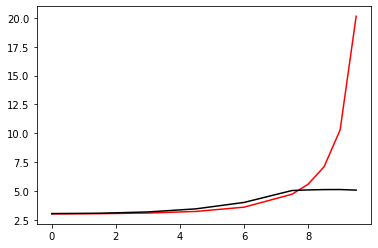

205700 0.012529328410501823
[2.94134886 2.99782189 3.13485847 3.42094393 3.98939643 5.08744483
 5.15035998 5.20357931 5.239069   5.2418334 ]


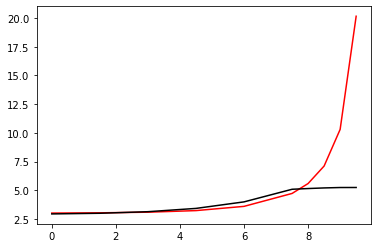

206800 0.021986704636558427
[2.96433626 3.0222044  3.16917788 3.47296083 4.08019297 5.32488461
 5.40535414 5.47524844 5.5115588  5.43213798]


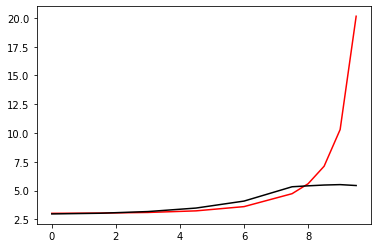

207900 0.03635144252883491
[3.00529259 3.0642245  3.21762785 3.53975662 4.1952852  5.59308855
 5.70649366 5.74470276 5.7783897  5.77412448]


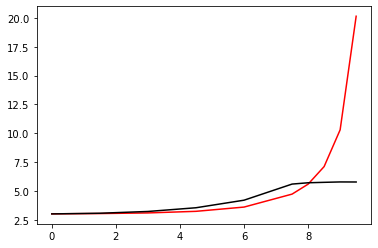

209000 0.3658737516591178
[2.71173529 2.76701352 2.91386305 3.22201363 3.85098815 5.25033775
 5.2462113  5.34233711 5.34509481 5.57451984]


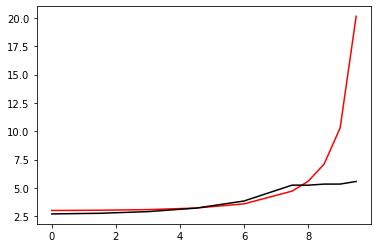

210100 0.041851982704303695
[2.99548852 3.06460755 3.2169785  3.51235088 4.07677689 5.07648556
 5.1120065  5.11751704 5.09551173 5.08450415]


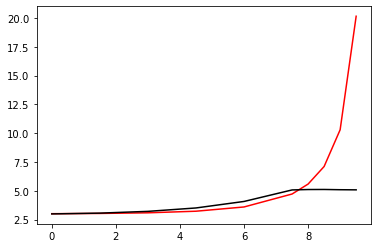

211200 0.003177237039305173
[2.96794414 3.0452256  3.20991346 3.52002224 4.10676952 5.18305679
 5.23806657 5.28154965 5.2979288  5.30069884]


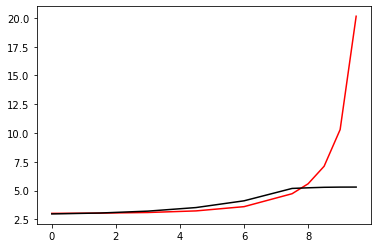

212300 0.022854701438569668
[2.88817542 2.97294016 3.15515019 3.49130104 4.12696055 5.40161154
 5.49925286 5.54578007 5.59853422 5.53067565]


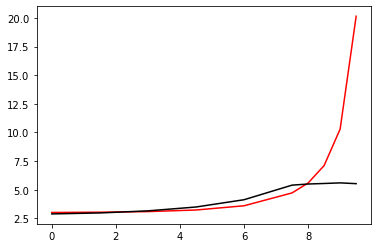

213400 0.0144566854581903
[2.88384749 2.95491288 3.13013095 3.47204    4.13650865 5.58887718
 5.62305705 5.75208557 5.75831489 5.82784324]


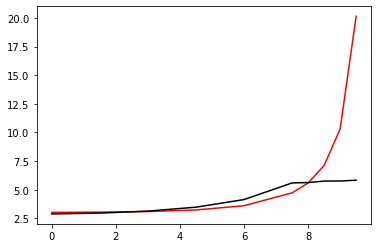

214500 0.004366025216165461
[2.89724317 2.95559426 3.11103886 3.43389675 4.08678751 5.58318728
 5.72022828 5.74930163 5.85413414 5.84515745]


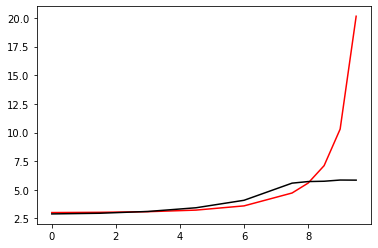

215600 0.013425144721684972
[2.91907869 2.96483861 3.09903195 3.38698568 3.97343341 5.18994679
 5.21321771 5.20358092 5.19322586 5.18577801]


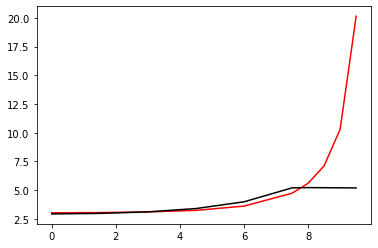

216700 0.012744690508970553
[2.93687497 2.98576913 3.12107168 3.41014622 3.99709853 5.18593112
 5.24524758 5.28826376 5.30976887 5.30903951]


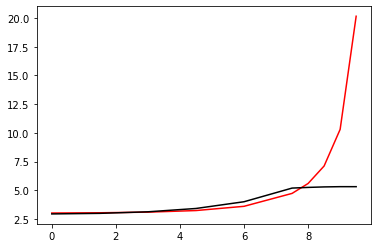

217800 0.025680525275811
[2.94429699 2.99702498 3.1376896  3.43622982 4.04312812 5.30608555
 5.39483222 5.45529944 5.50457216 5.44246597]


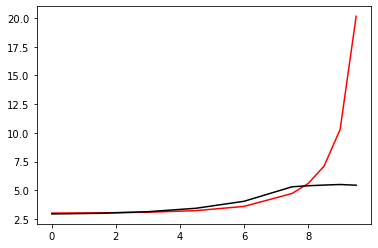

218900 0.036578722499853514
[2.96435393 3.02384896 3.17695612 3.49791179 4.1521184  5.55843788
 5.65481167 5.72783954 5.761309   5.72379797]


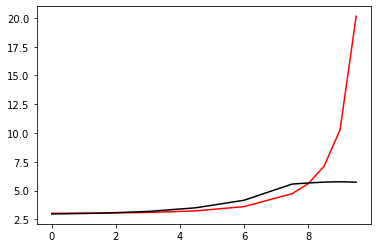

220000 0.004519034608715365
[2.90170106 2.9718623  3.13156359 3.4535099  4.11090041 5.64448703
 5.6426847  5.81556797 5.80622853 5.86660721]


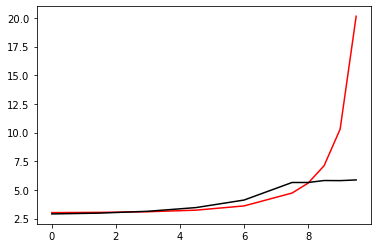

221100 0.044324366046308974
[2.86356922 2.91255629 3.04482017 3.32578495 3.90875    5.23432072
 5.22194866 5.27524221 5.2949785  5.42237054]


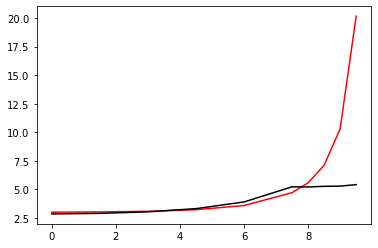

222200 0.0030556689281991158
[2.9429718  2.98045332 3.10122339 3.37440359 3.95301421 5.22575485
 5.29453892 5.34765533 5.37534109 5.3793219 ]


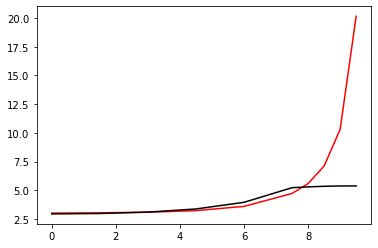

223300 0.023634186077254097
[2.9385806  2.98591823 3.11659349 3.40425493 4.00914366 5.33813406
 5.4259472  5.49504933 5.54781971 5.50187019]


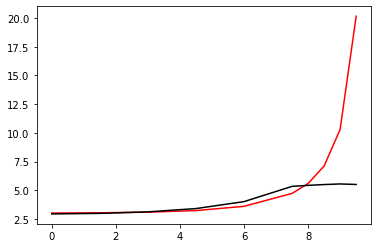

224400 0.013810850947691583
[2.92598835 2.97826759 3.11754519 3.41761939 4.04684808 5.46481903
 5.54875556 5.63500875 5.67444979 5.74048219]


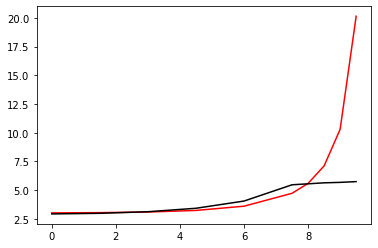

225500 0.004121018025410003
[2.9524345  3.00841164 3.15573356 3.4653802  4.10986479 5.58194536
 5.69616061 5.72641866 5.82959041 5.79642879]


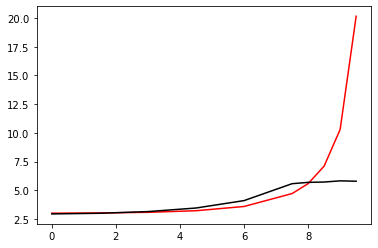

226600 0.012864260383090976
[2.94824621 2.9937059  3.11998784 3.38588894 3.93029052 5.11816001
 5.15051686 5.14998845 5.13853923 5.13538741]


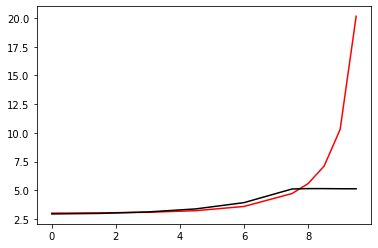

227700 0.012565536684062982
[2.94712156 2.99547599 3.12449152 3.3958679  3.95111639 5.13729593
 5.19989333 5.24738245 5.27383775 5.27435934]


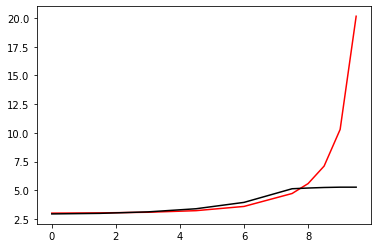

228800 0.025980818868928696
[2.9507243  3.00286982 3.1390039  3.4247659  4.01009987 5.27813069
 5.3643242  5.43117083 5.4808041  5.41310352]


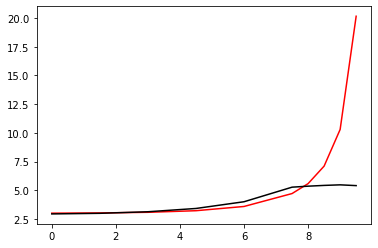

229900 0.036380916729542
[2.99372194 3.05146925 3.19962968 3.50934328 4.14370408 5.53819843
 5.62753042 5.70153598 5.72782949 5.7196107 ]


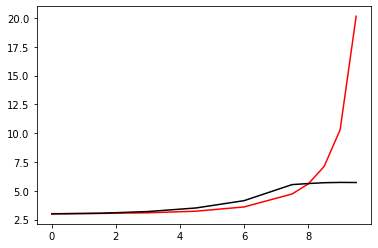

231000 0.004487524749069284
[2.92010413 2.99233501 3.15542053 3.47682028 4.12349508 5.62361968
 5.62302488 5.80001934 5.75272582 5.87296351]


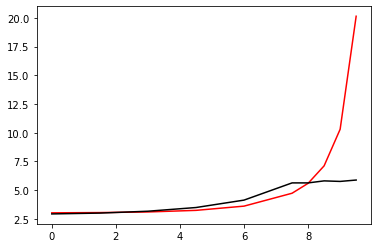

232100 0.047177808575170656
[2.84744842 2.90258329 3.04229379 3.33076208 3.91892085 5.26059297
 5.24581788 5.29246743 5.30314686 5.43985831]


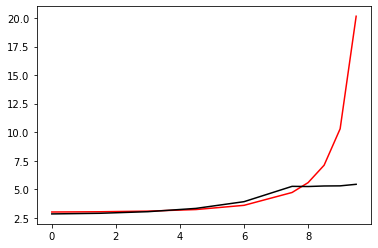

233200 0.003020651185986655
[3.00163226 3.04010001 3.16335812 3.43878414 4.01541835 5.27839185
 5.34123459 5.38350704 5.40150851 5.40276198]


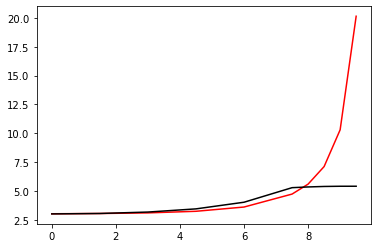

234300 0.023209628110518764
[2.92555915 2.98339204 3.12685109 3.42676583 4.04215629 5.38005898
 5.47038763 5.54754462 5.60454678 5.56885379]


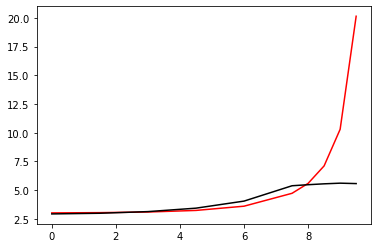

235400 0.013947865913424052
[2.91778328 2.97471999 3.12235409 3.43129306 4.06690535 5.49327861
 5.57847561 5.6661154  5.70712311 5.77385021]


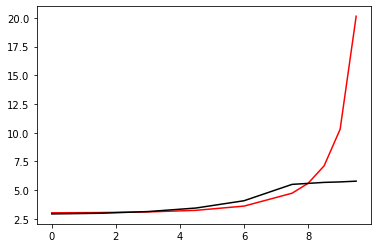

236500 0.004132976208630727
[2.90781436 2.96735499 3.11832866 3.42835338 4.06591553 5.52702646
 5.64289817 5.67430784 5.79167403 5.73386203]


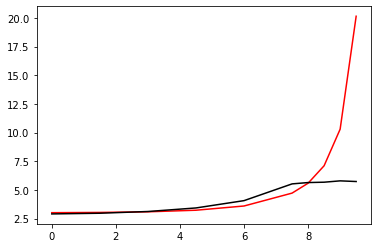

237600 0.013197613102897217
[2.93492645 2.97607    3.09754188 3.36149834 3.91175706 5.11219034
 5.15195105 5.16802308 5.18558369 5.17616606]


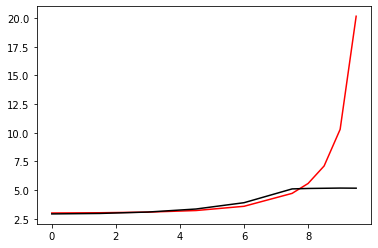

238700 0.012368173870096168
[2.95810731 3.00582737 3.13205594 3.40074048 3.9555761  5.15118696
 5.21802671 5.27337343 5.30872039 5.30984534]


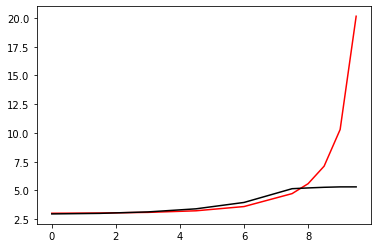

239800 0.03421772782294554
[3.03324966 3.08929185 3.22972098 3.52106715 4.11353757 5.39508311
 5.49435364 5.55337012 5.61169348 5.48660683]


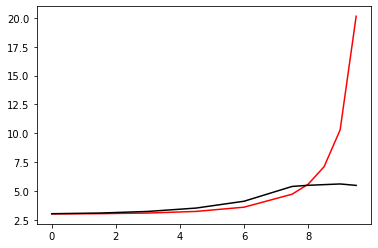

240900 0.04304822376276926
[2.98185469 3.07055629 3.23778989 3.53801844 4.07993737 4.8078099
 4.85304306 4.8581234  4.88825719 4.85490482]


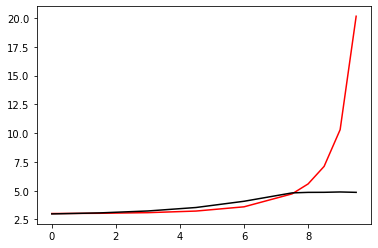

242000 0.0030462215185710117
[2.9892695  3.07711015 3.2514644  3.56295277 4.12107923 4.95021541
 4.9994949  5.03573174 5.0414163  5.04960005]


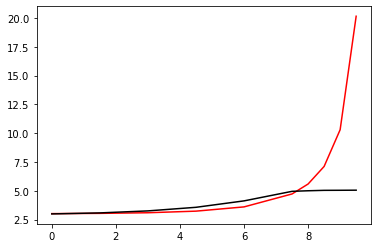

243100 0.04186137082364693
[2.95186816 3.04489064 3.2328709  3.56383856 4.1522315  5.14933196
 5.21207146 5.25768852 5.29110282 5.24821756]


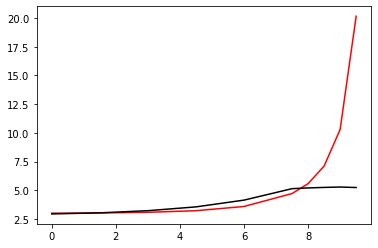

244200 0.0038096223382568625
[2.97566421 3.06282398 3.25405562 3.59727812 4.2128235  5.37023331
 5.42342078 5.49402402 5.51461174 5.56890185]


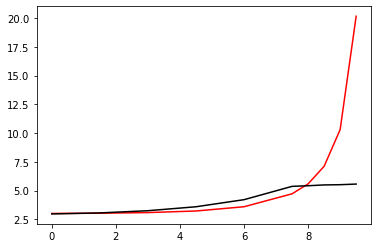

245300 0.032936794888125835
[2.89420894 2.95466129 3.10950705 3.39705545 3.91125611 4.86943942
 4.84908618 4.80513381 4.77023675 4.75620994]


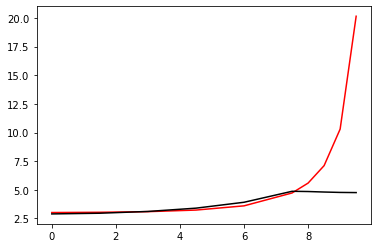

246400 0.012509473644538995
[2.91651301 2.97801031 3.1328336  3.4226956  3.94278141 4.87313429
 4.89930369 4.89522267 4.8786593  4.88131991]


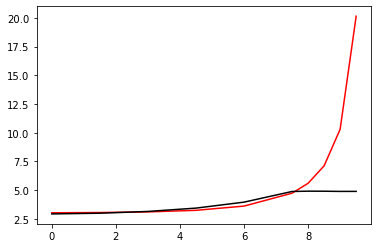

247500 0.0026173006841647343
[2.92371851 2.98588136 3.14049357 3.43373736 3.96353474 4.90827068
 4.95833331 4.99409263 5.01403379 4.98436074]


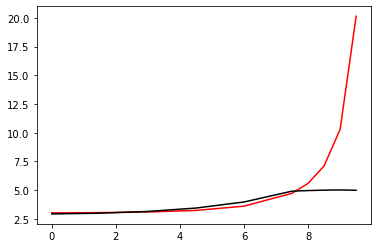

248600 0.01291140857943972
[2.93117046 2.99369719 3.14840195 3.44619079 3.99078583 5.00310794
 5.06433549 5.12107218 5.14850981 5.23113283]


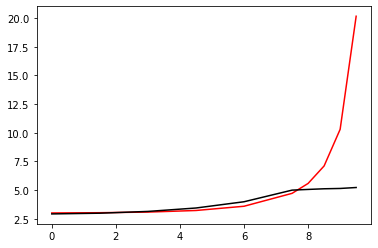

249700 0.011492621979518884
[2.95190622 3.01505946 3.17132093 3.47612968 4.04518912 5.17155116
 5.23904231 5.29589643 5.34001712 5.31884705]


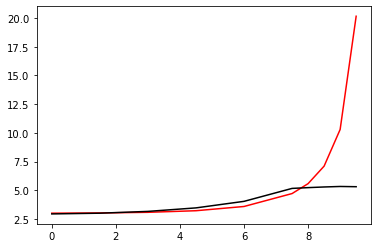

250800 0.05694972830652391
[3.04922094 3.11025573 3.26944171 3.59067021 4.21188092 5.49977526
 5.57582588 5.654683   5.68382885 5.54454002]


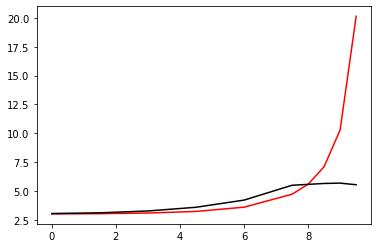

251900 0.042452887144780176
[2.9239983  2.96006489 3.08789791 3.36650584 3.91532754 4.95027612
 4.94569118 4.90488133 4.88012344 4.85374294]


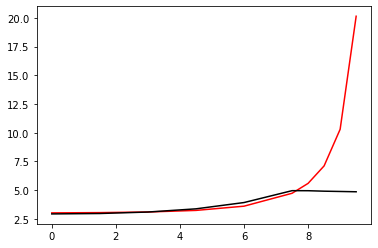

253000 0.0029654563104483016
[2.93235888 2.97616214 3.10801851 3.39256058 3.95205314 4.97375061
 5.02736279 5.06176527 5.0720488  5.07160803]


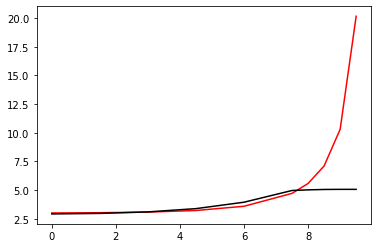

254100 0.032938655968251816
[2.91969633 2.97077006 3.10889847 3.4017116  3.97723339 5.07193573
 5.14519849 5.21360077 5.26252019 5.25012919]


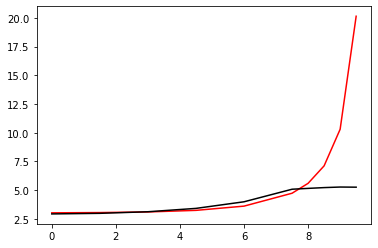

255200 0.0036468127262043156
[2.87395961 2.93178873 3.0826474  3.39601539 4.01449463 5.27547962
 5.35972355 5.45213354 5.49637151 5.57863138]


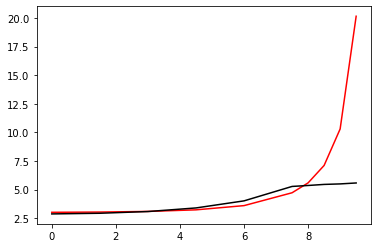

256300 0.02972227087503994
[2.98526872 2.98432436 3.06985123 3.31505832 3.85241775 4.98726943
 5.04332219 5.08340676 5.11080095 5.08072427]


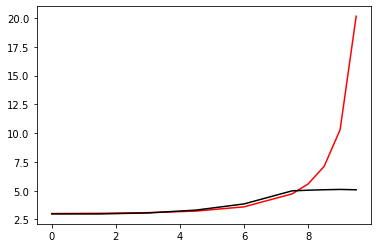

257400 0.012548301420039395
[2.97618454 2.99375714 3.08652182 3.33648699 3.88415944 5.04839041
 5.12117104 5.18539113 5.22215082 5.24854195]


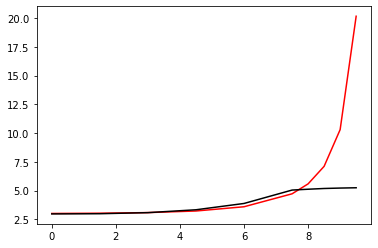

258500 0.0028528538965182297
[2.97186999 3.00715937 3.11447866 3.37306237 3.93461642 5.16621163
 5.24322902 5.31101126 5.36960069 5.31489553]


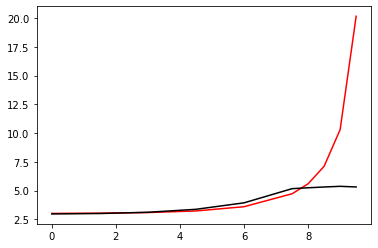

259600 0.05319216391304667
[3.06333022 3.11249834 3.23631118 3.50535097 4.07778783 5.37733181
 5.44922928 5.52055417 5.55658327 5.53804231]


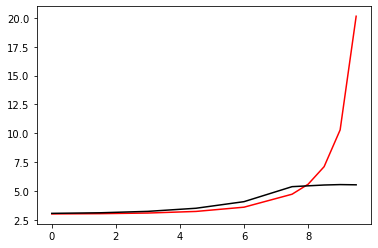

260700 0.012177970249776618
[2.91186262 2.98045234 3.1163721  3.37464901 3.87783797 4.69731934
 4.62975392 4.57671953 4.5964765  4.59391014]


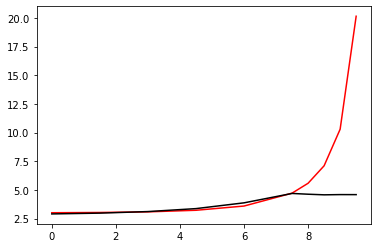

261800 0.03433863280340965
[2.92807501 2.99462678 3.13413783 3.3990368  3.90908782 4.69970572
 4.72796789 4.73054456 4.7271269  4.69304656]


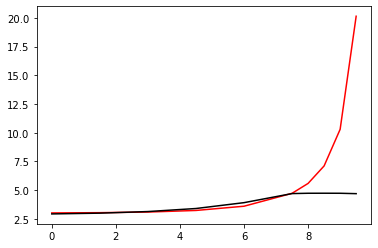

262900 0.04259776881785319
[2.90796621 2.97379082 3.12041204 3.39961106 3.92950737 4.79159268
 4.85671022 4.90936733 4.9388249  4.94809104]


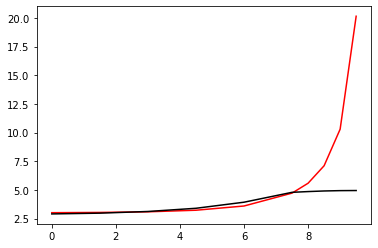

264000 0.0030119818487300476
[2.9146563  2.98160248 3.13732801 3.43597809 3.9965652  5.00092624
 5.07491376 5.14591257 5.18684917 5.19521655]


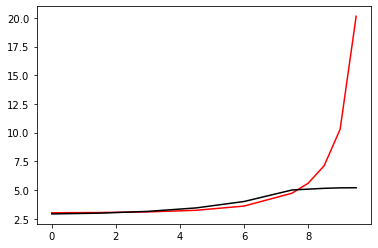

265100 0.042814812221007116
[2.84969144 2.92340008 3.09186068 3.41542164 4.02583052 5.21662087
 5.3092621  5.39044982 5.46531486 5.38360271]


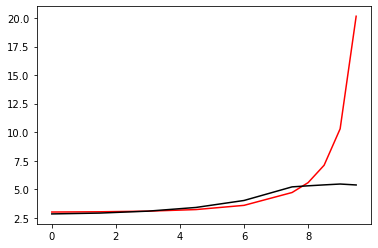

266200 0.002146791826535701
[3.01168286 3.04305234 3.16213361 3.42155558 3.92470257 4.87270449
 4.88360235 4.86073531 4.84221235 4.83945414]


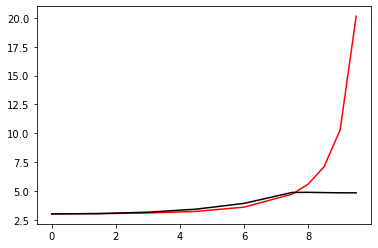

267300 0.02900999344489617
[3.02598123 3.06316751 3.18433573 3.44823341 3.96367903 4.9157525
 4.96207706 4.98627136 4.98952886 4.96987785]


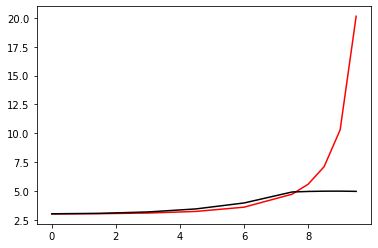

268400 0.012586612069477775
[2.99265085 3.04627305 3.18170068 3.46024057 3.99980333 5.02497082
 5.08738895 5.14128989 5.16986395 5.2063502 ]


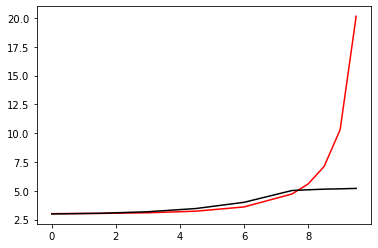

269500 0.0030723061877924573
[2.9293714  2.99885911 3.15391756 3.44979235 4.01101627 5.13435971
 5.20299786 5.25310416 5.31090514 5.28302813]


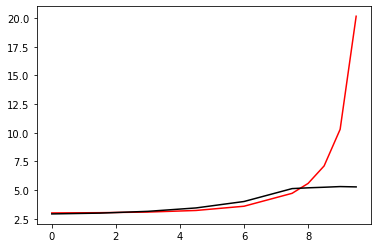

270600 0.013507965662794986
[2.92427853 2.98761588 3.14439111 3.45430663 4.05709758 5.34426605
 5.4115714  5.48920046 5.52970259 5.55332516]


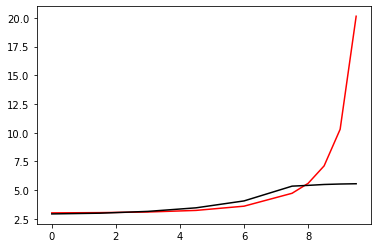

271700 0.4192268351203637
[2.68205563 2.76128878 2.93090395 3.24523278 3.84031207 5.11732378
 5.15234695 5.28201567 5.31034383 5.60050181]


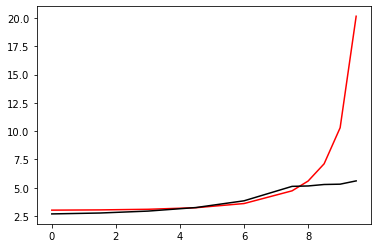

272800 0.02314224134543231
[2.96947623 3.07318056 3.26443167 3.58675178 4.14803496 5.02778773
 5.07063384 5.06276539 5.04758005 5.00216742]


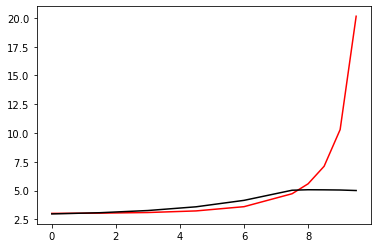

273900 0.03723699775418608
[2.975951   3.07389823 3.27187763 3.61392579 4.22460926 5.31431828
 5.35245523 5.36122024 5.33966469 5.30749144]


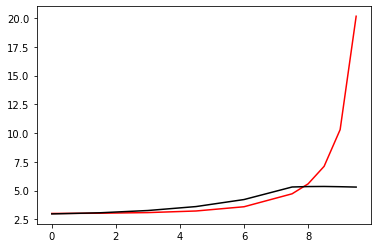

275000 0.004376685365167429
[2.8903412  2.98955604 3.19375015 3.550029   4.18590149 5.46503209
 5.45152612 5.59316819 5.6056402  5.60573692]


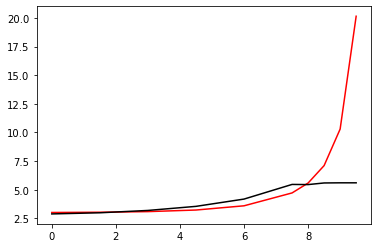

276100 0.046459954697225705
[2.82634833 2.89806734 3.08063967 3.43512387 4.11931152 5.55696892
 5.70370596 5.7510177  5.86427924 5.7036505 ]


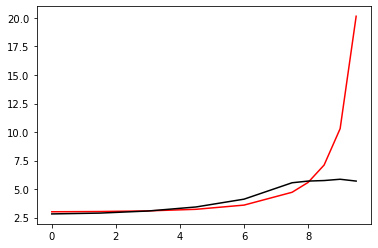

277200 0.0034073670904009833
[2.8665353  2.92035447 3.06860395 3.37370316 3.97343758 5.17502168
 5.16699685 5.15371897 5.14042375 5.14229325]


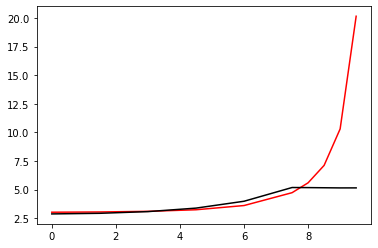

278300 0.024966904460892406
[2.93520499 2.98181697 3.12207383 3.42326807 4.02397563 5.18607874
 5.24899539 5.28099148 5.29984099 5.254316  ]


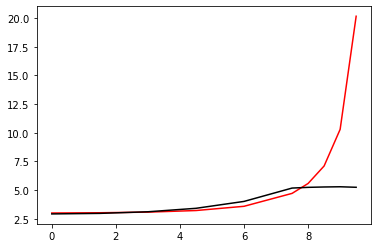

279400 0.01335755352697139
[2.93057917 2.98312636 3.12706113 3.43348383 4.04535855 5.26687661
 5.34142842 5.40995701 5.44512856 5.48860531]


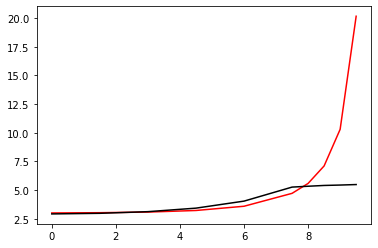

280500 0.003703262921057737
[2.92091428 2.97702824 3.12530701 3.4372086  4.06480432 5.39619846
 5.47823263 5.54626262 5.60907434 5.58664581]


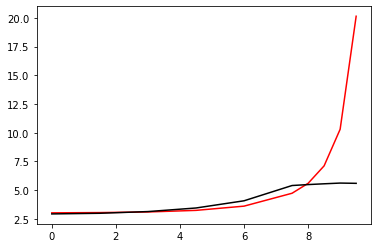

281600 0.014100291135725898
[2.91325873 2.96706263 3.11307767 3.42508918 4.06955197 5.54744394
 5.57742345 5.7232989  5.7468011  5.78818436]


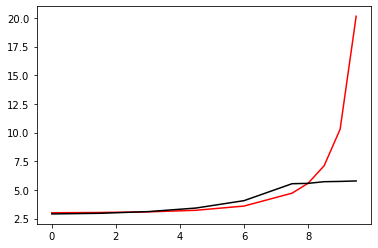

282700 0.42249946555612844
[2.66335782 2.76387108 2.9550144  3.28682316 3.89971382 5.20182731
 5.27771768 5.36578446 5.41112017 5.67835493]


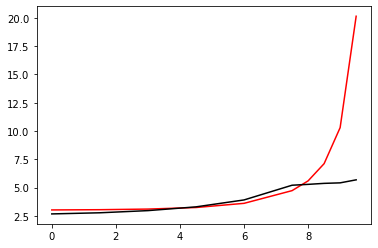

283800 0.022677000171577196
[2.96374877 3.08270711 3.2926332  3.63108475 4.20843666 5.10602127
 5.14628752 5.14067162 5.12372936 5.07994051]


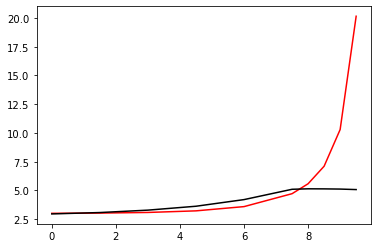

284900 0.036965819897387626
[2.95481228 3.06328995 3.27683236 3.63207433 4.2485348  5.3458993
 5.39825522 5.41486363 5.40640475 5.37055385]


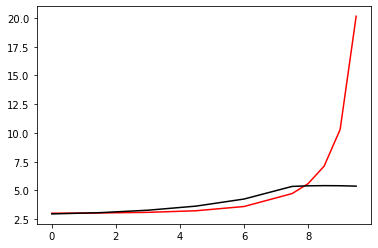

286000 0.003993011022996273
[2.9365166  3.06236006 3.29132932 3.65223887 4.24318812 5.21863999
 5.25498062 5.27472436 5.25426381 5.25988955]


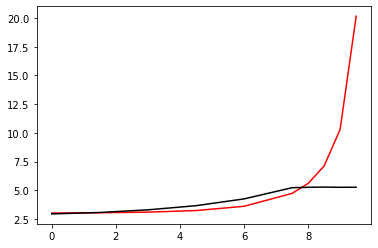

287100 0.040568213389254947
[2.96220965 3.06804945 3.28769105 3.65448673 4.2738644  5.38925082
 5.46693311 5.50579545 5.54781104 5.4877333 ]


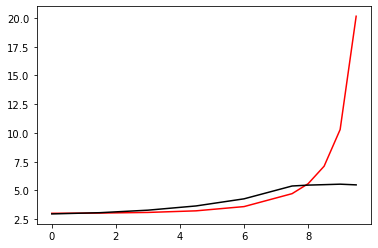

288200 0.0036130484515437176
[2.90350036 3.02953333 3.25883487 3.61797191 4.18321064 4.98512914
 5.01098947 5.0122713  4.99830545 4.99302576]


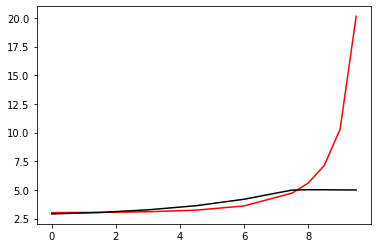

289300 0.027653205045717884
[2.9428648  3.05458725 3.27883389 3.64318444 4.23225239 5.14159869
 5.19596762 5.21633266 5.22126141 5.18252467]


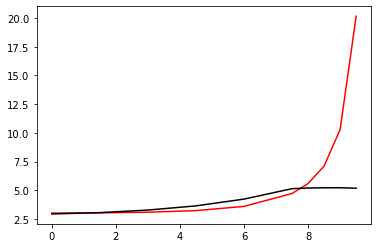

290400 0.009474397579157396
[2.99184678 3.09456449 3.31487167 3.69008541 4.3226302  5.43502465
 5.46973315 5.50785462 5.49786482 5.52406695]


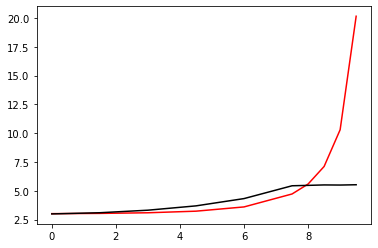

291500 0.0035130317046908497
[2.8831961  2.98599569 3.19685043 3.54336156 4.10269514 5.07078141
 5.12812875 5.17289278 5.21136557 5.20510045]


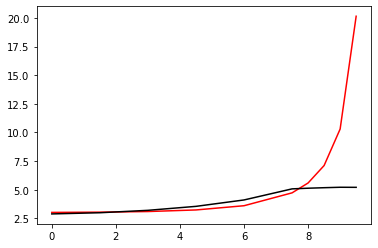

292600 0.01374490290051137
[2.88877265 2.9756204  3.17121099 3.51536882 4.10929674 5.2658334
 5.31639543 5.39821838 5.42568364 5.46016905]


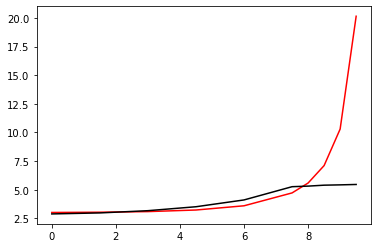

293700 0.012495564076495191
[2.90536871 2.98028889 3.15889143 3.49795486 4.1307387  5.43014028
 5.5953439  5.57179724 5.68467623 5.64071069]


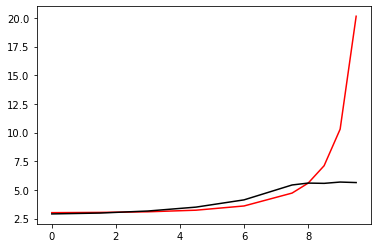

294800 0.15368553813918107
[3.05183316 3.12839943 3.30243605 3.64586035 4.31424451 5.75321094
 5.71161415 5.88022058 5.86993313 5.79040641]


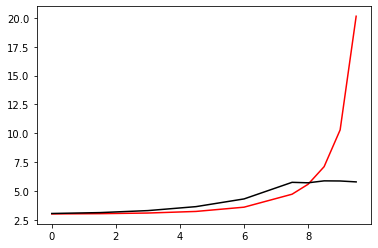

295900 0.040384087306325644
[2.9850428  3.05293049 3.20951317 3.51394428 4.09287399 5.22395491
 5.22171898 5.17187812 5.11906076 5.08640944]


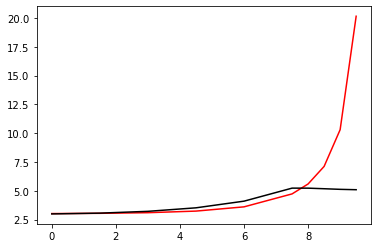

297000 0.003275602515955697
[2.99985515 3.06857032 3.22773218 3.53674192 4.12516722 5.23126072
 5.27575866 5.28523838 5.2682598  5.26960603]


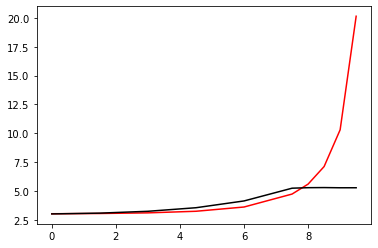

298100 0.04117566059970605
[2.99718547 3.06780242 3.23109493 3.54694343 4.14853499 5.29615515
 5.36352309 5.41469104 5.44413039 5.41498131]


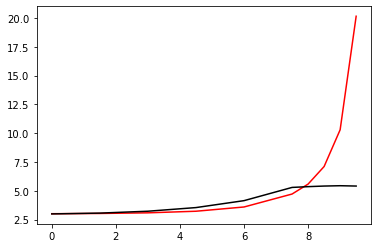

299200 0.003713700589305325
[2.99465486 3.06603884 3.23308063 3.55583257 4.17248528 5.41819729
 5.49079299 5.56112631 5.59589348 5.67737893]


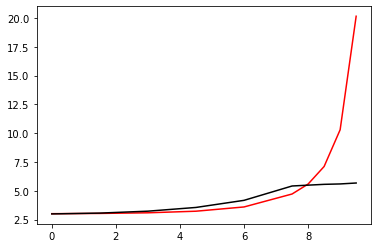

300300 0.02411969404693501
[2.96141123 3.03275716 3.20492543 3.54016785 4.19193873 5.59344697
 5.69599563 5.76231378 5.83621453 5.73566205]


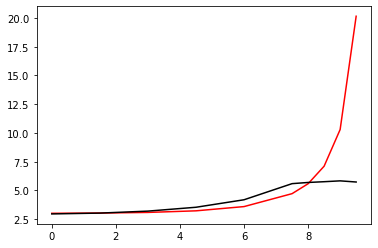

301400 0.013104490316644315
[2.92684223 3.02214097 3.20531759 3.52734845 4.10284842 4.95718002
 4.93177877 4.98850621 5.09656404 5.10925526]


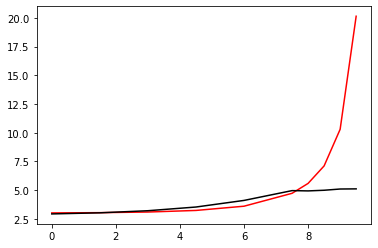

302500 0.003081376644525615
[2.94031689 3.02846387 3.21066234 3.53475528 4.11145803 4.99529845
 5.05020959 5.10239714 5.13831936 5.14554793]


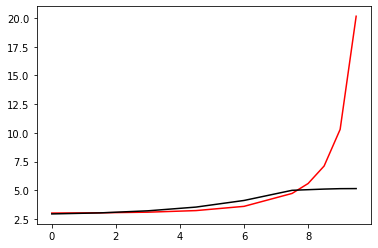

303600 0.005600795892274865
[2.97610569 3.05835066 3.24064585 3.5714508  4.16090798 5.14345365
 5.21093562 5.26008887 5.29766066 5.26328239]


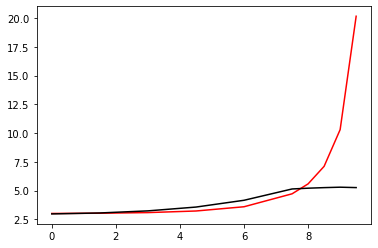

304700 0.004306817182616268
[2.98537173 3.06782445 3.25439307 3.5971357  4.21365542 5.34910539
 5.42459626 5.47733717 5.51521042 5.48196669]


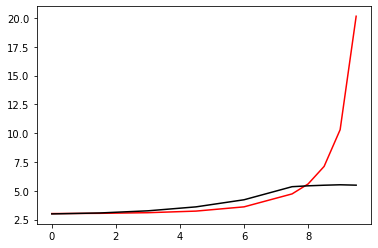

305800 0.019021835388759938
[2.95811462 3.03374097 3.21562173 3.55903808 4.19569793 5.49814274
 5.51913986 5.65414767 5.63455276 5.6132736 ]


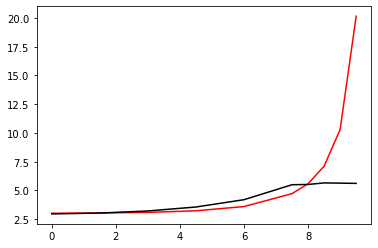

306900 0.03565986043109991
[2.93064995 3.01898034 3.21417803 3.58133651 4.2786219  5.70312083
 5.73958089 5.84537944 5.88115766 5.71371479]


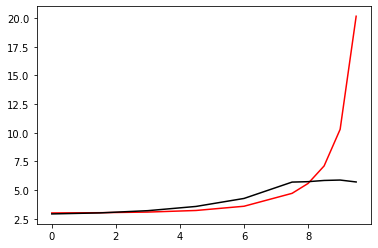

308000 0.0045741745585704255
[2.94424433 3.04516601 3.23965668 3.59426616 4.24364206 5.38165587
 5.40611666 5.38353905 5.43147959 5.81957844]


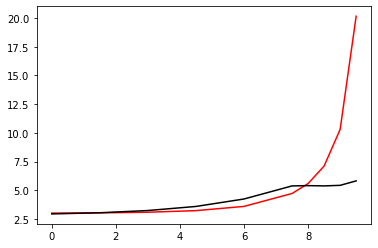

309100 0.040201236168458054
[2.95735261 3.05688794 3.26384179 3.63512187 4.31241028 5.51807609
 5.56497838 5.61344118 5.63016302 5.59080205]


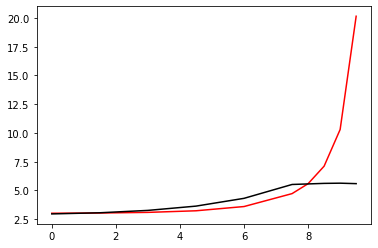

310200 0.003439532387723707
[2.8902662  2.96079059 3.13912581 3.47471678 4.09873376 5.15645947
 5.14577223 5.0984641  5.06081905 5.06094813]


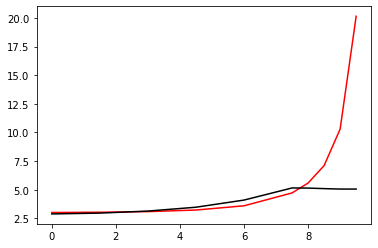

311300 0.025016819632039725
[2.90047421 2.97152695 3.14940751 3.48813568 4.11595109 5.15504429
 5.19734915 5.21159334 5.20831749 5.17469801]


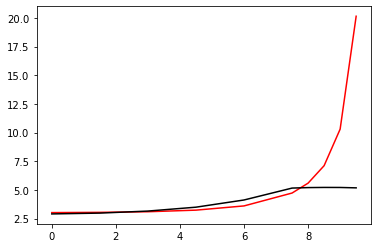

312400 0.013512116421132437
[2.9046139  2.9749367  3.15072972 3.49073483 4.11995628 5.19726386
 5.26097971 5.31426674 5.34194299 5.38144094]


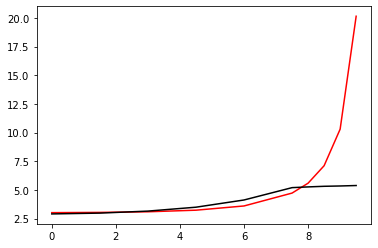

313500 0.0037020080080705474
[2.90502066 2.97327133 3.14574905 3.48528532 4.11893465 5.29779828
 5.37013598 5.43306698 5.4865483  5.46433551]


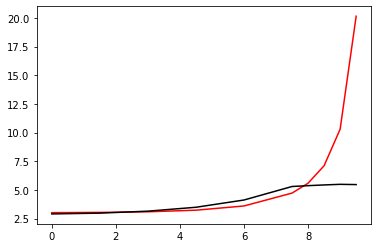

314600 0.013920997966099864
[2.9034996  2.96731088 3.13308332 3.4676025  4.11090508 5.42903116
 5.50205404 5.57974529 5.62242609 5.65457523]


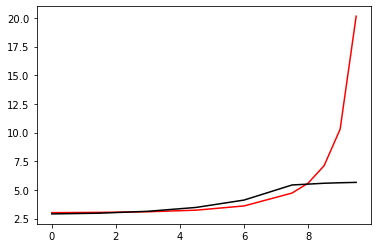

315700 0.004947791216732092
[3.00226344 3.06259849 3.21570682 3.5329891  4.17226431 5.51532993
 5.75960685 5.6695981  5.8197437  5.77556869]


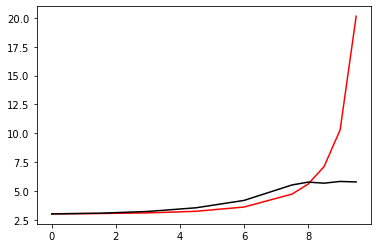

316800 0.019675357448566008
[2.98253712 3.07656774 3.27094252 3.62499512 4.28531023 5.45845159
 5.50807818 5.53381754 5.54568086 5.48453843]


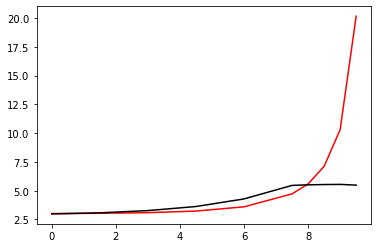

317900 0.03401592516504213
[2.85756245 2.94201833 3.13643322 3.49812323 4.19248207 5.59133593
 5.66876188 5.72079998 5.74898974 5.6227034 ]


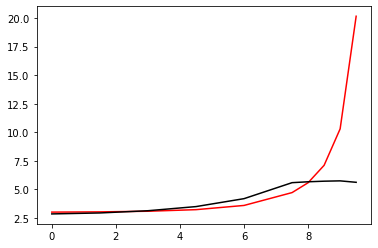

319000 0.004962284997633987
[2.92396143 2.99215713 3.16419936 3.51005257 4.19315274 5.70384609
 5.65423344 5.86194923 5.77535787 5.9271045 ]


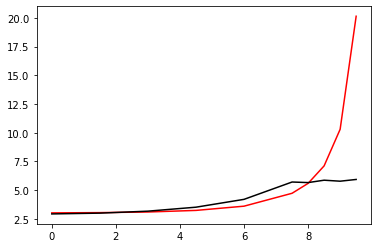

320100 0.04052306299460345
[2.98224566 3.02012446 3.15492506 3.45861405 4.08275127 5.28294071
 5.29279954 5.27128895 5.27162712 5.26219132]


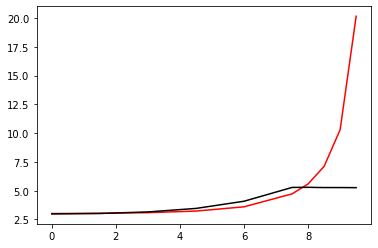

321200 0.003187703203917119
[3.00467617 3.04637792 3.18183346 3.48681167 4.11241994 5.29150162
 5.34551683 5.37435698 5.37911341 5.37893793]


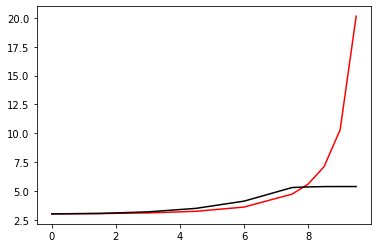

322300 0.025600615580697074
[2.99271691 3.04591134 3.19018493 3.50364128 4.14047114 5.37027578
 5.44697294 5.5091172  5.54830046 5.50668304]


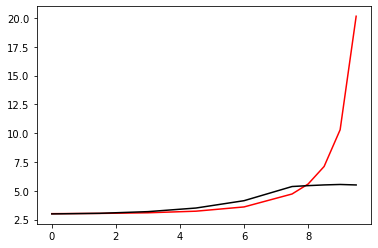

323400 0.01377305233120811
[2.96623944 3.0322819  3.18929786 3.51220387 4.1595239  5.48649729
 5.56870656 5.64860823 5.68316461 5.80678426]


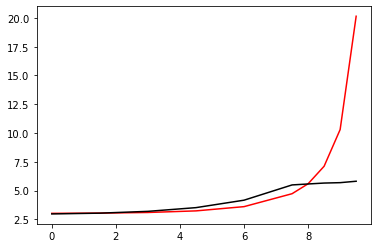

324500 0.0037841789721358423
[2.89576083 2.97790226 3.15309942 3.47584678 4.08723474 5.34860349
 5.42421991 5.476187   5.54126369 5.5041664 ]


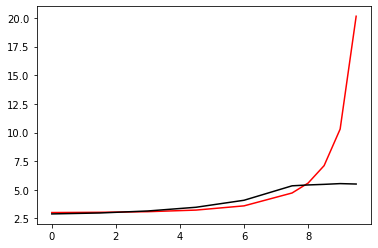

325600 0.014123616893040964
[2.89682218 2.96402054 3.13029489 3.45711627 4.09480754 5.50902346
 5.55422398 5.67752192 5.70205483 5.74368673]


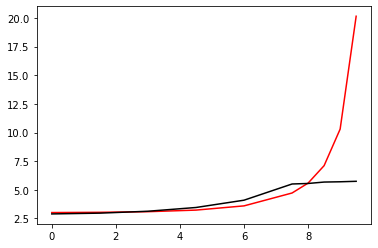

326700 0.010470301429103738
[2.93362403 2.99428355 3.14707673 3.46409884 4.11341755 5.59849896
 5.73386817 5.76445014 5.86268002 5.83891285]


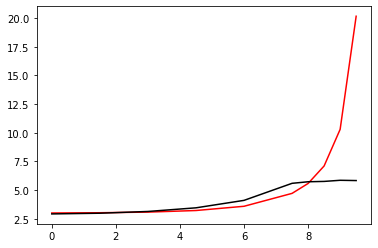

327800 0.027498079750809392
[2.91419451 2.96185704 3.09676144 3.38426542 3.9731214  5.26248498
 5.2867484  5.28972364 5.28363405 5.26291406]


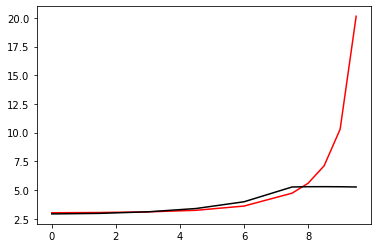

328900 0.03939730378329802
[2.92548486 2.97668423 3.11480035 3.40727657 4.00486204 5.27416526
 5.3430587  5.38395813 5.40661107 5.37084724]


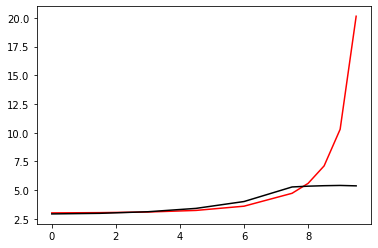

330000 0.003535325265952938
[2.92419186 2.97946927 3.12256136 3.42290276 4.0346031  5.33572096
 5.42107657 5.49641069 5.53721291 5.59774563]


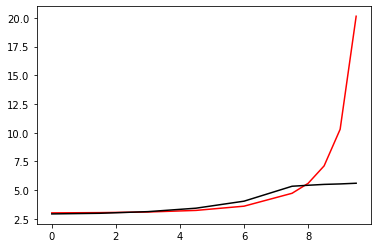

331100 0.03344753435762528
[2.9128164  2.97171111 3.12176527 3.43418162 4.07011912 5.46189033
 5.55222138 5.63279468 5.70683564 5.64445556]


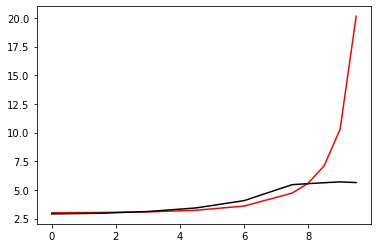

332200 0.004138666836438752
[2.9589007  3.01418764 3.1620303  3.47537736 4.12300244 5.59038503
 5.67229543 5.76946116 5.79041029 5.91234752]


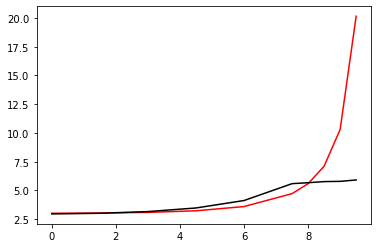

333300 0.02446425876546545
[2.89299445 2.98627227 3.16385682 3.48213815 4.07617817 5.22028386
 5.25469901 5.29859245 5.31469834 5.2416    ]


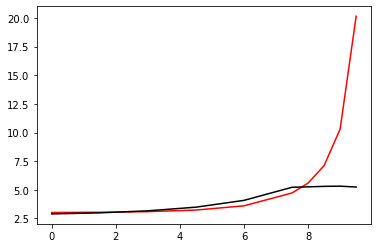

KeyboardInterrupt: 

In [67]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for j in range (5000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, Positive[j%10], Negative[j%10])
        gradients=g.gradient(loss, [h])
    for i in range (100):
        optimizer.apply_gradients(zip(gradients, [h]))
    if j%11==0: 
        print(j*100, Error_func(h, Positive[j%10], Negative[j%10]).numpy()), print(h.numpy())
        plt.plot(x, h_real, 'r-'), plt.plot(x, h.numpy(), 'k-'), plt.show()

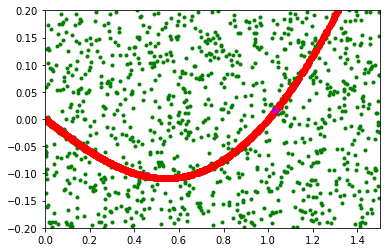

In [69]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()